# Import the Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Import Data Train

In [2]:
df = pd.read_csv('train.csv')
pd.set_option("display.max_columns", None)
df

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75 Celcius,NaN,23.89 C,25.76 C,24.28,25.22°C,1012,undetermined,NaN,95,0.82,320.0 °,zero,0,NaN,NaN,100
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58 C,NaN,23.73 C,25.57 C,23.99 C,25.26 C,1012,NaN,NaN,95,0.96 m/s,338.0°,0,0,0,0,100
2,284004000,1979-01-01 02:00:00+00:00,28800,26.6 Celcius,unidentified,24.06 C,26.6 C,26.1 C,27.39,1012,NaN,undetermined,86,1.22 m/s,339.0°,0,volume:zero,NaN,NaN,99
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31 Celcius,NaN,24.37 C,30.9 C,26.59,28.36 C,1012,NaN,undetermined,84,1.08 m/s,342,0.13,nol,0,NaN,94
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05 C,31.54 C,26.58 C,28.31 °C,1011,NaN,undetermined,87,0.86,336.0°,0.34,nol,NaN,0,100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341875,1514746800,2017-12-31 19:00:00+00:00,28800,25.06 Celcius,NaN,24.55,131.53 C,24.44 C,25.69,1007,undetermined,NaN,97,0.9,13,0,0,0,0,99
341876,1514750400,2017-12-31 20:00:00+00:00,28800,24.51°C,NaN,24.17°C,25.58,23.89 C,25.13,1006,undetermined,undetermined,98,0.85 m/s,21.0°,,NaN,NaN,0,100
341877,1514754000,2017-12-31 21:00:00+00:00,28800,24.63 C,NaN,24.29,129.32,24,126.96 C,1007.0 hPa,NaN,undetermined,98,1.54 m/s,26.0 °,0,NaN,0,no_snow,97
341878,1514757600,2017-12-31 22:00:00+00:00,28800,26.68,NaN,24.71,29.76,25.02 C,27.25 °C,1008,undetermined,NaN,89.00%,1.46m/s,17,0.3 mm,0,0,volume:0,98


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   datetime      341880 non-null  int64 
 1   datetime_iso  341880 non-null  object
 2   time-zone     341880 non-null  int64 
 3   temp          341880 non-null  object
 4   visibility    51112 non-null   object
 5   d_point       341880 non-null  object
 6   feels         341880 non-null  object
 7   min_temp      341880 non-null  object
 8   max_temp      341880 non-null  object
 9   prssr         341880 non-null  object
 10  sea_level     192964 non-null  object
 11  grnd_level    192919 non-null  object
 12  hum           341880 non-null  object
 13  wind_spd      341880 non-null  object
 14  wind_deg      341880 non-null  object
 15  rain_1h       341880 non-null  object
 16  rain_3h       192329 non-null  object
 17  snow_1h       192696 non-null  object
 18  snow_3h       192699 non

# Cleaning Data

In [4]:
df[['d_point','temp','feels','min_temp','max_temp','wind_deg']] = df[['d_point','temp','feels','min_temp','max_temp','wind_deg']].applymap(lambda x: x.strip('°Celcius'))
df[['d_point','temp','feels','min_temp','max_temp','wind_deg']] = df[['d_point','temp','feels','min_temp','max_temp','wind_deg']].applymap(lambda x: float(x.replace(' ', '')))

df[['hum','clouds']] = df[['hum','clouds']].applymap(lambda x: float(x.strip('%')))

df[['prssr']] = df[['prssr']].applymap(lambda x: x.strip('hPa.'))
df[['prssr']] = df[['prssr']].applymap(lambda x: float(x.replace(' ', '')))

df[['wind_spd']] = df[['wind_spd']].applymap(lambda x: x.strip('m/s'))
df[['wind_spd']] = df[['wind_spd']].applymap(lambda x: float(x.replace(' ', '')))

df[['rain_1h']] = df[['rain_1h']].applymap(lambda x: x.strip('m'))
df[['rain_1h']] = df[['rain_1h']].applymap(lambda x: x.replace('zero', '0'))
df[['rain_1h']] = df[['rain_1h']].applymap(lambda x: x.replace(' ', ''))
df['rain_1h'] = np.where(df['rain_1h']=='', '0',df['rain_1h'])
df[['rain_1h']] = df[['rain_1h']].applymap(lambda x: float(x))
df['rain_1h'] = np.where(df['rain_1h']<0, np.nan,df['rain_1h'])
df

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75,NaN,23.89,25.76,24.28,25.22,1012.0,undetermined,NaN,95.0,0.82,320.0,0.00,0,NaN,NaN,100.0
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58,NaN,23.73,25.57,23.99,25.26,1012.0,NaN,NaN,95.0,0.96,338.0,0.00,0,0,0,100.0
2,284004000,1979-01-01 02:00:00+00:00,28800,26.60,unidentified,24.06,26.60,26.10,27.39,1012.0,NaN,undetermined,86.0,1.22,339.0,0.00,volume:zero,NaN,NaN,99.0
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31,NaN,24.37,30.90,26.59,28.36,1012.0,NaN,undetermined,84.0,1.08,342.0,0.13,nol,0,NaN,94.0
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05,31.54,26.58,28.31,1011.0,NaN,undetermined,87.0,0.86,336.0,0.34,nol,NaN,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341875,1514746800,2017-12-31 19:00:00+00:00,28800,25.06,NaN,24.55,131.53,24.44,25.69,1007.0,undetermined,NaN,97.0,0.90,13.0,0.00,0,0,0,99.0
341876,1514750400,2017-12-31 20:00:00+00:00,28800,24.51,NaN,24.17,25.58,23.89,25.13,1006.0,undetermined,undetermined,98.0,0.85,21.0,0.00,NaN,NaN,0,100.0
341877,1514754000,2017-12-31 21:00:00+00:00,28800,24.63,NaN,24.29,129.32,24.00,126.96,1007.0,NaN,undetermined,98.0,1.54,26.0,0.00,NaN,0,no_snow,97.0
341878,1514757600,2017-12-31 22:00:00+00:00,28800,26.68,NaN,24.71,29.76,25.02,27.25,1008.0,undetermined,NaN,89.0,1.46,17.0,0.30,0,0,volume:0,98.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 341880 entries, 0 to 341879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime      341880 non-null  int64  
 1   datetime_iso  341880 non-null  object 
 2   time-zone     341880 non-null  int64  
 3   temp          341880 non-null  float64
 4   visibility    51112 non-null   object 
 5   d_point       341880 non-null  float64
 6   feels         341880 non-null  float64
 7   min_temp      341880 non-null  float64
 8   max_temp      341880 non-null  float64
 9   prssr         341880 non-null  float64
 10  sea_level     192964 non-null  object 
 11  grnd_level    192919 non-null  object 
 12  hum           341880 non-null  float64
 13  wind_spd      341880 non-null  float64
 14  wind_deg      341880 non-null  float64
 15  rain_1h       336438 non-null  float64
 16  rain_3h       192329 non-null  object 
 17  snow_1h       192696 non-null  object 
 18  snow

# Checking Null Value

In [6]:
def missing_check(df) :
    wadah = []
    for i in df.columns :
        wadah.append(df[i].unique())
    missing = df.isnull().sum()
    per_miss = missing/len(df)
    data_type = df.dtypes
    number_unique = df.nunique()
    return pd.DataFrame({"Missing":missing,
                        "Percent_Missing":per_miss,
                        "Data_Types":data_type,
                        "Number_of_unique":number_unique,
                        "Unique":wadah}).style.format({'Percent_Missing': "{:.2%}"})

In [7]:
missing_check(df)

,Missing,Percent_Missing,Data_Types,Number_of_unique,Unique
datetime,0,0.00%,int64,341880,[ 283996800 284000400 284004000 ... 1514754000 1514757600 1514761200]
datetime_iso,0,0.00%,object,341880,['1979-01-01 00:00:00+00:00' '1979-01-01 01:00:00+00:00' '1979-01-01 02:00:00+00:00' ... '2017-12-31 21:00:00+00:00' '2017-12-31 22:00:00+00:00' '2017-12-31 23:00:00+00:00']
time-zone,0,0.00%,int64,1,[28800]
temp,0,0.00%,float64,2188,[ 24.75 24.58 26.6 ... 158.6 159.75 34.32]
visibility,290768,85.05%,object,12,[nan 'unidentified' ' ' '-1m' 'unrecognized' 'unknown' '-1 km' '-1' 'empty' 'undefined' '-1km' '-1 m' 'missing']
d_point,0,0.00%,float64,1506,[23.89 23.73 24.06 ... 28.08 28.69 28.53]
feels,0,0.00%,float64,2780,[ 25.76 25.57 26.6 ... 41.32 187.52 189.53]
min_temp,0,0.00%,float64,2089,[ 24.28 23.99 26.1 ... 149.19 146.78 148.74]
max_temp,0,0.00%,float64,2288,[ 25.22 25.26 27.39 ... 35.4 169.91 177.66]
prssr,0,0.00%,float64,31,[1012. 1011. 1010. 1009. 1013. 1008. 5080.3 1007. 5090.36 5085.33 1014. 1015. 5095.39 5060.18 1006. 1005. 5070.24 5075.27 5065.21 1004. 5100.42 5055.15 1016. 5105.45 1017. 1003. 1002. 5050.12 5045.09 5115.51 1001. ]


# Preprocessing Data

Dari fungsi untuk check missing value, didapatkan bahwa kolom target 'rain_1h' memiliki missing value sebesar 1.59% dari hasil cleaning data, oleh karena itu missing value perlu diatasi. Missing value diatasi dengan menggunakan interpolasi dari value 'rain_1h' lainnya dengan method = nearest. 

In [8]:
# Mengisi nilai NaN di kolom 'rain_3h' menggunakan interpolasi linear
df['rain_1h'].fillna(df['rain_1h'].interpolate(method='nearest'), inplace = True)
df

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds
0,283996800,1979-01-01 00:00:00+00:00,28800,24.75,NaN,23.89,25.76,24.28,25.22,1012.0,undetermined,NaN,95.0,0.82,320.0,0.00,0,NaN,NaN,100.0
1,284000400,1979-01-01 01:00:00+00:00,28800,24.58,NaN,23.73,25.57,23.99,25.26,1012.0,NaN,NaN,95.0,0.96,338.0,0.00,0,0,0,100.0
2,284004000,1979-01-01 02:00:00+00:00,28800,26.60,unidentified,24.06,26.60,26.10,27.39,1012.0,NaN,undetermined,86.0,1.22,339.0,0.00,volume:zero,NaN,NaN,99.0
3,284007600,1979-01-01 03:00:00+00:00,28800,27.31,NaN,24.37,30.90,26.59,28.36,1012.0,NaN,undetermined,84.0,1.08,342.0,0.13,nol,0,NaN,94.0
4,284011200,1979-01-01 04:00:00+00:00,28800,27.41,NaN,25.05,31.54,26.58,28.31,1011.0,NaN,undetermined,87.0,0.86,336.0,0.34,nol,NaN,0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341875,1514746800,2017-12-31 19:00:00+00:00,28800,25.06,NaN,24.55,131.53,24.44,25.69,1007.0,undetermined,NaN,97.0,0.90,13.0,0.00,0,0,0,99.0
341876,1514750400,2017-12-31 20:00:00+00:00,28800,24.51,NaN,24.17,25.58,23.89,25.13,1006.0,undetermined,undetermined,98.0,0.85,21.0,0.00,NaN,NaN,0,100.0
341877,1514754000,2017-12-31 21:00:00+00:00,28800,24.63,NaN,24.29,129.32,24.00,126.96,1007.0,NaN,undetermined,98.0,1.54,26.0,0.00,NaN,0,no_snow,97.0
341878,1514757600,2017-12-31 22:00:00+00:00,28800,26.68,NaN,24.71,29.76,25.02,27.25,1008.0,undetermined,NaN,89.0,1.46,17.0,0.30,0,0,volume:0,98.0


In [9]:
missing_check(df)

,Missing,Percent_Missing,Data_Types,Number_of_unique,Unique
datetime,0,0.00%,int64,341880,[ 283996800 284000400 284004000 ... 1514754000 1514757600 1514761200]
datetime_iso,0,0.00%,object,341880,['1979-01-01 00:00:00+00:00' '1979-01-01 01:00:00+00:00' '1979-01-01 02:00:00+00:00' ... '2017-12-31 21:00:00+00:00' '2017-12-31 22:00:00+00:00' '2017-12-31 23:00:00+00:00']
time-zone,0,0.00%,int64,1,[28800]
temp,0,0.00%,float64,2188,[ 24.75 24.58 26.6 ... 158.6 159.75 34.32]
visibility,290768,85.05%,object,12,[nan 'unidentified' ' ' '-1m' 'unrecognized' 'unknown' '-1 km' '-1' 'empty' 'undefined' '-1km' '-1 m' 'missing']
d_point,0,0.00%,float64,1506,[23.89 23.73 24.06 ... 28.08 28.69 28.53]
feels,0,0.00%,float64,2780,[ 25.76 25.57 26.6 ... 41.32 187.52 189.53]
min_temp,0,0.00%,float64,2089,[ 24.28 23.99 26.1 ... 149.19 146.78 148.74]
max_temp,0,0.00%,float64,2288,[ 25.22 25.26 27.39 ... 35.4 169.91 177.66]
prssr,0,0.00%,float64,31,[1012. 1011. 1010. 1009. 1013. 1008. 5080.3 1007. 5090.36 5085.33 1014. 1015. 5095.39 5060.18 1006. 1005. 5070.24 5075.27 5065.21 1004. 5100.42 5055.15 1016. 5105.45 1017. 1003. 1002. 5050.12 5045.09 5115.51 1001. ]


In [10]:
# Set datetime_iso menjadi index dataframe dan 
# mentransformasi beberapa informasi dalam datetime_iso seperti jam, hari, mingguan, dan tahun menjadi kolom baru untuk membantu model

df['datetime_iso'] = pd.to_datetime(df['datetime_iso'])
df['hour'] = df.datetime_iso.dt.hour
df['day'] = df.datetime_iso.dt.day
df['weeks'] = df.datetime_iso.dt.isocalendar().week.astype(int)
df['year'] = df.datetime_iso.dt.year
df.set_index('datetime_iso', inplace = True)
df

,datetime,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds,hour,day,weeks,year
datetime_iso,,,,,,,,,,,,,,,,,,,,,,,
1979-01-01 00:00:00+00:00,283996800,28800,24.75,NaN,23.89,25.76,24.28,25.22,1012.0,undetermined,NaN,95.0,0.82,320.0,0.00,0,NaN,NaN,100.0,0,1,1,1979
1979-01-01 01:00:00+00:00,284000400,28800,24.58,NaN,23.73,25.57,23.99,25.26,1012.0,NaN,NaN,95.0,0.96,338.0,0.00,0,0,0,100.0,1,1,1,1979
1979-01-01 02:00:00+00:00,284004000,28800,26.60,unidentified,24.06,26.60,26.10,27.39,1012.0,NaN,undetermined,86.0,1.22,339.0,0.00,volume:zero,NaN,NaN,99.0,2,1,1,1979
1979-01-01 03:00:00+00:00,284007600,28800,27.31,NaN,24.37,30.90,26.59,28.36,1012.0,NaN,undetermined,84.0,1.08,342.0,0.13,nol,0,NaN,94.0,3,1,1,1979
1979-01-01 04:00:00+00:00,284011200,28800,27.41,NaN,25.05,31.54,26.58,28.31,1011.0,NaN,undetermined,87.0,0.86,336.0,0.34,nol,NaN,0,100.0,4,1,1,1979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00+00:00,1514746800,28800,25.06,NaN,24.55,131.53,24.44,25.69,1007.0,undetermined,NaN,97.0,0.90,13.0,0.00,0,0,0,99.0,19,31,52,2017
2017-12-31 20:00:00+00:00,1514750400,28800,24.51,NaN,24.17,25.58,23.89,25.13,1006.0,undetermined,undetermined,98.0,0.85,21.0,0.00,NaN,NaN,0,100.0,20,31,52,2017
2017-12-31 21:00:00+00:00,1514754000,28800,24.63,NaN,24.29,129.32,24.00,126.96,1007.0,NaN,undetermined,98.0,1.54,26.0,0.00,NaN,0,no_snow,97.0,21,31,52,2017


## Rekonstruksi Kolom Humidity dan Wind Speed menjadi 'true_hum'  dan 'true_spd' 

In [11]:
e = 6.112 * np.exp((17.67 * df['d_point']) / (df['d_point'] + 243.5))
es = 6.112 * np.exp((17.67 * df['temp']) / (df['temp'] + 243.5))
df['true_hum'] = round((e/es)*100,3)
df['true_hum'] = np.where(df['true_hum']>100,100,df['true_hum'])


north = df['wind_spd'] *np.sin(df['wind_deg'])
east = df['wind_spd'] *np.cos(df['wind_deg'])

# Menghitung Kecepatan Angin Sebenarnya (True Wind Speed) dalam m/s
df['true_spd'] = round(np.sqrt(north**2 + east**2),3)

df

,datetime,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_1h,rain_3h,snow_1h,snow_3h,clouds,hour,day,weeks,year,true_hum,true_spd
datetime_iso,,,,,,,,,,,,,,,,,,,,,,,,,
1979-01-01 00:00:00+00:00,283996800,28800,24.75,NaN,23.89,25.76,24.28,25.22,1012.0,undetermined,NaN,95.0,0.82,320.0,0.00,0,NaN,NaN,100.0,0,1,1,1979,94.972,0.82
1979-01-01 01:00:00+00:00,284000400,28800,24.58,NaN,23.73,25.57,23.99,25.26,1012.0,NaN,NaN,95.0,0.96,338.0,0.00,0,0,0,100.0,1,1,1,1979,95.023,0.96
1979-01-01 02:00:00+00:00,284004000,28800,26.60,unidentified,24.06,26.60,26.10,27.39,1012.0,NaN,undetermined,86.0,1.22,339.0,0.00,volume:zero,NaN,NaN,99.0,2,1,1,1979,85.965,1.22
1979-01-01 03:00:00+00:00,284007600,28800,27.31,NaN,24.37,30.90,26.59,28.36,1012.0,NaN,undetermined,84.0,1.08,342.0,0.13,nol,0,NaN,94.0,3,1,1,1979,83.998,1.08
1979-01-01 04:00:00+00:00,284011200,28800,27.41,NaN,25.05,31.54,26.58,28.31,1011.0,NaN,undetermined,87.0,0.86,336.0,0.34,nol,NaN,0,100.0,4,1,1,1979,86.973,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00+00:00,1514746800,28800,25.06,NaN,24.55,131.53,24.44,25.69,1007.0,undetermined,NaN,97.0,0.90,13.0,0.00,0,0,0,99.0,19,31,52,2017,96.998,0.90
2017-12-31 20:00:00+00:00,1514750400,28800,24.51,NaN,24.17,25.58,23.89,25.13,1006.0,undetermined,undetermined,98.0,0.85,21.0,0.00,NaN,NaN,0,100.0,20,31,52,2017,97.981,0.85
2017-12-31 21:00:00+00:00,1514754000,28800,24.63,NaN,24.29,129.32,24.00,126.96,1007.0,NaN,undetermined,98.0,1.54,26.0,0.00,NaN,0,no_snow,97.0,21,31,52,2017,97.983,1.54


In [12]:
df = df.drop(['visibility','sea_level','grnd_level', 'rain_3h', 'snow_1h','snow_3h', 'time-zone', 'datetime',
             'wind_spd','hum'],axis = 1)
df

,temp,d_point,feels,min_temp,max_temp,prssr,wind_deg,rain_1h,clouds,hour,day,weeks,year,true_hum,true_spd
datetime_iso,,,,,,,,,,,,,,,
1979-01-01 00:00:00+00:00,24.75,23.89,25.76,24.28,25.22,1012.0,320.0,0.00,100.0,0,1,1,1979,94.972,0.82
1979-01-01 01:00:00+00:00,24.58,23.73,25.57,23.99,25.26,1012.0,338.0,0.00,100.0,1,1,1,1979,95.023,0.96
1979-01-01 02:00:00+00:00,26.60,24.06,26.60,26.10,27.39,1012.0,339.0,0.00,99.0,2,1,1,1979,85.965,1.22
1979-01-01 03:00:00+00:00,27.31,24.37,30.90,26.59,28.36,1012.0,342.0,0.13,94.0,3,1,1,1979,83.998,1.08
1979-01-01 04:00:00+00:00,27.41,25.05,31.54,26.58,28.31,1011.0,336.0,0.34,100.0,4,1,1,1979,86.973,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00+00:00,25.06,24.55,131.53,24.44,25.69,1007.0,13.0,0.00,99.0,19,31,52,2017,96.998,0.90
2017-12-31 20:00:00+00:00,24.51,24.17,25.58,23.89,25.13,1006.0,21.0,0.00,100.0,20,31,52,2017,97.981,0.85
2017-12-31 21:00:00+00:00,24.63,24.29,129.32,24.00,126.96,1007.0,26.0,0.00,97.0,21,31,52,2017,97.983,1.54


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
temp,341880.0,28.296996,13.325830,21.550,24.980,26.200,28.39,177.26
d_point,341880.0,26.056234,12.080483,13.960,23.950,24.570,25.24,141.59
feels,341880.0,31.092778,15.228520,22.350,25.990,26.650,33.37,202.71
min_temp,341880.0,27.483902,12.924432,14.120,24.250,25.480,27.64,162.92
max_temp,341880.0,29.359565,13.802332,22.370,25.970,27.270,29.31,187.17
prssr,341880.0,1070.965439,494.701076,1001.000,1009.000,1010.000,1011.00,5115.51
wind_deg,341880.0,210.867372,147.667380,0.000,149.000,203.000,279.00,1810.80
rain_1h,341880.0,0.355343,0.939321,0.000,0.000,0.000,0.23,27.10
clouds,341880.0,85.449760,22.801060,0.000,81.000,97.000,100.00,100.00
hour,341880.0,11.500000,6.922197,0.000,5.750,11.500,17.25,23.00


# Exploratory Data Analysis (EDA)

### Visualisasi Data

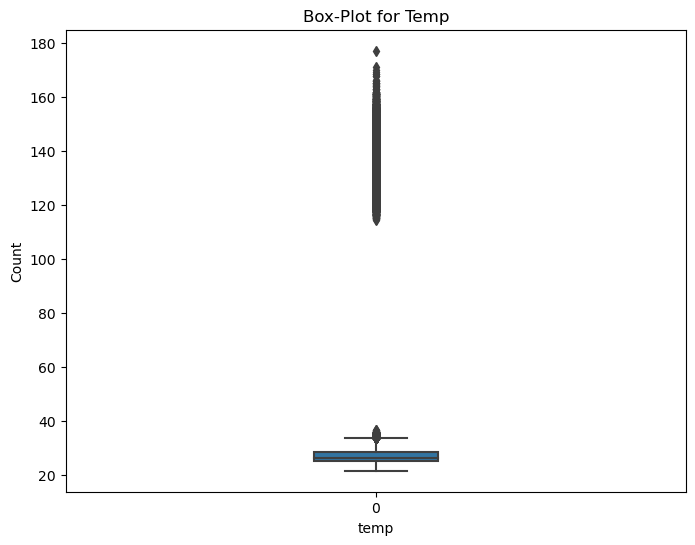

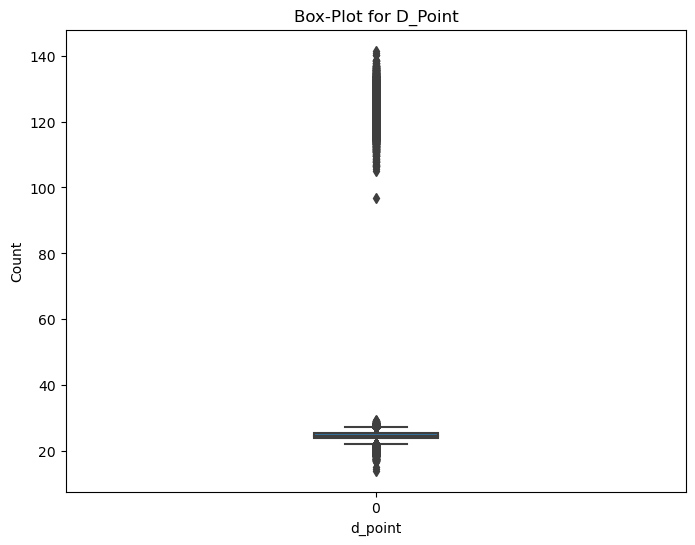

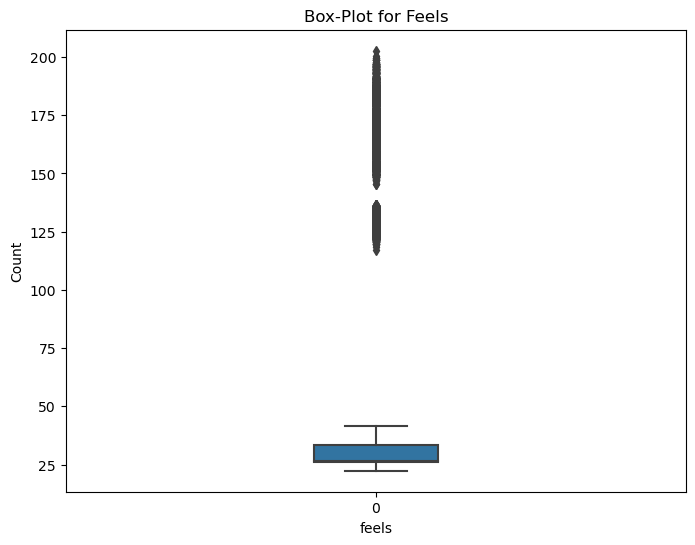

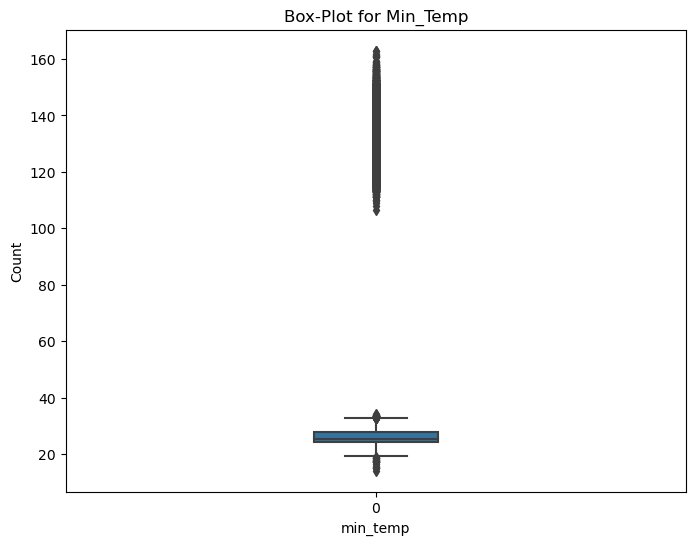

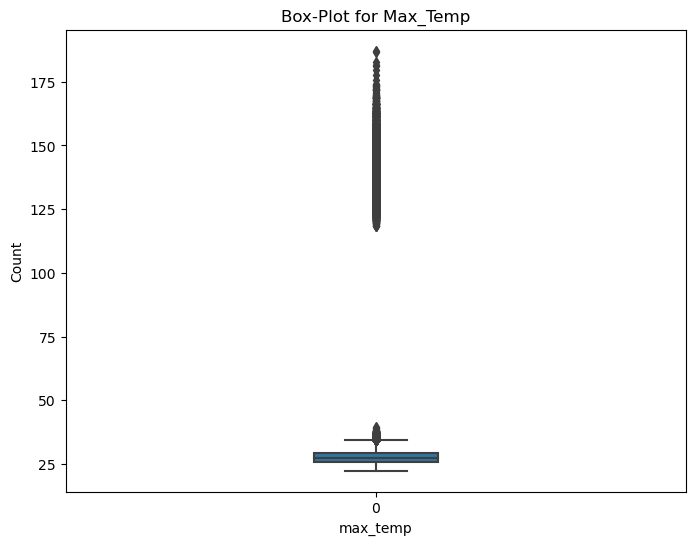

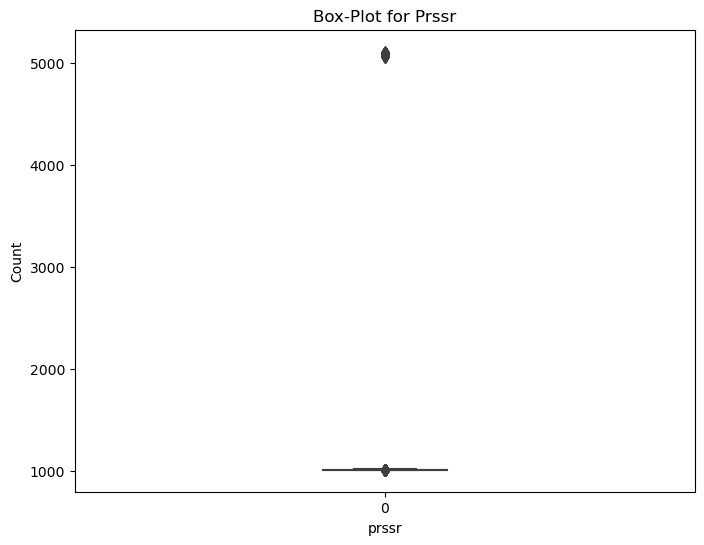

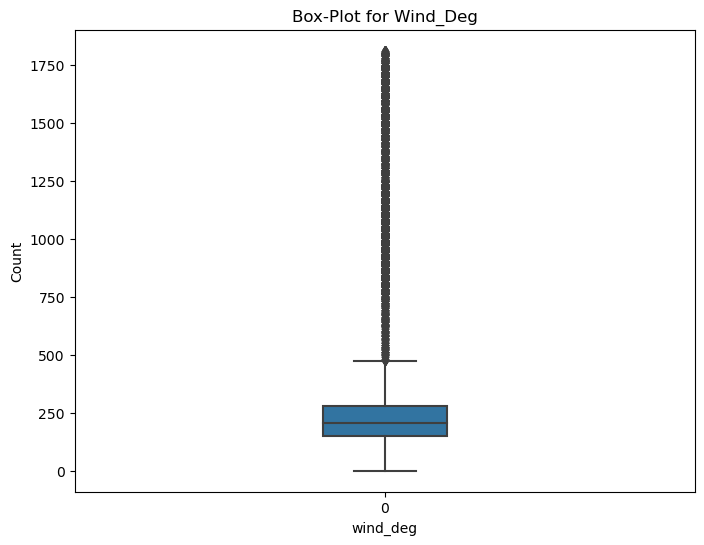

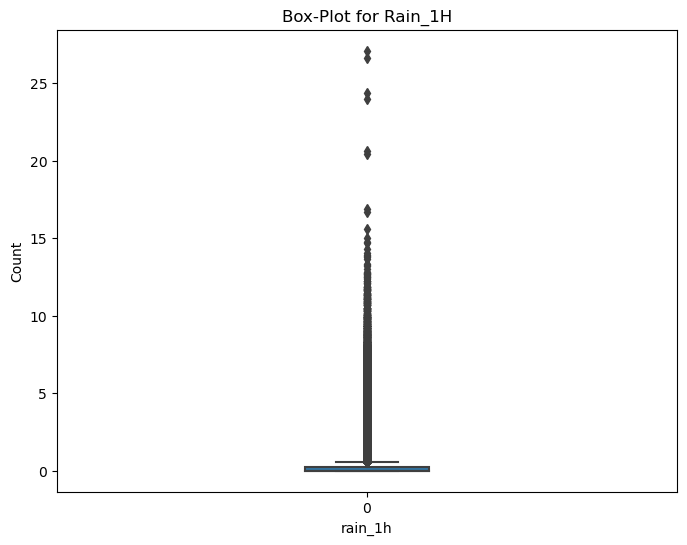

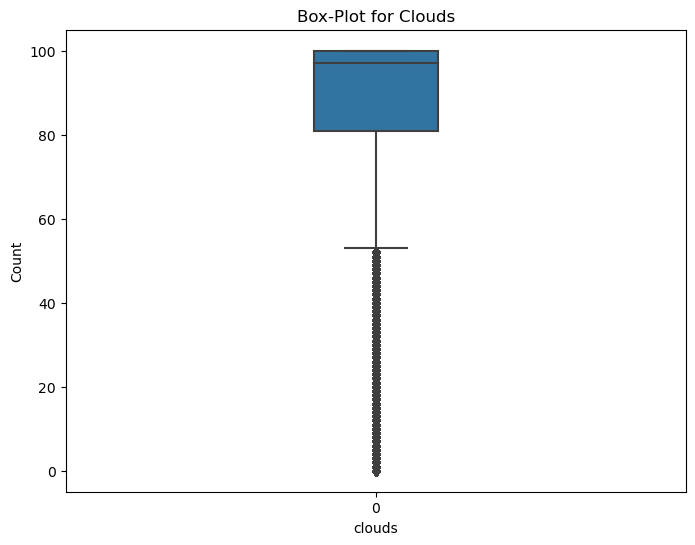

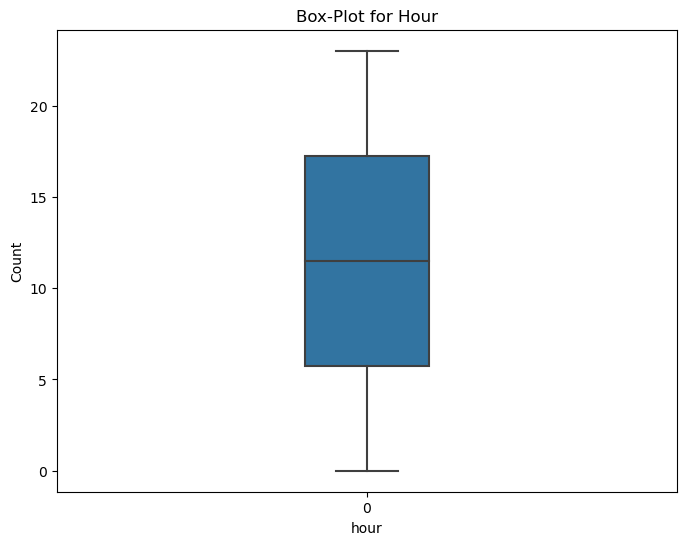

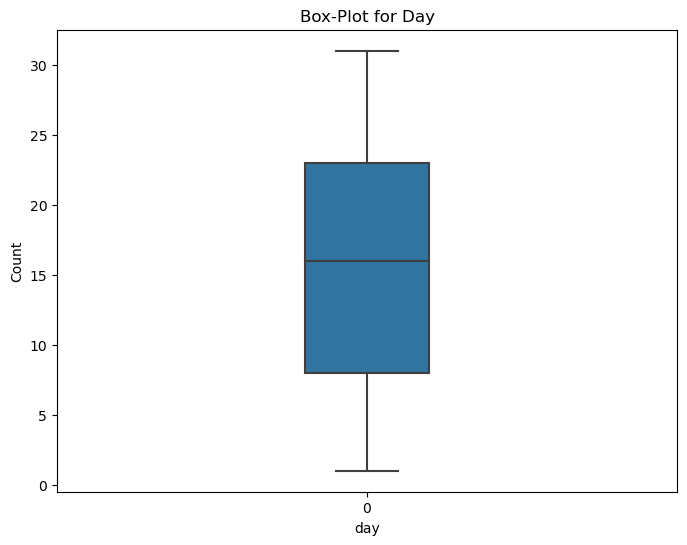

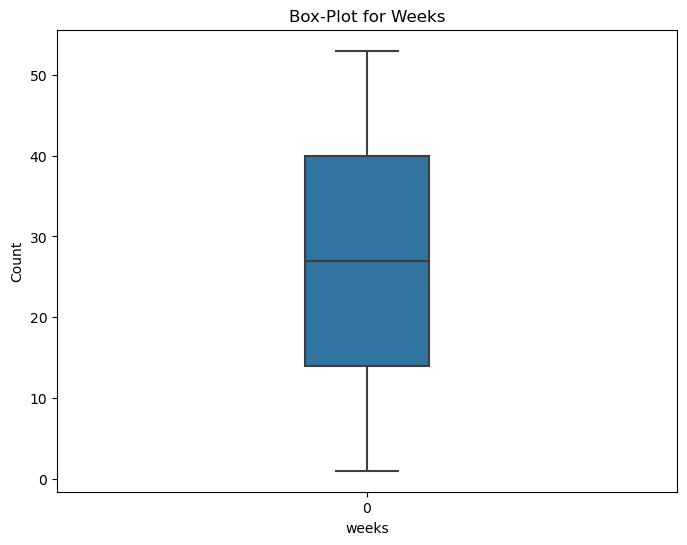

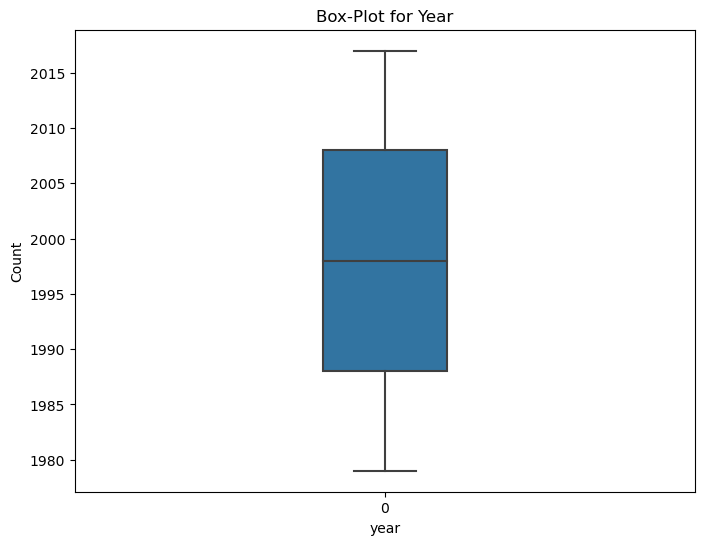

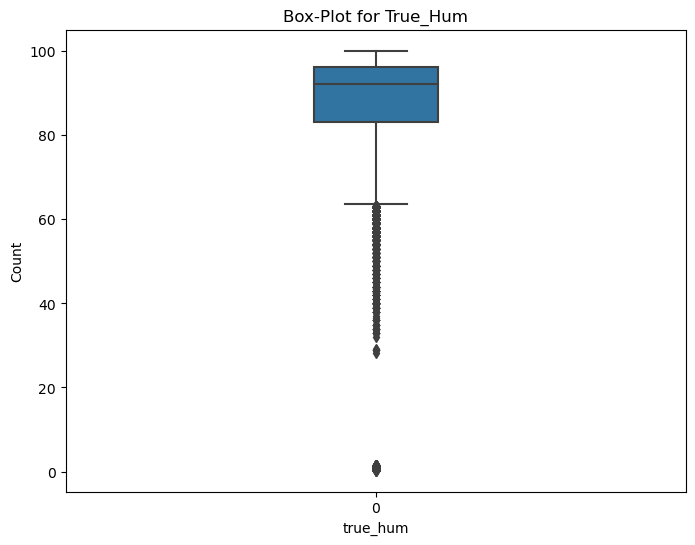

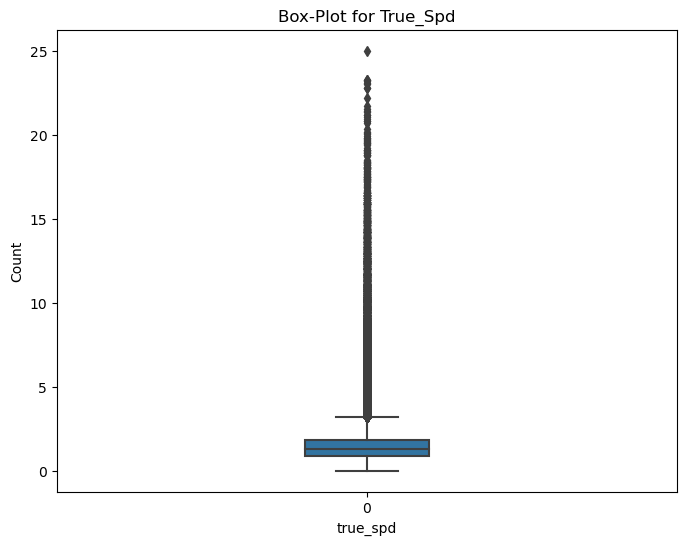

In [14]:
def plot_box(df, param, figsize, xlabel=None, ylabel=None):
    plt.figure(figsize=figsize)
    sns.boxplot(data=df[param], width=0.2)
    plt.xlabel(xlabel if xlabel else param.title())
    plt.ylabel(ylabel)
    plt.title("Box-Plot for " + param.title())
    plt.show()

column_names = df.columns

for column in column_names:
    plot_box(df, column, figsize=(8, 6), xlabel=column, ylabel='Count')

# Handling Outlier

In [15]:
df['temp'] = df['temp'].apply(lambda x: x / 5 if x > 100 else x)
df['max_temp'] = df['max_temp'].apply(lambda x: x / 5 if x > 100 else x)
df['min_temp'] = df['min_temp'].apply(lambda x: x / 5 if x > 100 else x)
df['feels'] = df['feels'].apply(lambda x: x / 5 if x > 100 else x)
df['d_point'] = df['d_point'].apply(lambda x: x / 5 if x > 80 else x)
df['prssr'] = df['prssr'].apply(lambda x: round(x / 5) if x > 1500 else x)
df['wind_deg'] = df['wind_deg'].apply(lambda x: x % 360 if x > 360 else x)
df

,temp,d_point,feels,min_temp,max_temp,prssr,wind_deg,rain_1h,clouds,hour,day,weeks,year,true_hum,true_spd
datetime_iso,,,,,,,,,,,,,,,
1979-01-01 00:00:00+00:00,24.75,23.89,25.760,24.28,25.220,1012.0,320.0,0.00,100.0,0,1,1,1979,94.972,0.82
1979-01-01 01:00:00+00:00,24.58,23.73,25.570,23.99,25.260,1012.0,338.0,0.00,100.0,1,1,1,1979,95.023,0.96
1979-01-01 02:00:00+00:00,26.60,24.06,26.600,26.10,27.390,1012.0,339.0,0.00,99.0,2,1,1,1979,85.965,1.22
1979-01-01 03:00:00+00:00,27.31,24.37,30.900,26.59,28.360,1012.0,342.0,0.13,94.0,3,1,1,1979,83.998,1.08
1979-01-01 04:00:00+00:00,27.41,25.05,31.540,26.58,28.310,1011.0,336.0,0.34,100.0,4,1,1,1979,86.973,0.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00+00:00,25.06,24.55,26.306,24.44,25.690,1007.0,13.0,0.00,99.0,19,31,52,2017,96.998,0.90
2017-12-31 20:00:00+00:00,24.51,24.17,25.580,23.89,25.130,1006.0,21.0,0.00,100.0,20,31,52,2017,97.981,0.85
2017-12-31 21:00:00+00:00,24.63,24.29,25.864,24.00,25.392,1007.0,26.0,0.00,97.0,21,31,52,2017,97.983,1.54


# Feature Engineering

In [16]:
data = df.copy()

independent_columns = ['temp','d_point','min_temp','max_temp','feels', 'true_hum', 'true_spd', 'wind_deg', 'clouds','prssr']

# Menambahkan banyak nya lags untuk transformasi data dari setiap kolom independen
n_lags = 5 

# Menambahkan kolom-kolom lags hanya untuk kolom independen
for column in independent_columns:
    for lag in range(1, n_lags + 1):
        lagged_column_name = f'{column}_lag{lag}'
        data[lagged_column_name] = data[column].shift(lag)
        data[lagged_column_name].fillna(data[column], inplace = True)
        
for column in independent_columns:
    for lag in range(1, n_lags + 1):
        lagged_column_name = f'{column}_lag{-lag}'
        data[lagged_column_name] = data[column].shift(-lag)
        data[lagged_column_name].fillna(data[column], inplace = True)
data

,temp,d_point,feels,min_temp,max_temp,prssr,wind_deg,rain_1h,clouds,hour,day,weeks,year,true_hum,true_spd,temp_lag1,temp_lag2,temp_lag3,temp_lag4,temp_lag5,d_point_lag1,d_point_lag2,d_point_lag3,d_point_lag4,d_point_lag5,min_temp_lag1,min_temp_lag2,min_temp_lag3,min_temp_lag4,min_temp_lag5,max_temp_lag1,max_temp_lag2,max_temp_lag3,max_temp_lag4,max_temp_lag5,feels_lag1,feels_lag2,feels_lag3,feels_lag4,feels_lag5,true_hum_lag1,true_hum_lag2,true_hum_lag3,true_hum_lag4,true_hum_lag5,true_spd_lag1,true_spd_lag2,true_spd_lag3,true_spd_lag4,true_spd_lag5,wind_deg_lag1,wind_deg_lag2,wind_deg_lag3,wind_deg_lag4,wind_deg_lag5,clouds_lag1,clouds_lag2,clouds_lag3,clouds_lag4,clouds_lag5,prssr_lag1,prssr_lag2,prssr_lag3,prssr_lag4,prssr_lag5,temp_lag-1,temp_lag-2,temp_lag-3,temp_lag-4,temp_lag-5,d_point_lag-1,d_point_lag-2,d_point_lag-3,d_point_lag-4,d_point_lag-5,min_temp_lag-1,min_temp_lag-2,min_temp_lag-3,min_temp_lag-4,min_temp_lag-5,max_temp_lag-1,max_temp_lag-2,max_temp_lag-3,max_temp_lag-4,max_temp_lag-5,feels_lag-1,feels_lag-2,feels_lag-3,feels_lag-4,feels_lag-5,true_hum_lag-1,true_hum_lag-2,true_hum_lag-3,true_hum_lag-4,true_hum_lag-5,true_spd_lag-1,true_spd_lag-2,true_spd_lag-3,true_spd_lag-4,true_spd_lag-5,wind_deg_lag-1,wind_deg_lag-2,wind_deg_lag-3,wind_deg_lag-4,wind_deg_lag-5,clouds_lag-1,clouds_lag-2,clouds_lag-3,clouds_lag-4,clouds_lag-5,prssr_lag-1,prssr_lag-2,prssr_lag-3,prssr_lag-4,prssr_lag-5
datetime_iso,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1979-01-01 00:00:00+00:00,24.75,23.89,25.760,24.28,25.220,1012.0,320.0,0.00,100.0,0,1,1,1979,94.972,0.82,24.75,24.75,24.75,24.75,24.75,23.89,23.89,23.89,23.890,23.890,24.28,24.28,24.28,24.28,24.28,25.220,25.220,25.22,25.22,25.22,25.760,25.760,25.760,25.760,25.76,94.972,94.972,94.972,94.972,94.972,0.82,0.82,0.82,0.82,0.82,320.0,320.0,320.0,320.0,320.0,100.0,100.0,100.0,100.0,100.0,1012.0,1012.0,1012.0,1012.0,1012.0,24.58,26.60,27.31,27.41,28.08,23.73,24.06,24.37,25.05,24.92,23.99,26.10,26.59,26.58,27.36,25.260,27.390,28.360,28.310,29.400,25.570,26.600,30.900,31.540,32.790,95.023,85.965,83.998,86.973,82.985,0.96,1.22,1.08,0.86,0.84,338.0,339.0,342.0,336.0,7.0,100.0,99.0,94.0,100.0,100.0,1012.0,1012.0,1012.0,1011.0,1010.0
1979-01-01 01:00:00+00:00,24.58,23.73,25.570,23.99,25.260,1012.0,338.0,0.00,100.0,1,1,1,1979,95.023,0.96,24.75,24.58,24.58,24.58,24.58,23.89,23.73,23.73,23.730,23.730,24.28,23.99,23.99,23.99,23.99,25.220,25.260,25.26,25.26,25.26,25.760,25.570,25.570,25.570,25.57,94.972,95.023,95.023,95.023,95.023,0.82,0.96,0.96,0.96,0.96,320.0,338.0,338.0,338.0,338.0,100.0,100.0,100.0,100.0,100.0,1012.0,1012.0,1012.0,1012.0,1012.0,26.60,27.31,27.41,28.08,28.68,24.06,24.37,25.05,24.92,24.25,26.10,26.59,26.58,27.36,27.62,27.390,28.360,28.310,29.400,31.020,26.600,30.900,31.540,32.790,33.290,85.965,83.998,86.973,82.985,76.986,1.22,1.08,0.86,0.84,0.82,339.0,342.0,336.0,7.0,309.0,99.0,94.0,100.0,100.0,100.0,1012.0,1012.0,1011.0,1010.0,1010.0
1979-01-01 02:00:00+00:00,26.60,24.06,26.600,26.10,27.390,1012.0,339.0,0.00,99.0,2,1,1,1979,85.965,1.22,24.58,24.75,26.60,26.60,26.60,23.73,23.89,24.06,24.060,24.060,23.99,24.28,26.10,26.10,26.10,25.260,25.220,27.39,27.39,27.39,25.570,25.760,26.600,26.600,26.60,95.023,94.972,85.965,85.965,85.965,0.96,0.82,1.22,1.22,1.22,338.0,320.0,339.0,339.0,339.0,100.0,100.0,99.0,99.0,99.0,1012.0,1012.0,1012.0,1012.0,1012.0,27.31,27.41,28.08,28.68,28.62,24.37,25.05,24.92,24.25,25.85,26.59,26.58,27.36,27.62,28.12,28.360,28.310,29.400,31.020,29.350,30.900,31.540,32.790,33.290,34.700,83.998,86.973,82.985,76.986,84.993,1.08,0.86,0.84,0.82,0.71,342.0,336.0,7.0,309.0,291.0,94.0,100.0,100.0,100.0,95.0,1012.0,1011.0,1010.0,1010.0,1010.0
1979-01-01 03:00:00+00:00,27.31,24.37,30.900,26.59,28.360,1012.0,342.0,0.13,94.0,3,1,1,1979,83.998,1.08,26.60,24.58,24.75,27.31,27.31,24.06,23.73,23.89,24.370,24.370,26.10,23.99,24.28,26.59,26.59,27.390,25.260,25.22,28.36,28.36,26.600,25.570,25.760,30.900,30.90,8

# Splitting Data

In [17]:
# df_train = df[((df['year'] >= 1990) & (df['year'] < 2012))]
df_train = data[data['year'] <= 2012]
df_val = data[data['year'] >= 2012]

In [18]:
X_train, y_train = df_train.drop(['rain_1h'], axis = 1), df_train['rain_1h']
X_test, y_test = df_val.drop(['rain_1h'], axis = 1), df_val['rain_1h']

In [19]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [20]:
modelXG = xgb.XGBRegressor(max_depth = 8, learning_rate = 0.01, n_estimators = 15000,colsample_bytree=0.7,
                          reg_alpha = 0.45,num_parallel_tree=3,random_state = 2023)
modelXG.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        early_stopping_rounds=500,
        verbose=True)

[0]	validation_0-rmse:0.92898	validation_1-rmse:0.98576
[1]	validation_0-rmse:0.92646	validation_1-rmse:0.98362
[2]	validation_0-rmse:0.92379	validation_1-rmse:0.98129
[3]	validation_0-rmse:0.92137	validation_1-rmse:0.97917
[4]	validation_0-rmse:0.91905	validation_1-rmse:0.97720
[5]	validation_0-rmse:0.91643	validation_1-rmse:0.97490
[6]	validation_0-rmse:0.91399	validation_1-rmse:0.97282
[7]	validation_0-rmse:0.91172	validation_1-rmse:0.97085
[8]	validation_0-rmse:0.90928	validation_1-rmse:0.96870
[9]	validation_0-rmse:0.90689	validation_1-rmse:0.96657
[10]	validation_0-rmse:0.90459	validation_1-rmse:0.96454
[11]	validation_0-rmse:0.90225	validation_1-rmse:0.96256
[12]	validation_0-rmse:0.90015	validation_1-rmse:0.96076
[13]	validation_0-rmse:0.89797	validation_1-rmse:0.95885
[14]	validation_0-rmse:0.89585	validation_1-rmse:0.95699
[15]	validation_0-rmse:0.89370	validation_1-rmse:0.95517
[16]	validation_0-rmse:0.89162	validation_1-rmse:0.95338
[17]	validation_0-rmse:0.88938	validation

[144]	validation_0-rmse:0.74647	validation_1-rmse:0.83341
[145]	validation_0-rmse:0.74588	validation_1-rmse:0.83296
[146]	validation_0-rmse:0.74530	validation_1-rmse:0.83253
[147]	validation_0-rmse:0.74473	validation_1-rmse:0.83212
[148]	validation_0-rmse:0.74411	validation_1-rmse:0.83167
[149]	validation_0-rmse:0.74362	validation_1-rmse:0.83131
[150]	validation_0-rmse:0.74305	validation_1-rmse:0.83089
[151]	validation_0-rmse:0.74241	validation_1-rmse:0.83039
[152]	validation_0-rmse:0.74182	validation_1-rmse:0.82998
[153]	validation_0-rmse:0.74126	validation_1-rmse:0.82956
[154]	validation_0-rmse:0.74072	validation_1-rmse:0.82917
[155]	validation_0-rmse:0.74018	validation_1-rmse:0.82879
[156]	validation_0-rmse:0.73960	validation_1-rmse:0.82839
[157]	validation_0-rmse:0.73898	validation_1-rmse:0.82792
[158]	validation_0-rmse:0.73844	validation_1-rmse:0.82754
[159]	validation_0-rmse:0.73792	validation_1-rmse:0.82716
[160]	validation_0-rmse:0.73728	validation_1-rmse:0.82669
[161]	validati

[286]	validation_0-rmse:0.68580	validation_1-rmse:0.79345
[287]	validation_0-rmse:0.68547	validation_1-rmse:0.79329
[288]	validation_0-rmse:0.68511	validation_1-rmse:0.79309
[289]	validation_0-rmse:0.68477	validation_1-rmse:0.79294
[290]	validation_0-rmse:0.68441	validation_1-rmse:0.79275
[291]	validation_0-rmse:0.68408	validation_1-rmse:0.79253
[292]	validation_0-rmse:0.68370	validation_1-rmse:0.79229
[293]	validation_0-rmse:0.68336	validation_1-rmse:0.79211
[294]	validation_0-rmse:0.68297	validation_1-rmse:0.79186
[295]	validation_0-rmse:0.68266	validation_1-rmse:0.79167
[296]	validation_0-rmse:0.68230	validation_1-rmse:0.79147
[297]	validation_0-rmse:0.68197	validation_1-rmse:0.79129
[298]	validation_0-rmse:0.68168	validation_1-rmse:0.79111
[299]	validation_0-rmse:0.68138	validation_1-rmse:0.79096
[300]	validation_0-rmse:0.68106	validation_1-rmse:0.79080
[301]	validation_0-rmse:0.68074	validation_1-rmse:0.79065
[302]	validation_0-rmse:0.68039	validation_1-rmse:0.79045
[303]	validati

[428]	validation_0-rmse:0.65221	validation_1-rmse:0.77713
[429]	validation_0-rmse:0.65204	validation_1-rmse:0.77707
[430]	validation_0-rmse:0.65183	validation_1-rmse:0.77696
[431]	validation_0-rmse:0.65160	validation_1-rmse:0.77684
[432]	validation_0-rmse:0.65139	validation_1-rmse:0.77673
[433]	validation_0-rmse:0.65118	validation_1-rmse:0.77663
[434]	validation_0-rmse:0.65100	validation_1-rmse:0.77654
[435]	validation_0-rmse:0.65083	validation_1-rmse:0.77646
[436]	validation_0-rmse:0.65071	validation_1-rmse:0.77641
[437]	validation_0-rmse:0.65051	validation_1-rmse:0.77631
[438]	validation_0-rmse:0.65036	validation_1-rmse:0.77623
[439]	validation_0-rmse:0.65017	validation_1-rmse:0.77616
[440]	validation_0-rmse:0.64997	validation_1-rmse:0.77607
[441]	validation_0-rmse:0.64979	validation_1-rmse:0.77599
[442]	validation_0-rmse:0.64958	validation_1-rmse:0.77588
[443]	validation_0-rmse:0.64939	validation_1-rmse:0.77580
[444]	validation_0-rmse:0.64921	validation_1-rmse:0.77572
[445]	validati

[570]	validation_0-rmse:0.62966	validation_1-rmse:0.76781
[571]	validation_0-rmse:0.62949	validation_1-rmse:0.76775
[572]	validation_0-rmse:0.62930	validation_1-rmse:0.76770
[573]	validation_0-rmse:0.62921	validation_1-rmse:0.76768
[574]	validation_0-rmse:0.62907	validation_1-rmse:0.76763
[575]	validation_0-rmse:0.62891	validation_1-rmse:0.76757
[576]	validation_0-rmse:0.62873	validation_1-rmse:0.76752
[577]	validation_0-rmse:0.62856	validation_1-rmse:0.76746
[578]	validation_0-rmse:0.62848	validation_1-rmse:0.76743
[579]	validation_0-rmse:0.62833	validation_1-rmse:0.76737
[580]	validation_0-rmse:0.62817	validation_1-rmse:0.76733
[581]	validation_0-rmse:0.62803	validation_1-rmse:0.76728
[582]	validation_0-rmse:0.62792	validation_1-rmse:0.76723
[583]	validation_0-rmse:0.62774	validation_1-rmse:0.76718
[584]	validation_0-rmse:0.62759	validation_1-rmse:0.76714
[585]	validation_0-rmse:0.62746	validation_1-rmse:0.76710
[586]	validation_0-rmse:0.62728	validation_1-rmse:0.76704
[587]	validati

[712]	validation_0-rmse:0.61231	validation_1-rmse:0.76178
[713]	validation_0-rmse:0.61218	validation_1-rmse:0.76173
[714]	validation_0-rmse:0.61207	validation_1-rmse:0.76169
[715]	validation_0-rmse:0.61196	validation_1-rmse:0.76166
[716]	validation_0-rmse:0.61187	validation_1-rmse:0.76163
[717]	validation_0-rmse:0.61175	validation_1-rmse:0.76157
[718]	validation_0-rmse:0.61162	validation_1-rmse:0.76153
[719]	validation_0-rmse:0.61151	validation_1-rmse:0.76149
[720]	validation_0-rmse:0.61144	validation_1-rmse:0.76146
[721]	validation_0-rmse:0.61135	validation_1-rmse:0.76143
[722]	validation_0-rmse:0.61121	validation_1-rmse:0.76138
[723]	validation_0-rmse:0.61108	validation_1-rmse:0.76134
[724]	validation_0-rmse:0.61098	validation_1-rmse:0.76130
[725]	validation_0-rmse:0.61090	validation_1-rmse:0.76126
[726]	validation_0-rmse:0.61082	validation_1-rmse:0.76122
[727]	validation_0-rmse:0.61073	validation_1-rmse:0.76120
[728]	validation_0-rmse:0.61062	validation_1-rmse:0.76118
[729]	validati

[854]	validation_0-rmse:0.59942	validation_1-rmse:0.75729
[855]	validation_0-rmse:0.59935	validation_1-rmse:0.75726
[856]	validation_0-rmse:0.59928	validation_1-rmse:0.75724
[857]	validation_0-rmse:0.59919	validation_1-rmse:0.75721
[858]	validation_0-rmse:0.59912	validation_1-rmse:0.75718
[859]	validation_0-rmse:0.59904	validation_1-rmse:0.75715
[860]	validation_0-rmse:0.59897	validation_1-rmse:0.75712
[861]	validation_0-rmse:0.59888	validation_1-rmse:0.75711
[862]	validation_0-rmse:0.59881	validation_1-rmse:0.75708
[863]	validation_0-rmse:0.59870	validation_1-rmse:0.75703
[864]	validation_0-rmse:0.59863	validation_1-rmse:0.75701
[865]	validation_0-rmse:0.59858	validation_1-rmse:0.75700
[866]	validation_0-rmse:0.59846	validation_1-rmse:0.75696
[867]	validation_0-rmse:0.59837	validation_1-rmse:0.75693
[868]	validation_0-rmse:0.59829	validation_1-rmse:0.75690
[869]	validation_0-rmse:0.59822	validation_1-rmse:0.75687
[870]	validation_0-rmse:0.59814	validation_1-rmse:0.75685
[871]	validati

[996]	validation_0-rmse:0.58779	validation_1-rmse:0.75369
[997]	validation_0-rmse:0.58771	validation_1-rmse:0.75367
[998]	validation_0-rmse:0.58761	validation_1-rmse:0.75364
[999]	validation_0-rmse:0.58754	validation_1-rmse:0.75362
[1000]	validation_0-rmse:0.58747	validation_1-rmse:0.75360
[1001]	validation_0-rmse:0.58738	validation_1-rmse:0.75357
[1002]	validation_0-rmse:0.58731	validation_1-rmse:0.75355
[1003]	validation_0-rmse:0.58725	validation_1-rmse:0.75353
[1004]	validation_0-rmse:0.58718	validation_1-rmse:0.75351
[1005]	validation_0-rmse:0.58713	validation_1-rmse:0.75350
[1006]	validation_0-rmse:0.58703	validation_1-rmse:0.75346
[1007]	validation_0-rmse:0.58695	validation_1-rmse:0.75345
[1008]	validation_0-rmse:0.58687	validation_1-rmse:0.75342
[1009]	validation_0-rmse:0.58681	validation_1-rmse:0.75341
[1010]	validation_0-rmse:0.58670	validation_1-rmse:0.75338
[1011]	validation_0-rmse:0.58663	validation_1-rmse:0.75335
[1012]	validation_0-rmse:0.58653	validation_1-rmse:0.75332
[

[1135]	validation_0-rmse:0.57707	validation_1-rmse:0.75070
[1136]	validation_0-rmse:0.57700	validation_1-rmse:0.75069
[1137]	validation_0-rmse:0.57690	validation_1-rmse:0.75066
[1138]	validation_0-rmse:0.57680	validation_1-rmse:0.75063
[1139]	validation_0-rmse:0.57670	validation_1-rmse:0.75061
[1140]	validation_0-rmse:0.57664	validation_1-rmse:0.75060
[1141]	validation_0-rmse:0.57657	validation_1-rmse:0.75057
[1142]	validation_0-rmse:0.57646	validation_1-rmse:0.75055
[1143]	validation_0-rmse:0.57642	validation_1-rmse:0.75053
[1144]	validation_0-rmse:0.57634	validation_1-rmse:0.75052
[1145]	validation_0-rmse:0.57627	validation_1-rmse:0.75050
[1146]	validation_0-rmse:0.57621	validation_1-rmse:0.75049
[1147]	validation_0-rmse:0.57611	validation_1-rmse:0.75046
[1148]	validation_0-rmse:0.57605	validation_1-rmse:0.75044
[1149]	validation_0-rmse:0.57597	validation_1-rmse:0.75042
[1150]	validation_0-rmse:0.57589	validation_1-rmse:0.75039
[1151]	validation_0-rmse:0.57582	validation_1-rmse:0.750

[1274]	validation_0-rmse:0.56712	validation_1-rmse:0.74816
[1275]	validation_0-rmse:0.56708	validation_1-rmse:0.74815
[1276]	validation_0-rmse:0.56698	validation_1-rmse:0.74813
[1277]	validation_0-rmse:0.56692	validation_1-rmse:0.74811
[1278]	validation_0-rmse:0.56681	validation_1-rmse:0.74809
[1279]	validation_0-rmse:0.56671	validation_1-rmse:0.74806
[1280]	validation_0-rmse:0.56663	validation_1-rmse:0.74804
[1281]	validation_0-rmse:0.56657	validation_1-rmse:0.74803
[1282]	validation_0-rmse:0.56651	validation_1-rmse:0.74802
[1283]	validation_0-rmse:0.56642	validation_1-rmse:0.74800
[1284]	validation_0-rmse:0.56636	validation_1-rmse:0.74798
[1285]	validation_0-rmse:0.56628	validation_1-rmse:0.74797
[1286]	validation_0-rmse:0.56622	validation_1-rmse:0.74796
[1287]	validation_0-rmse:0.56615	validation_1-rmse:0.74794
[1288]	validation_0-rmse:0.56609	validation_1-rmse:0.74792
[1289]	validation_0-rmse:0.56602	validation_1-rmse:0.74791
[1290]	validation_0-rmse:0.56596	validation_1-rmse:0.747

[1413]	validation_0-rmse:0.55774	validation_1-rmse:0.74585
[1414]	validation_0-rmse:0.55766	validation_1-rmse:0.74584
[1415]	validation_0-rmse:0.55760	validation_1-rmse:0.74581
[1416]	validation_0-rmse:0.55752	validation_1-rmse:0.74580
[1417]	validation_0-rmse:0.55744	validation_1-rmse:0.74578
[1418]	validation_0-rmse:0.55736	validation_1-rmse:0.74576
[1419]	validation_0-rmse:0.55729	validation_1-rmse:0.74575
[1420]	validation_0-rmse:0.55719	validation_1-rmse:0.74572
[1421]	validation_0-rmse:0.55713	validation_1-rmse:0.74570
[1422]	validation_0-rmse:0.55706	validation_1-rmse:0.74569
[1423]	validation_0-rmse:0.55701	validation_1-rmse:0.74568
[1424]	validation_0-rmse:0.55691	validation_1-rmse:0.74566
[1425]	validation_0-rmse:0.55683	validation_1-rmse:0.74564
[1426]	validation_0-rmse:0.55673	validation_1-rmse:0.74561
[1427]	validation_0-rmse:0.55666	validation_1-rmse:0.74559
[1428]	validation_0-rmse:0.55661	validation_1-rmse:0.74557
[1429]	validation_0-rmse:0.55656	validation_1-rmse:0.745

[1552]	validation_0-rmse:0.54908	validation_1-rmse:0.74389
[1553]	validation_0-rmse:0.54903	validation_1-rmse:0.74388
[1554]	validation_0-rmse:0.54897	validation_1-rmse:0.74386
[1555]	validation_0-rmse:0.54892	validation_1-rmse:0.74385
[1556]	validation_0-rmse:0.54885	validation_1-rmse:0.74384
[1557]	validation_0-rmse:0.54880	validation_1-rmse:0.74382
[1558]	validation_0-rmse:0.54875	validation_1-rmse:0.74381
[1559]	validation_0-rmse:0.54870	validation_1-rmse:0.74380
[1560]	validation_0-rmse:0.54866	validation_1-rmse:0.74379
[1561]	validation_0-rmse:0.54860	validation_1-rmse:0.74378
[1562]	validation_0-rmse:0.54857	validation_1-rmse:0.74377
[1563]	validation_0-rmse:0.54849	validation_1-rmse:0.74375
[1564]	validation_0-rmse:0.54841	validation_1-rmse:0.74373
[1565]	validation_0-rmse:0.54835	validation_1-rmse:0.74372
[1566]	validation_0-rmse:0.54830	validation_1-rmse:0.74370
[1567]	validation_0-rmse:0.54825	validation_1-rmse:0.74369
[1568]	validation_0-rmse:0.54817	validation_1-rmse:0.743

[1691]	validation_0-rmse:0.54084	validation_1-rmse:0.74208
[1692]	validation_0-rmse:0.54077	validation_1-rmse:0.74207
[1693]	validation_0-rmse:0.54072	validation_1-rmse:0.74205
[1694]	validation_0-rmse:0.54065	validation_1-rmse:0.74204
[1695]	validation_0-rmse:0.54061	validation_1-rmse:0.74202
[1696]	validation_0-rmse:0.54056	validation_1-rmse:0.74201
[1697]	validation_0-rmse:0.54053	validation_1-rmse:0.74200
[1698]	validation_0-rmse:0.54046	validation_1-rmse:0.74198
[1699]	validation_0-rmse:0.54037	validation_1-rmse:0.74196
[1700]	validation_0-rmse:0.54033	validation_1-rmse:0.74195
[1701]	validation_0-rmse:0.54026	validation_1-rmse:0.74193
[1702]	validation_0-rmse:0.54020	validation_1-rmse:0.74192
[1703]	validation_0-rmse:0.54014	validation_1-rmse:0.74191
[1704]	validation_0-rmse:0.54009	validation_1-rmse:0.74190
[1705]	validation_0-rmse:0.54003	validation_1-rmse:0.74189
[1706]	validation_0-rmse:0.53996	validation_1-rmse:0.74188
[1707]	validation_0-rmse:0.53990	validation_1-rmse:0.741

[1830]	validation_0-rmse:0.53343	validation_1-rmse:0.74052
[1831]	validation_0-rmse:0.53333	validation_1-rmse:0.74050
[1832]	validation_0-rmse:0.53327	validation_1-rmse:0.74049
[1833]	validation_0-rmse:0.53322	validation_1-rmse:0.74047
[1834]	validation_0-rmse:0.53316	validation_1-rmse:0.74046
[1835]	validation_0-rmse:0.53312	validation_1-rmse:0.74045
[1836]	validation_0-rmse:0.53306	validation_1-rmse:0.74044
[1837]	validation_0-rmse:0.53300	validation_1-rmse:0.74042
[1838]	validation_0-rmse:0.53294	validation_1-rmse:0.74040
[1839]	validation_0-rmse:0.53286	validation_1-rmse:0.74039
[1840]	validation_0-rmse:0.53280	validation_1-rmse:0.74038
[1841]	validation_0-rmse:0.53275	validation_1-rmse:0.74037
[1842]	validation_0-rmse:0.53268	validation_1-rmse:0.74036
[1843]	validation_0-rmse:0.53262	validation_1-rmse:0.74035
[1844]	validation_0-rmse:0.53256	validation_1-rmse:0.74034
[1845]	validation_0-rmse:0.53250	validation_1-rmse:0.74032
[1846]	validation_0-rmse:0.53243	validation_1-rmse:0.740

[1969]	validation_0-rmse:0.52579	validation_1-rmse:0.73893
[1970]	validation_0-rmse:0.52569	validation_1-rmse:0.73892
[1971]	validation_0-rmse:0.52564	validation_1-rmse:0.73891
[1972]	validation_0-rmse:0.52560	validation_1-rmse:0.73890
[1973]	validation_0-rmse:0.52553	validation_1-rmse:0.73889
[1974]	validation_0-rmse:0.52545	validation_1-rmse:0.73887
[1975]	validation_0-rmse:0.52539	validation_1-rmse:0.73886
[1976]	validation_0-rmse:0.52533	validation_1-rmse:0.73885
[1977]	validation_0-rmse:0.52530	validation_1-rmse:0.73885
[1978]	validation_0-rmse:0.52525	validation_1-rmse:0.73884
[1979]	validation_0-rmse:0.52521	validation_1-rmse:0.73884
[1980]	validation_0-rmse:0.52514	validation_1-rmse:0.73882
[1981]	validation_0-rmse:0.52511	validation_1-rmse:0.73881
[1982]	validation_0-rmse:0.52505	validation_1-rmse:0.73880
[1983]	validation_0-rmse:0.52500	validation_1-rmse:0.73879
[1984]	validation_0-rmse:0.52493	validation_1-rmse:0.73878
[1985]	validation_0-rmse:0.52491	validation_1-rmse:0.738

[2108]	validation_0-rmse:0.51843	validation_1-rmse:0.73744
[2109]	validation_0-rmse:0.51837	validation_1-rmse:0.73743
[2110]	validation_0-rmse:0.51832	validation_1-rmse:0.73742
[2111]	validation_0-rmse:0.51828	validation_1-rmse:0.73742
[2112]	validation_0-rmse:0.51824	validation_1-rmse:0.73740
[2113]	validation_0-rmse:0.51821	validation_1-rmse:0.73739
[2114]	validation_0-rmse:0.51816	validation_1-rmse:0.73738
[2115]	validation_0-rmse:0.51812	validation_1-rmse:0.73737
[2116]	validation_0-rmse:0.51808	validation_1-rmse:0.73737
[2117]	validation_0-rmse:0.51805	validation_1-rmse:0.73736
[2118]	validation_0-rmse:0.51798	validation_1-rmse:0.73735
[2119]	validation_0-rmse:0.51795	validation_1-rmse:0.73734
[2120]	validation_0-rmse:0.51791	validation_1-rmse:0.73733
[2121]	validation_0-rmse:0.51787	validation_1-rmse:0.73733
[2122]	validation_0-rmse:0.51784	validation_1-rmse:0.73732
[2123]	validation_0-rmse:0.51781	validation_1-rmse:0.73732
[2124]	validation_0-rmse:0.51777	validation_1-rmse:0.737

[2247]	validation_0-rmse:0.51187	validation_1-rmse:0.73618
[2248]	validation_0-rmse:0.51184	validation_1-rmse:0.73617
[2249]	validation_0-rmse:0.51179	validation_1-rmse:0.73616
[2250]	validation_0-rmse:0.51176	validation_1-rmse:0.73616
[2251]	validation_0-rmse:0.51171	validation_1-rmse:0.73615
[2252]	validation_0-rmse:0.51167	validation_1-rmse:0.73614
[2253]	validation_0-rmse:0.51160	validation_1-rmse:0.73612
[2254]	validation_0-rmse:0.51155	validation_1-rmse:0.73610
[2255]	validation_0-rmse:0.51149	validation_1-rmse:0.73610
[2256]	validation_0-rmse:0.51144	validation_1-rmse:0.73609
[2257]	validation_0-rmse:0.51140	validation_1-rmse:0.73608
[2258]	validation_0-rmse:0.51137	validation_1-rmse:0.73608
[2259]	validation_0-rmse:0.51133	validation_1-rmse:0.73607
[2260]	validation_0-rmse:0.51129	validation_1-rmse:0.73607
[2261]	validation_0-rmse:0.51125	validation_1-rmse:0.73606
[2262]	validation_0-rmse:0.51122	validation_1-rmse:0.73605
[2263]	validation_0-rmse:0.51119	validation_1-rmse:0.736

[2386]	validation_0-rmse:0.50536	validation_1-rmse:0.73500
[2387]	validation_0-rmse:0.50532	validation_1-rmse:0.73499
[2388]	validation_0-rmse:0.50528	validation_1-rmse:0.73498
[2389]	validation_0-rmse:0.50522	validation_1-rmse:0.73497
[2390]	validation_0-rmse:0.50518	validation_1-rmse:0.73496
[2391]	validation_0-rmse:0.50513	validation_1-rmse:0.73495
[2392]	validation_0-rmse:0.50508	validation_1-rmse:0.73494
[2393]	validation_0-rmse:0.50505	validation_1-rmse:0.73494
[2394]	validation_0-rmse:0.50499	validation_1-rmse:0.73492
[2395]	validation_0-rmse:0.50496	validation_1-rmse:0.73492
[2396]	validation_0-rmse:0.50492	validation_1-rmse:0.73491
[2397]	validation_0-rmse:0.50489	validation_1-rmse:0.73490
[2398]	validation_0-rmse:0.50485	validation_1-rmse:0.73489
[2399]	validation_0-rmse:0.50481	validation_1-rmse:0.73489
[2400]	validation_0-rmse:0.50477	validation_1-rmse:0.73488
[2401]	validation_0-rmse:0.50472	validation_1-rmse:0.73486
[2402]	validation_0-rmse:0.50467	validation_1-rmse:0.734

[2525]	validation_0-rmse:0.49924	validation_1-rmse:0.73386
[2526]	validation_0-rmse:0.49921	validation_1-rmse:0.73385
[2527]	validation_0-rmse:0.49917	validation_1-rmse:0.73385
[2528]	validation_0-rmse:0.49912	validation_1-rmse:0.73384
[2529]	validation_0-rmse:0.49906	validation_1-rmse:0.73383
[2530]	validation_0-rmse:0.49903	validation_1-rmse:0.73382
[2531]	validation_0-rmse:0.49897	validation_1-rmse:0.73381
[2532]	validation_0-rmse:0.49892	validation_1-rmse:0.73381
[2533]	validation_0-rmse:0.49890	validation_1-rmse:0.73380
[2534]	validation_0-rmse:0.49886	validation_1-rmse:0.73379
[2535]	validation_0-rmse:0.49881	validation_1-rmse:0.73378
[2536]	validation_0-rmse:0.49876	validation_1-rmse:0.73378
[2537]	validation_0-rmse:0.49872	validation_1-rmse:0.73377
[2538]	validation_0-rmse:0.49867	validation_1-rmse:0.73376
[2539]	validation_0-rmse:0.49861	validation_1-rmse:0.73375
[2540]	validation_0-rmse:0.49855	validation_1-rmse:0.73375
[2541]	validation_0-rmse:0.49850	validation_1-rmse:0.733

[2664]	validation_0-rmse:0.49309	validation_1-rmse:0.73278
[2665]	validation_0-rmse:0.49306	validation_1-rmse:0.73278
[2666]	validation_0-rmse:0.49301	validation_1-rmse:0.73277
[2667]	validation_0-rmse:0.49297	validation_1-rmse:0.73276
[2668]	validation_0-rmse:0.49294	validation_1-rmse:0.73275
[2669]	validation_0-rmse:0.49288	validation_1-rmse:0.73274
[2670]	validation_0-rmse:0.49284	validation_1-rmse:0.73273
[2671]	validation_0-rmse:0.49280	validation_1-rmse:0.73273
[2672]	validation_0-rmse:0.49275	validation_1-rmse:0.73272
[2673]	validation_0-rmse:0.49270	validation_1-rmse:0.73271
[2674]	validation_0-rmse:0.49266	validation_1-rmse:0.73271
[2675]	validation_0-rmse:0.49262	validation_1-rmse:0.73270
[2676]	validation_0-rmse:0.49259	validation_1-rmse:0.73270
[2677]	validation_0-rmse:0.49254	validation_1-rmse:0.73269
[2678]	validation_0-rmse:0.49251	validation_1-rmse:0.73268
[2679]	validation_0-rmse:0.49247	validation_1-rmse:0.73268
[2680]	validation_0-rmse:0.49244	validation_1-rmse:0.732

[2803]	validation_0-rmse:0.48716	validation_1-rmse:0.73184
[2804]	validation_0-rmse:0.48712	validation_1-rmse:0.73184
[2805]	validation_0-rmse:0.48709	validation_1-rmse:0.73183
[2806]	validation_0-rmse:0.48705	validation_1-rmse:0.73183
[2807]	validation_0-rmse:0.48700	validation_1-rmse:0.73182
[2808]	validation_0-rmse:0.48696	validation_1-rmse:0.73181
[2809]	validation_0-rmse:0.48690	validation_1-rmse:0.73181
[2810]	validation_0-rmse:0.48683	validation_1-rmse:0.73180
[2811]	validation_0-rmse:0.48679	validation_1-rmse:0.73179
[2812]	validation_0-rmse:0.48676	validation_1-rmse:0.73178
[2813]	validation_0-rmse:0.48673	validation_1-rmse:0.73178
[2814]	validation_0-rmse:0.48669	validation_1-rmse:0.73177
[2815]	validation_0-rmse:0.48665	validation_1-rmse:0.73176
[2816]	validation_0-rmse:0.48661	validation_1-rmse:0.73175
[2817]	validation_0-rmse:0.48656	validation_1-rmse:0.73174
[2818]	validation_0-rmse:0.48652	validation_1-rmse:0.73174
[2819]	validation_0-rmse:0.48647	validation_1-rmse:0.731

[2942]	validation_0-rmse:0.48108	validation_1-rmse:0.73090
[2943]	validation_0-rmse:0.48104	validation_1-rmse:0.73089
[2944]	validation_0-rmse:0.48100	validation_1-rmse:0.73088
[2945]	validation_0-rmse:0.48096	validation_1-rmse:0.73088
[2946]	validation_0-rmse:0.48091	validation_1-rmse:0.73087
[2947]	validation_0-rmse:0.48087	validation_1-rmse:0.73086
[2948]	validation_0-rmse:0.48081	validation_1-rmse:0.73085
[2949]	validation_0-rmse:0.48078	validation_1-rmse:0.73084
[2950]	validation_0-rmse:0.48071	validation_1-rmse:0.73083
[2951]	validation_0-rmse:0.48067	validation_1-rmse:0.73082
[2952]	validation_0-rmse:0.48062	validation_1-rmse:0.73081
[2953]	validation_0-rmse:0.48058	validation_1-rmse:0.73080
[2954]	validation_0-rmse:0.48053	validation_1-rmse:0.73080
[2955]	validation_0-rmse:0.48048	validation_1-rmse:0.73080
[2956]	validation_0-rmse:0.48044	validation_1-rmse:0.73079
[2957]	validation_0-rmse:0.48041	validation_1-rmse:0.73079
[2958]	validation_0-rmse:0.48035	validation_1-rmse:0.730

[3081]	validation_0-rmse:0.47542	validation_1-rmse:0.72998
[3082]	validation_0-rmse:0.47538	validation_1-rmse:0.72997
[3083]	validation_0-rmse:0.47535	validation_1-rmse:0.72996
[3084]	validation_0-rmse:0.47530	validation_1-rmse:0.72996
[3085]	validation_0-rmse:0.47526	validation_1-rmse:0.72995
[3086]	validation_0-rmse:0.47520	validation_1-rmse:0.72994
[3087]	validation_0-rmse:0.47515	validation_1-rmse:0.72994
[3088]	validation_0-rmse:0.47511	validation_1-rmse:0.72994
[3089]	validation_0-rmse:0.47507	validation_1-rmse:0.72993
[3090]	validation_0-rmse:0.47502	validation_1-rmse:0.72993
[3091]	validation_0-rmse:0.47499	validation_1-rmse:0.72992
[3092]	validation_0-rmse:0.47493	validation_1-rmse:0.72992
[3093]	validation_0-rmse:0.47487	validation_1-rmse:0.72991
[3094]	validation_0-rmse:0.47482	validation_1-rmse:0.72990
[3095]	validation_0-rmse:0.47476	validation_1-rmse:0.72990
[3096]	validation_0-rmse:0.47472	validation_1-rmse:0.72989
[3097]	validation_0-rmse:0.47467	validation_1-rmse:0.729

[3220]	validation_0-rmse:0.46988	validation_1-rmse:0.72914
[3221]	validation_0-rmse:0.46982	validation_1-rmse:0.72913
[3222]	validation_0-rmse:0.46978	validation_1-rmse:0.72913
[3223]	validation_0-rmse:0.46973	validation_1-rmse:0.72912
[3224]	validation_0-rmse:0.46970	validation_1-rmse:0.72912
[3225]	validation_0-rmse:0.46968	validation_1-rmse:0.72911
[3226]	validation_0-rmse:0.46965	validation_1-rmse:0.72910
[3227]	validation_0-rmse:0.46961	validation_1-rmse:0.72909
[3228]	validation_0-rmse:0.46957	validation_1-rmse:0.72909
[3229]	validation_0-rmse:0.46954	validation_1-rmse:0.72908
[3230]	validation_0-rmse:0.46951	validation_1-rmse:0.72908
[3231]	validation_0-rmse:0.46947	validation_1-rmse:0.72907
[3232]	validation_0-rmse:0.46941	validation_1-rmse:0.72906
[3233]	validation_0-rmse:0.46938	validation_1-rmse:0.72906
[3234]	validation_0-rmse:0.46934	validation_1-rmse:0.72905
[3235]	validation_0-rmse:0.46930	validation_1-rmse:0.72905
[3236]	validation_0-rmse:0.46926	validation_1-rmse:0.729

[3359]	validation_0-rmse:0.46464	validation_1-rmse:0.72830
[3360]	validation_0-rmse:0.46460	validation_1-rmse:0.72830
[3361]	validation_0-rmse:0.46455	validation_1-rmse:0.72829
[3362]	validation_0-rmse:0.46452	validation_1-rmse:0.72829
[3363]	validation_0-rmse:0.46447	validation_1-rmse:0.72828
[3364]	validation_0-rmse:0.46442	validation_1-rmse:0.72828
[3365]	validation_0-rmse:0.46438	validation_1-rmse:0.72828
[3366]	validation_0-rmse:0.46434	validation_1-rmse:0.72827
[3367]	validation_0-rmse:0.46429	validation_1-rmse:0.72826
[3368]	validation_0-rmse:0.46423	validation_1-rmse:0.72825
[3369]	validation_0-rmse:0.46419	validation_1-rmse:0.72825
[3370]	validation_0-rmse:0.46414	validation_1-rmse:0.72825
[3371]	validation_0-rmse:0.46409	validation_1-rmse:0.72824
[3372]	validation_0-rmse:0.46405	validation_1-rmse:0.72823
[3373]	validation_0-rmse:0.46403	validation_1-rmse:0.72823
[3374]	validation_0-rmse:0.46398	validation_1-rmse:0.72823
[3375]	validation_0-rmse:0.46394	validation_1-rmse:0.728

[3498]	validation_0-rmse:0.45913	validation_1-rmse:0.72750
[3499]	validation_0-rmse:0.45910	validation_1-rmse:0.72750
[3500]	validation_0-rmse:0.45905	validation_1-rmse:0.72749
[3501]	validation_0-rmse:0.45902	validation_1-rmse:0.72749
[3502]	validation_0-rmse:0.45900	validation_1-rmse:0.72748
[3503]	validation_0-rmse:0.45894	validation_1-rmse:0.72746
[3504]	validation_0-rmse:0.45892	validation_1-rmse:0.72746
[3505]	validation_0-rmse:0.45888	validation_1-rmse:0.72746
[3506]	validation_0-rmse:0.45883	validation_1-rmse:0.72745
[3507]	validation_0-rmse:0.45878	validation_1-rmse:0.72744
[3508]	validation_0-rmse:0.45872	validation_1-rmse:0.72744
[3509]	validation_0-rmse:0.45869	validation_1-rmse:0.72744
[3510]	validation_0-rmse:0.45866	validation_1-rmse:0.72743
[3511]	validation_0-rmse:0.45862	validation_1-rmse:0.72743
[3512]	validation_0-rmse:0.45859	validation_1-rmse:0.72743
[3513]	validation_0-rmse:0.45856	validation_1-rmse:0.72741
[3514]	validation_0-rmse:0.45852	validation_1-rmse:0.727

[3637]	validation_0-rmse:0.45425	validation_1-rmse:0.72678
[3638]	validation_0-rmse:0.45421	validation_1-rmse:0.72677
[3639]	validation_0-rmse:0.45415	validation_1-rmse:0.72677
[3640]	validation_0-rmse:0.45412	validation_1-rmse:0.72676
[3641]	validation_0-rmse:0.45409	validation_1-rmse:0.72676
[3642]	validation_0-rmse:0.45407	validation_1-rmse:0.72675
[3643]	validation_0-rmse:0.45402	validation_1-rmse:0.72674
[3644]	validation_0-rmse:0.45399	validation_1-rmse:0.72675
[3645]	validation_0-rmse:0.45394	validation_1-rmse:0.72674
[3646]	validation_0-rmse:0.45392	validation_1-rmse:0.72674
[3647]	validation_0-rmse:0.45389	validation_1-rmse:0.72673
[3648]	validation_0-rmse:0.45388	validation_1-rmse:0.72673
[3649]	validation_0-rmse:0.45385	validation_1-rmse:0.72673
[3650]	validation_0-rmse:0.45380	validation_1-rmse:0.72673
[3651]	validation_0-rmse:0.45377	validation_1-rmse:0.72673
[3652]	validation_0-rmse:0.45373	validation_1-rmse:0.72672
[3653]	validation_0-rmse:0.45370	validation_1-rmse:0.726

[3776]	validation_0-rmse:0.44911	validation_1-rmse:0.72604
[3777]	validation_0-rmse:0.44908	validation_1-rmse:0.72604
[3778]	validation_0-rmse:0.44905	validation_1-rmse:0.72604
[3779]	validation_0-rmse:0.44901	validation_1-rmse:0.72603
[3780]	validation_0-rmse:0.44898	validation_1-rmse:0.72603
[3781]	validation_0-rmse:0.44895	validation_1-rmse:0.72602
[3782]	validation_0-rmse:0.44892	validation_1-rmse:0.72601
[3783]	validation_0-rmse:0.44888	validation_1-rmse:0.72601
[3784]	validation_0-rmse:0.44886	validation_1-rmse:0.72600
[3785]	validation_0-rmse:0.44883	validation_1-rmse:0.72600
[3786]	validation_0-rmse:0.44880	validation_1-rmse:0.72600
[3787]	validation_0-rmse:0.44875	validation_1-rmse:0.72599
[3788]	validation_0-rmse:0.44872	validation_1-rmse:0.72599
[3789]	validation_0-rmse:0.44869	validation_1-rmse:0.72599
[3790]	validation_0-rmse:0.44863	validation_1-rmse:0.72598
[3791]	validation_0-rmse:0.44860	validation_1-rmse:0.72597
[3792]	validation_0-rmse:0.44856	validation_1-rmse:0.725

[3915]	validation_0-rmse:0.44425	validation_1-rmse:0.72537
[3916]	validation_0-rmse:0.44422	validation_1-rmse:0.72537
[3917]	validation_0-rmse:0.44418	validation_1-rmse:0.72537
[3918]	validation_0-rmse:0.44414	validation_1-rmse:0.72537
[3919]	validation_0-rmse:0.44411	validation_1-rmse:0.72537
[3920]	validation_0-rmse:0.44406	validation_1-rmse:0.72536
[3921]	validation_0-rmse:0.44403	validation_1-rmse:0.72536
[3922]	validation_0-rmse:0.44398	validation_1-rmse:0.72535
[3923]	validation_0-rmse:0.44394	validation_1-rmse:0.72535
[3924]	validation_0-rmse:0.44391	validation_1-rmse:0.72534
[3925]	validation_0-rmse:0.44388	validation_1-rmse:0.72533
[3926]	validation_0-rmse:0.44385	validation_1-rmse:0.72533
[3927]	validation_0-rmse:0.44381	validation_1-rmse:0.72532
[3928]	validation_0-rmse:0.44378	validation_1-rmse:0.72532
[3929]	validation_0-rmse:0.44371	validation_1-rmse:0.72531
[3930]	validation_0-rmse:0.44368	validation_1-rmse:0.72530
[3931]	validation_0-rmse:0.44365	validation_1-rmse:0.725

[4054]	validation_0-rmse:0.43945	validation_1-rmse:0.72473
[4055]	validation_0-rmse:0.43942	validation_1-rmse:0.72473
[4056]	validation_0-rmse:0.43939	validation_1-rmse:0.72472
[4057]	validation_0-rmse:0.43935	validation_1-rmse:0.72471
[4058]	validation_0-rmse:0.43931	validation_1-rmse:0.72471
[4059]	validation_0-rmse:0.43928	validation_1-rmse:0.72470
[4060]	validation_0-rmse:0.43926	validation_1-rmse:0.72470
[4061]	validation_0-rmse:0.43922	validation_1-rmse:0.72469
[4062]	validation_0-rmse:0.43919	validation_1-rmse:0.72469
[4063]	validation_0-rmse:0.43915	validation_1-rmse:0.72469
[4064]	validation_0-rmse:0.43912	validation_1-rmse:0.72468
[4065]	validation_0-rmse:0.43907	validation_1-rmse:0.72467
[4066]	validation_0-rmse:0.43904	validation_1-rmse:0.72466
[4067]	validation_0-rmse:0.43901	validation_1-rmse:0.72466
[4068]	validation_0-rmse:0.43898	validation_1-rmse:0.72466
[4069]	validation_0-rmse:0.43894	validation_1-rmse:0.72465
[4070]	validation_0-rmse:0.43890	validation_1-rmse:0.724

[4193]	validation_0-rmse:0.43487	validation_1-rmse:0.72403
[4194]	validation_0-rmse:0.43484	validation_1-rmse:0.72403
[4195]	validation_0-rmse:0.43480	validation_1-rmse:0.72403
[4196]	validation_0-rmse:0.43477	validation_1-rmse:0.72402
[4197]	validation_0-rmse:0.43475	validation_1-rmse:0.72402
[4198]	validation_0-rmse:0.43472	validation_1-rmse:0.72401
[4199]	validation_0-rmse:0.43469	validation_1-rmse:0.72401
[4200]	validation_0-rmse:0.43465	validation_1-rmse:0.72400
[4201]	validation_0-rmse:0.43459	validation_1-rmse:0.72399
[4202]	validation_0-rmse:0.43457	validation_1-rmse:0.72399
[4203]	validation_0-rmse:0.43453	validation_1-rmse:0.72398
[4204]	validation_0-rmse:0.43449	validation_1-rmse:0.72398
[4205]	validation_0-rmse:0.43447	validation_1-rmse:0.72398
[4206]	validation_0-rmse:0.43444	validation_1-rmse:0.72398
[4207]	validation_0-rmse:0.43440	validation_1-rmse:0.72397
[4208]	validation_0-rmse:0.43437	validation_1-rmse:0.72396
[4209]	validation_0-rmse:0.43433	validation_1-rmse:0.723

[4332]	validation_0-rmse:0.43044	validation_1-rmse:0.72339
[4333]	validation_0-rmse:0.43042	validation_1-rmse:0.72338
[4334]	validation_0-rmse:0.43039	validation_1-rmse:0.72338
[4335]	validation_0-rmse:0.43036	validation_1-rmse:0.72338
[4336]	validation_0-rmse:0.43033	validation_1-rmse:0.72337
[4337]	validation_0-rmse:0.43030	validation_1-rmse:0.72336
[4338]	validation_0-rmse:0.43025	validation_1-rmse:0.72336
[4339]	validation_0-rmse:0.43022	validation_1-rmse:0.72335
[4340]	validation_0-rmse:0.43019	validation_1-rmse:0.72335
[4341]	validation_0-rmse:0.43015	validation_1-rmse:0.72335
[4342]	validation_0-rmse:0.43013	validation_1-rmse:0.72335
[4343]	validation_0-rmse:0.43011	validation_1-rmse:0.72334
[4344]	validation_0-rmse:0.43008	validation_1-rmse:0.72334
[4345]	validation_0-rmse:0.43006	validation_1-rmse:0.72333
[4346]	validation_0-rmse:0.43003	validation_1-rmse:0.72333
[4347]	validation_0-rmse:0.43000	validation_1-rmse:0.72333
[4348]	validation_0-rmse:0.42997	validation_1-rmse:0.723

[4471]	validation_0-rmse:0.42590	validation_1-rmse:0.72272
[4472]	validation_0-rmse:0.42585	validation_1-rmse:0.72273
[4473]	validation_0-rmse:0.42581	validation_1-rmse:0.72272
[4474]	validation_0-rmse:0.42577	validation_1-rmse:0.72271
[4475]	validation_0-rmse:0.42573	validation_1-rmse:0.72271
[4476]	validation_0-rmse:0.42570	validation_1-rmse:0.72271
[4477]	validation_0-rmse:0.42566	validation_1-rmse:0.72270
[4478]	validation_0-rmse:0.42563	validation_1-rmse:0.72270
[4479]	validation_0-rmse:0.42559	validation_1-rmse:0.72269
[4480]	validation_0-rmse:0.42557	validation_1-rmse:0.72269
[4481]	validation_0-rmse:0.42553	validation_1-rmse:0.72268
[4482]	validation_0-rmse:0.42550	validation_1-rmse:0.72268
[4483]	validation_0-rmse:0.42548	validation_1-rmse:0.72267
[4484]	validation_0-rmse:0.42543	validation_1-rmse:0.72267
[4485]	validation_0-rmse:0.42539	validation_1-rmse:0.72266
[4486]	validation_0-rmse:0.42536	validation_1-rmse:0.72266
[4487]	validation_0-rmse:0.42533	validation_1-rmse:0.722

[4610]	validation_0-rmse:0.42124	validation_1-rmse:0.72208
[4611]	validation_0-rmse:0.42120	validation_1-rmse:0.72207
[4612]	validation_0-rmse:0.42117	validation_1-rmse:0.72207
[4613]	validation_0-rmse:0.42114	validation_1-rmse:0.72206
[4614]	validation_0-rmse:0.42112	validation_1-rmse:0.72206
[4615]	validation_0-rmse:0.42110	validation_1-rmse:0.72206
[4616]	validation_0-rmse:0.42108	validation_1-rmse:0.72206
[4617]	validation_0-rmse:0.42105	validation_1-rmse:0.72205
[4618]	validation_0-rmse:0.42102	validation_1-rmse:0.72205
[4619]	validation_0-rmse:0.42099	validation_1-rmse:0.72205
[4620]	validation_0-rmse:0.42097	validation_1-rmse:0.72205
[4621]	validation_0-rmse:0.42093	validation_1-rmse:0.72205
[4622]	validation_0-rmse:0.42089	validation_1-rmse:0.72204
[4623]	validation_0-rmse:0.42085	validation_1-rmse:0.72204
[4624]	validation_0-rmse:0.42082	validation_1-rmse:0.72203
[4625]	validation_0-rmse:0.42079	validation_1-rmse:0.72203
[4626]	validation_0-rmse:0.42075	validation_1-rmse:0.722

[4749]	validation_0-rmse:0.41651	validation_1-rmse:0.72147
[4750]	validation_0-rmse:0.41646	validation_1-rmse:0.72146
[4751]	validation_0-rmse:0.41642	validation_1-rmse:0.72146
[4752]	validation_0-rmse:0.41638	validation_1-rmse:0.72145
[4753]	validation_0-rmse:0.41635	validation_1-rmse:0.72144
[4754]	validation_0-rmse:0.41632	validation_1-rmse:0.72144
[4755]	validation_0-rmse:0.41630	validation_1-rmse:0.72144
[4756]	validation_0-rmse:0.41627	validation_1-rmse:0.72143
[4757]	validation_0-rmse:0.41624	validation_1-rmse:0.72143
[4758]	validation_0-rmse:0.41621	validation_1-rmse:0.72143
[4759]	validation_0-rmse:0.41618	validation_1-rmse:0.72143
[4760]	validation_0-rmse:0.41616	validation_1-rmse:0.72143
[4761]	validation_0-rmse:0.41611	validation_1-rmse:0.72142
[4762]	validation_0-rmse:0.41609	validation_1-rmse:0.72142
[4763]	validation_0-rmse:0.41605	validation_1-rmse:0.72142
[4764]	validation_0-rmse:0.41602	validation_1-rmse:0.72141
[4765]	validation_0-rmse:0.41597	validation_1-rmse:0.721

[4888]	validation_0-rmse:0.41214	validation_1-rmse:0.72089
[4889]	validation_0-rmse:0.41211	validation_1-rmse:0.72089
[4890]	validation_0-rmse:0.41211	validation_1-rmse:0.72089
[4891]	validation_0-rmse:0.41208	validation_1-rmse:0.72088
[4892]	validation_0-rmse:0.41205	validation_1-rmse:0.72088
[4893]	validation_0-rmse:0.41201	validation_1-rmse:0.72088
[4894]	validation_0-rmse:0.41199	validation_1-rmse:0.72088
[4895]	validation_0-rmse:0.41196	validation_1-rmse:0.72087
[4896]	validation_0-rmse:0.41192	validation_1-rmse:0.72087
[4897]	validation_0-rmse:0.41189	validation_1-rmse:0.72087
[4898]	validation_0-rmse:0.41185	validation_1-rmse:0.72086
[4899]	validation_0-rmse:0.41183	validation_1-rmse:0.72086
[4900]	validation_0-rmse:0.41179	validation_1-rmse:0.72086
[4901]	validation_0-rmse:0.41176	validation_1-rmse:0.72086
[4902]	validation_0-rmse:0.41173	validation_1-rmse:0.72085
[4903]	validation_0-rmse:0.41170	validation_1-rmse:0.72085
[4904]	validation_0-rmse:0.41166	validation_1-rmse:0.720

[5027]	validation_0-rmse:0.40806	validation_1-rmse:0.72040
[5028]	validation_0-rmse:0.40803	validation_1-rmse:0.72039
[5029]	validation_0-rmse:0.40800	validation_1-rmse:0.72039
[5030]	validation_0-rmse:0.40798	validation_1-rmse:0.72038
[5031]	validation_0-rmse:0.40794	validation_1-rmse:0.72038
[5032]	validation_0-rmse:0.40790	validation_1-rmse:0.72037
[5033]	validation_0-rmse:0.40788	validation_1-rmse:0.72037
[5034]	validation_0-rmse:0.40785	validation_1-rmse:0.72036
[5035]	validation_0-rmse:0.40782	validation_1-rmse:0.72036
[5036]	validation_0-rmse:0.40780	validation_1-rmse:0.72036
[5037]	validation_0-rmse:0.40777	validation_1-rmse:0.72036
[5038]	validation_0-rmse:0.40772	validation_1-rmse:0.72035
[5039]	validation_0-rmse:0.40769	validation_1-rmse:0.72035
[5040]	validation_0-rmse:0.40765	validation_1-rmse:0.72034
[5041]	validation_0-rmse:0.40763	validation_1-rmse:0.72033
[5042]	validation_0-rmse:0.40761	validation_1-rmse:0.72033
[5043]	validation_0-rmse:0.40757	validation_1-rmse:0.720

[5166]	validation_0-rmse:0.40378	validation_1-rmse:0.71979
[5167]	validation_0-rmse:0.40374	validation_1-rmse:0.71979
[5168]	validation_0-rmse:0.40373	validation_1-rmse:0.71979
[5169]	validation_0-rmse:0.40370	validation_1-rmse:0.71979
[5170]	validation_0-rmse:0.40368	validation_1-rmse:0.71978
[5171]	validation_0-rmse:0.40366	validation_1-rmse:0.71978
[5172]	validation_0-rmse:0.40361	validation_1-rmse:0.71977
[5173]	validation_0-rmse:0.40358	validation_1-rmse:0.71977
[5174]	validation_0-rmse:0.40356	validation_1-rmse:0.71977
[5175]	validation_0-rmse:0.40355	validation_1-rmse:0.71977
[5176]	validation_0-rmse:0.40352	validation_1-rmse:0.71976
[5177]	validation_0-rmse:0.40346	validation_1-rmse:0.71976
[5178]	validation_0-rmse:0.40344	validation_1-rmse:0.71976
[5179]	validation_0-rmse:0.40343	validation_1-rmse:0.71975
[5180]	validation_0-rmse:0.40341	validation_1-rmse:0.71975
[5181]	validation_0-rmse:0.40338	validation_1-rmse:0.71975
[5182]	validation_0-rmse:0.40335	validation_1-rmse:0.719

[5305]	validation_0-rmse:0.39939	validation_1-rmse:0.71926
[5306]	validation_0-rmse:0.39936	validation_1-rmse:0.71925
[5307]	validation_0-rmse:0.39934	validation_1-rmse:0.71925
[5308]	validation_0-rmse:0.39931	validation_1-rmse:0.71925
[5309]	validation_0-rmse:0.39929	validation_1-rmse:0.71925
[5310]	validation_0-rmse:0.39927	validation_1-rmse:0.71925
[5311]	validation_0-rmse:0.39923	validation_1-rmse:0.71924
[5312]	validation_0-rmse:0.39921	validation_1-rmse:0.71924
[5313]	validation_0-rmse:0.39919	validation_1-rmse:0.71924
[5314]	validation_0-rmse:0.39916	validation_1-rmse:0.71923
[5315]	validation_0-rmse:0.39912	validation_1-rmse:0.71923
[5316]	validation_0-rmse:0.39909	validation_1-rmse:0.71922
[5317]	validation_0-rmse:0.39905	validation_1-rmse:0.71922
[5318]	validation_0-rmse:0.39903	validation_1-rmse:0.71922
[5319]	validation_0-rmse:0.39900	validation_1-rmse:0.71921
[5320]	validation_0-rmse:0.39897	validation_1-rmse:0.71921
[5321]	validation_0-rmse:0.39895	validation_1-rmse:0.719

[5444]	validation_0-rmse:0.39538	validation_1-rmse:0.71876
[5445]	validation_0-rmse:0.39536	validation_1-rmse:0.71875
[5446]	validation_0-rmse:0.39532	validation_1-rmse:0.71875
[5447]	validation_0-rmse:0.39530	validation_1-rmse:0.71875
[5448]	validation_0-rmse:0.39528	validation_1-rmse:0.71875
[5449]	validation_0-rmse:0.39527	validation_1-rmse:0.71874
[5450]	validation_0-rmse:0.39525	validation_1-rmse:0.71874
[5451]	validation_0-rmse:0.39521	validation_1-rmse:0.71873
[5452]	validation_0-rmse:0.39520	validation_1-rmse:0.71873
[5453]	validation_0-rmse:0.39515	validation_1-rmse:0.71872
[5454]	validation_0-rmse:0.39513	validation_1-rmse:0.71872
[5455]	validation_0-rmse:0.39510	validation_1-rmse:0.71872
[5456]	validation_0-rmse:0.39508	validation_1-rmse:0.71872
[5457]	validation_0-rmse:0.39506	validation_1-rmse:0.71872
[5458]	validation_0-rmse:0.39502	validation_1-rmse:0.71872
[5459]	validation_0-rmse:0.39496	validation_1-rmse:0.71871
[5460]	validation_0-rmse:0.39493	validation_1-rmse:0.718

[5583]	validation_0-rmse:0.39156	validation_1-rmse:0.71829
[5584]	validation_0-rmse:0.39154	validation_1-rmse:0.71829
[5585]	validation_0-rmse:0.39150	validation_1-rmse:0.71829
[5586]	validation_0-rmse:0.39147	validation_1-rmse:0.71828
[5587]	validation_0-rmse:0.39144	validation_1-rmse:0.71828
[5588]	validation_0-rmse:0.39141	validation_1-rmse:0.71827
[5589]	validation_0-rmse:0.39137	validation_1-rmse:0.71827
[5590]	validation_0-rmse:0.39134	validation_1-rmse:0.71827
[5591]	validation_0-rmse:0.39132	validation_1-rmse:0.71826
[5592]	validation_0-rmse:0.39130	validation_1-rmse:0.71826
[5593]	validation_0-rmse:0.39128	validation_1-rmse:0.71826
[5594]	validation_0-rmse:0.39125	validation_1-rmse:0.71826
[5595]	validation_0-rmse:0.39123	validation_1-rmse:0.71825
[5596]	validation_0-rmse:0.39118	validation_1-rmse:0.71825
[5597]	validation_0-rmse:0.39115	validation_1-rmse:0.71825
[5598]	validation_0-rmse:0.39113	validation_1-rmse:0.71825
[5599]	validation_0-rmse:0.39109	validation_1-rmse:0.718

[5722]	validation_0-rmse:0.38764	validation_1-rmse:0.71786
[5723]	validation_0-rmse:0.38762	validation_1-rmse:0.71786
[5724]	validation_0-rmse:0.38761	validation_1-rmse:0.71785
[5725]	validation_0-rmse:0.38759	validation_1-rmse:0.71785
[5726]	validation_0-rmse:0.38758	validation_1-rmse:0.71785
[5727]	validation_0-rmse:0.38755	validation_1-rmse:0.71785
[5728]	validation_0-rmse:0.38753	validation_1-rmse:0.71784
[5729]	validation_0-rmse:0.38751	validation_1-rmse:0.71784
[5730]	validation_0-rmse:0.38748	validation_1-rmse:0.71784
[5731]	validation_0-rmse:0.38745	validation_1-rmse:0.71784
[5732]	validation_0-rmse:0.38742	validation_1-rmse:0.71784
[5733]	validation_0-rmse:0.38739	validation_1-rmse:0.71783
[5734]	validation_0-rmse:0.38737	validation_1-rmse:0.71783
[5735]	validation_0-rmse:0.38735	validation_1-rmse:0.71782
[5736]	validation_0-rmse:0.38734	validation_1-rmse:0.71782
[5737]	validation_0-rmse:0.38732	validation_1-rmse:0.71782
[5738]	validation_0-rmse:0.38729	validation_1-rmse:0.717

[5861]	validation_0-rmse:0.38395	validation_1-rmse:0.71740
[5862]	validation_0-rmse:0.38393	validation_1-rmse:0.71740
[5863]	validation_0-rmse:0.38391	validation_1-rmse:0.71740
[5864]	validation_0-rmse:0.38388	validation_1-rmse:0.71739
[5865]	validation_0-rmse:0.38387	validation_1-rmse:0.71739
[5866]	validation_0-rmse:0.38384	validation_1-rmse:0.71738
[5867]	validation_0-rmse:0.38381	validation_1-rmse:0.71738
[5868]	validation_0-rmse:0.38377	validation_1-rmse:0.71738
[5869]	validation_0-rmse:0.38375	validation_1-rmse:0.71738
[5870]	validation_0-rmse:0.38373	validation_1-rmse:0.71738
[5871]	validation_0-rmse:0.38370	validation_1-rmse:0.71737
[5872]	validation_0-rmse:0.38368	validation_1-rmse:0.71737
[5873]	validation_0-rmse:0.38365	validation_1-rmse:0.71737
[5874]	validation_0-rmse:0.38362	validation_1-rmse:0.71736
[5875]	validation_0-rmse:0.38358	validation_1-rmse:0.71736
[5876]	validation_0-rmse:0.38355	validation_1-rmse:0.71735
[5877]	validation_0-rmse:0.38352	validation_1-rmse:0.717

[6000]	validation_0-rmse:0.38042	validation_1-rmse:0.71703
[6001]	validation_0-rmse:0.38040	validation_1-rmse:0.71702
[6002]	validation_0-rmse:0.38038	validation_1-rmse:0.71702
[6003]	validation_0-rmse:0.38036	validation_1-rmse:0.71701
[6004]	validation_0-rmse:0.38034	validation_1-rmse:0.71701
[6005]	validation_0-rmse:0.38031	validation_1-rmse:0.71701
[6006]	validation_0-rmse:0.38028	validation_1-rmse:0.71700
[6007]	validation_0-rmse:0.38026	validation_1-rmse:0.71700
[6008]	validation_0-rmse:0.38024	validation_1-rmse:0.71700
[6009]	validation_0-rmse:0.38022	validation_1-rmse:0.71700
[6010]	validation_0-rmse:0.38021	validation_1-rmse:0.71700
[6011]	validation_0-rmse:0.38018	validation_1-rmse:0.71700
[6012]	validation_0-rmse:0.38016	validation_1-rmse:0.71699
[6013]	validation_0-rmse:0.38013	validation_1-rmse:0.71699
[6014]	validation_0-rmse:0.38011	validation_1-rmse:0.71699
[6015]	validation_0-rmse:0.38008	validation_1-rmse:0.71698
[6016]	validation_0-rmse:0.38006	validation_1-rmse:0.716

[6139]	validation_0-rmse:0.37678	validation_1-rmse:0.71662
[6140]	validation_0-rmse:0.37676	validation_1-rmse:0.71662
[6141]	validation_0-rmse:0.37673	validation_1-rmse:0.71662
[6142]	validation_0-rmse:0.37670	validation_1-rmse:0.71661
[6143]	validation_0-rmse:0.37668	validation_1-rmse:0.71661
[6144]	validation_0-rmse:0.37666	validation_1-rmse:0.71661
[6145]	validation_0-rmse:0.37664	validation_1-rmse:0.71660
[6146]	validation_0-rmse:0.37660	validation_1-rmse:0.71660
[6147]	validation_0-rmse:0.37658	validation_1-rmse:0.71659
[6148]	validation_0-rmse:0.37655	validation_1-rmse:0.71659
[6149]	validation_0-rmse:0.37653	validation_1-rmse:0.71660
[6150]	validation_0-rmse:0.37650	validation_1-rmse:0.71659
[6151]	validation_0-rmse:0.37647	validation_1-rmse:0.71659
[6152]	validation_0-rmse:0.37646	validation_1-rmse:0.71659
[6153]	validation_0-rmse:0.37643	validation_1-rmse:0.71658
[6154]	validation_0-rmse:0.37640	validation_1-rmse:0.71658
[6155]	validation_0-rmse:0.37638	validation_1-rmse:0.716

[6278]	validation_0-rmse:0.37315	validation_1-rmse:0.71621
[6279]	validation_0-rmse:0.37311	validation_1-rmse:0.71621
[6280]	validation_0-rmse:0.37310	validation_1-rmse:0.71621
[6281]	validation_0-rmse:0.37308	validation_1-rmse:0.71621
[6282]	validation_0-rmse:0.37305	validation_1-rmse:0.71621
[6283]	validation_0-rmse:0.37303	validation_1-rmse:0.71620
[6284]	validation_0-rmse:0.37301	validation_1-rmse:0.71620
[6285]	validation_0-rmse:0.37298	validation_1-rmse:0.71620
[6286]	validation_0-rmse:0.37296	validation_1-rmse:0.71620
[6287]	validation_0-rmse:0.37293	validation_1-rmse:0.71619
[6288]	validation_0-rmse:0.37291	validation_1-rmse:0.71619
[6289]	validation_0-rmse:0.37288	validation_1-rmse:0.71619
[6290]	validation_0-rmse:0.37287	validation_1-rmse:0.71618
[6291]	validation_0-rmse:0.37285	validation_1-rmse:0.71618
[6292]	validation_0-rmse:0.37282	validation_1-rmse:0.71618
[6293]	validation_0-rmse:0.37280	validation_1-rmse:0.71618
[6294]	validation_0-rmse:0.37276	validation_1-rmse:0.716

[6417]	validation_0-rmse:0.36947	validation_1-rmse:0.71584
[6418]	validation_0-rmse:0.36945	validation_1-rmse:0.71584
[6419]	validation_0-rmse:0.36942	validation_1-rmse:0.71583
[6420]	validation_0-rmse:0.36938	validation_1-rmse:0.71583
[6421]	validation_0-rmse:0.36937	validation_1-rmse:0.71583
[6422]	validation_0-rmse:0.36935	validation_1-rmse:0.71583
[6423]	validation_0-rmse:0.36932	validation_1-rmse:0.71583
[6424]	validation_0-rmse:0.36928	validation_1-rmse:0.71583
[6425]	validation_0-rmse:0.36925	validation_1-rmse:0.71582
[6426]	validation_0-rmse:0.36922	validation_1-rmse:0.71582
[6427]	validation_0-rmse:0.36919	validation_1-rmse:0.71582
[6428]	validation_0-rmse:0.36917	validation_1-rmse:0.71581
[6429]	validation_0-rmse:0.36915	validation_1-rmse:0.71581
[6430]	validation_0-rmse:0.36914	validation_1-rmse:0.71581
[6431]	validation_0-rmse:0.36910	validation_1-rmse:0.71581
[6432]	validation_0-rmse:0.36906	validation_1-rmse:0.71581
[6433]	validation_0-rmse:0.36904	validation_1-rmse:0.715

[6556]	validation_0-rmse:0.36608	validation_1-rmse:0.71551
[6557]	validation_0-rmse:0.36605	validation_1-rmse:0.71551
[6558]	validation_0-rmse:0.36603	validation_1-rmse:0.71551
[6559]	validation_0-rmse:0.36602	validation_1-rmse:0.71551
[6560]	validation_0-rmse:0.36598	validation_1-rmse:0.71550
[6561]	validation_0-rmse:0.36597	validation_1-rmse:0.71550
[6562]	validation_0-rmse:0.36595	validation_1-rmse:0.71550
[6563]	validation_0-rmse:0.36594	validation_1-rmse:0.71550
[6564]	validation_0-rmse:0.36592	validation_1-rmse:0.71550
[6565]	validation_0-rmse:0.36590	validation_1-rmse:0.71549
[6566]	validation_0-rmse:0.36588	validation_1-rmse:0.71549
[6567]	validation_0-rmse:0.36586	validation_1-rmse:0.71549
[6568]	validation_0-rmse:0.36583	validation_1-rmse:0.71548
[6569]	validation_0-rmse:0.36581	validation_1-rmse:0.71548
[6570]	validation_0-rmse:0.36578	validation_1-rmse:0.71548
[6571]	validation_0-rmse:0.36577	validation_1-rmse:0.71548
[6572]	validation_0-rmse:0.36574	validation_1-rmse:0.715

[6695]	validation_0-rmse:0.36276	validation_1-rmse:0.71518
[6696]	validation_0-rmse:0.36272	validation_1-rmse:0.71518
[6697]	validation_0-rmse:0.36270	validation_1-rmse:0.71518
[6698]	validation_0-rmse:0.36268	validation_1-rmse:0.71518
[6699]	validation_0-rmse:0.36268	validation_1-rmse:0.71518
[6700]	validation_0-rmse:0.36265	validation_1-rmse:0.71517
[6701]	validation_0-rmse:0.36263	validation_1-rmse:0.71517
[6702]	validation_0-rmse:0.36262	validation_1-rmse:0.71517
[6703]	validation_0-rmse:0.36260	validation_1-rmse:0.71517
[6704]	validation_0-rmse:0.36258	validation_1-rmse:0.71517
[6705]	validation_0-rmse:0.36255	validation_1-rmse:0.71517
[6706]	validation_0-rmse:0.36253	validation_1-rmse:0.71516
[6707]	validation_0-rmse:0.36252	validation_1-rmse:0.71516
[6708]	validation_0-rmse:0.36250	validation_1-rmse:0.71516
[6709]	validation_0-rmse:0.36247	validation_1-rmse:0.71516
[6710]	validation_0-rmse:0.36244	validation_1-rmse:0.71515
[6711]	validation_0-rmse:0.36242	validation_1-rmse:0.715

[6834]	validation_0-rmse:0.35941	validation_1-rmse:0.71482
[6835]	validation_0-rmse:0.35938	validation_1-rmse:0.71481
[6836]	validation_0-rmse:0.35937	validation_1-rmse:0.71481
[6837]	validation_0-rmse:0.35935	validation_1-rmse:0.71481
[6838]	validation_0-rmse:0.35933	validation_1-rmse:0.71481
[6839]	validation_0-rmse:0.35930	validation_1-rmse:0.71481
[6840]	validation_0-rmse:0.35928	validation_1-rmse:0.71481
[6841]	validation_0-rmse:0.35926	validation_1-rmse:0.71480
[6842]	validation_0-rmse:0.35922	validation_1-rmse:0.71480
[6843]	validation_0-rmse:0.35919	validation_1-rmse:0.71480
[6844]	validation_0-rmse:0.35916	validation_1-rmse:0.71479
[6845]	validation_0-rmse:0.35914	validation_1-rmse:0.71479
[6846]	validation_0-rmse:0.35911	validation_1-rmse:0.71479
[6847]	validation_0-rmse:0.35909	validation_1-rmse:0.71479
[6848]	validation_0-rmse:0.35907	validation_1-rmse:0.71479
[6849]	validation_0-rmse:0.35905	validation_1-rmse:0.71478
[6850]	validation_0-rmse:0.35903	validation_1-rmse:0.714

[6973]	validation_0-rmse:0.35590	validation_1-rmse:0.71438
[6974]	validation_0-rmse:0.35587	validation_1-rmse:0.71438
[6975]	validation_0-rmse:0.35585	validation_1-rmse:0.71437
[6976]	validation_0-rmse:0.35582	validation_1-rmse:0.71436
[6977]	validation_0-rmse:0.35580	validation_1-rmse:0.71436
[6978]	validation_0-rmse:0.35577	validation_1-rmse:0.71435
[6979]	validation_0-rmse:0.35576	validation_1-rmse:0.71435
[6980]	validation_0-rmse:0.35573	validation_1-rmse:0.71435
[6981]	validation_0-rmse:0.35571	validation_1-rmse:0.71435
[6982]	validation_0-rmse:0.35568	validation_1-rmse:0.71435
[6983]	validation_0-rmse:0.35565	validation_1-rmse:0.71434
[6984]	validation_0-rmse:0.35563	validation_1-rmse:0.71434
[6985]	validation_0-rmse:0.35559	validation_1-rmse:0.71434
[6986]	validation_0-rmse:0.35559	validation_1-rmse:0.71434
[6987]	validation_0-rmse:0.35556	validation_1-rmse:0.71434
[6988]	validation_0-rmse:0.35553	validation_1-rmse:0.71434
[6989]	validation_0-rmse:0.35550	validation_1-rmse:0.714

[7112]	validation_0-rmse:0.35279	validation_1-rmse:0.71403
[7113]	validation_0-rmse:0.35275	validation_1-rmse:0.71403
[7114]	validation_0-rmse:0.35274	validation_1-rmse:0.71403
[7115]	validation_0-rmse:0.35271	validation_1-rmse:0.71403
[7116]	validation_0-rmse:0.35268	validation_1-rmse:0.71402
[7117]	validation_0-rmse:0.35266	validation_1-rmse:0.71402
[7118]	validation_0-rmse:0.35264	validation_1-rmse:0.71402
[7119]	validation_0-rmse:0.35263	validation_1-rmse:0.71402
[7120]	validation_0-rmse:0.35259	validation_1-rmse:0.71402
[7121]	validation_0-rmse:0.35257	validation_1-rmse:0.71402
[7122]	validation_0-rmse:0.35254	validation_1-rmse:0.71401
[7123]	validation_0-rmse:0.35252	validation_1-rmse:0.71401
[7124]	validation_0-rmse:0.35249	validation_1-rmse:0.71401
[7125]	validation_0-rmse:0.35247	validation_1-rmse:0.71400
[7126]	validation_0-rmse:0.35245	validation_1-rmse:0.71400
[7127]	validation_0-rmse:0.35244	validation_1-rmse:0.71400
[7128]	validation_0-rmse:0.35241	validation_1-rmse:0.714

[7251]	validation_0-rmse:0.34938	validation_1-rmse:0.71364
[7252]	validation_0-rmse:0.34936	validation_1-rmse:0.71364
[7253]	validation_0-rmse:0.34934	validation_1-rmse:0.71363
[7254]	validation_0-rmse:0.34932	validation_1-rmse:0.71363
[7255]	validation_0-rmse:0.34930	validation_1-rmse:0.71363
[7256]	validation_0-rmse:0.34926	validation_1-rmse:0.71363
[7257]	validation_0-rmse:0.34923	validation_1-rmse:0.71362
[7258]	validation_0-rmse:0.34920	validation_1-rmse:0.71362
[7259]	validation_0-rmse:0.34918	validation_1-rmse:0.71362
[7260]	validation_0-rmse:0.34915	validation_1-rmse:0.71361
[7261]	validation_0-rmse:0.34913	validation_1-rmse:0.71361
[7262]	validation_0-rmse:0.34910	validation_1-rmse:0.71361
[7263]	validation_0-rmse:0.34908	validation_1-rmse:0.71361
[7264]	validation_0-rmse:0.34906	validation_1-rmse:0.71361
[7265]	validation_0-rmse:0.34904	validation_1-rmse:0.71361
[7266]	validation_0-rmse:0.34902	validation_1-rmse:0.71361
[7267]	validation_0-rmse:0.34899	validation_1-rmse:0.713

[7390]	validation_0-rmse:0.34610	validation_1-rmse:0.71333
[7391]	validation_0-rmse:0.34607	validation_1-rmse:0.71332
[7392]	validation_0-rmse:0.34605	validation_1-rmse:0.71332
[7393]	validation_0-rmse:0.34600	validation_1-rmse:0.71332
[7394]	validation_0-rmse:0.34598	validation_1-rmse:0.71332
[7395]	validation_0-rmse:0.34593	validation_1-rmse:0.71331
[7396]	validation_0-rmse:0.34588	validation_1-rmse:0.71330
[7397]	validation_0-rmse:0.34586	validation_1-rmse:0.71330
[7398]	validation_0-rmse:0.34584	validation_1-rmse:0.71330
[7399]	validation_0-rmse:0.34582	validation_1-rmse:0.71329
[7400]	validation_0-rmse:0.34580	validation_1-rmse:0.71329
[7401]	validation_0-rmse:0.34577	validation_1-rmse:0.71329
[7402]	validation_0-rmse:0.34575	validation_1-rmse:0.71329
[7403]	validation_0-rmse:0.34573	validation_1-rmse:0.71329
[7404]	validation_0-rmse:0.34570	validation_1-rmse:0.71329
[7405]	validation_0-rmse:0.34568	validation_1-rmse:0.71329
[7406]	validation_0-rmse:0.34567	validation_1-rmse:0.713

[7529]	validation_0-rmse:0.34290	validation_1-rmse:0.71301
[7530]	validation_0-rmse:0.34288	validation_1-rmse:0.71300
[7531]	validation_0-rmse:0.34286	validation_1-rmse:0.71300
[7532]	validation_0-rmse:0.34282	validation_1-rmse:0.71300
[7533]	validation_0-rmse:0.34280	validation_1-rmse:0.71299
[7534]	validation_0-rmse:0.34278	validation_1-rmse:0.71299
[7535]	validation_0-rmse:0.34276	validation_1-rmse:0.71299
[7536]	validation_0-rmse:0.34274	validation_1-rmse:0.71299
[7537]	validation_0-rmse:0.34271	validation_1-rmse:0.71298
[7538]	validation_0-rmse:0.34269	validation_1-rmse:0.71298
[7539]	validation_0-rmse:0.34267	validation_1-rmse:0.71298
[7540]	validation_0-rmse:0.34265	validation_1-rmse:0.71297
[7541]	validation_0-rmse:0.34264	validation_1-rmse:0.71297
[7542]	validation_0-rmse:0.34262	validation_1-rmse:0.71297
[7543]	validation_0-rmse:0.34260	validation_1-rmse:0.71297
[7544]	validation_0-rmse:0.34258	validation_1-rmse:0.71297
[7545]	validation_0-rmse:0.34256	validation_1-rmse:0.712

[7668]	validation_0-rmse:0.33970	validation_1-rmse:0.71265
[7669]	validation_0-rmse:0.33968	validation_1-rmse:0.71265
[7670]	validation_0-rmse:0.33966	validation_1-rmse:0.71265
[7671]	validation_0-rmse:0.33963	validation_1-rmse:0.71264
[7672]	validation_0-rmse:0.33961	validation_1-rmse:0.71264
[7673]	validation_0-rmse:0.33959	validation_1-rmse:0.71264
[7674]	validation_0-rmse:0.33958	validation_1-rmse:0.71264
[7675]	validation_0-rmse:0.33955	validation_1-rmse:0.71263
[7676]	validation_0-rmse:0.33953	validation_1-rmse:0.71263
[7677]	validation_0-rmse:0.33950	validation_1-rmse:0.71263
[7678]	validation_0-rmse:0.33948	validation_1-rmse:0.71263
[7679]	validation_0-rmse:0.33946	validation_1-rmse:0.71263
[7680]	validation_0-rmse:0.33944	validation_1-rmse:0.71262
[7681]	validation_0-rmse:0.33941	validation_1-rmse:0.71262
[7682]	validation_0-rmse:0.33938	validation_1-rmse:0.71262
[7683]	validation_0-rmse:0.33935	validation_1-rmse:0.71262
[7684]	validation_0-rmse:0.33933	validation_1-rmse:0.712

[7807]	validation_0-rmse:0.33661	validation_1-rmse:0.71236
[7808]	validation_0-rmse:0.33659	validation_1-rmse:0.71236
[7809]	validation_0-rmse:0.33656	validation_1-rmse:0.71235
[7810]	validation_0-rmse:0.33653	validation_1-rmse:0.71235
[7811]	validation_0-rmse:0.33650	validation_1-rmse:0.71235
[7812]	validation_0-rmse:0.33647	validation_1-rmse:0.71235
[7813]	validation_0-rmse:0.33645	validation_1-rmse:0.71234
[7814]	validation_0-rmse:0.33643	validation_1-rmse:0.71234
[7815]	validation_0-rmse:0.33640	validation_1-rmse:0.71234
[7816]	validation_0-rmse:0.33638	validation_1-rmse:0.71234
[7817]	validation_0-rmse:0.33637	validation_1-rmse:0.71233
[7818]	validation_0-rmse:0.33635	validation_1-rmse:0.71233
[7819]	validation_0-rmse:0.33633	validation_1-rmse:0.71233
[7820]	validation_0-rmse:0.33631	validation_1-rmse:0.71233
[7821]	validation_0-rmse:0.33628	validation_1-rmse:0.71233
[7822]	validation_0-rmse:0.33626	validation_1-rmse:0.71233
[7823]	validation_0-rmse:0.33624	validation_1-rmse:0.712

[7946]	validation_0-rmse:0.33347	validation_1-rmse:0.71207
[7947]	validation_0-rmse:0.33345	validation_1-rmse:0.71207
[7948]	validation_0-rmse:0.33342	validation_1-rmse:0.71207
[7949]	validation_0-rmse:0.33341	validation_1-rmse:0.71207
[7950]	validation_0-rmse:0.33339	validation_1-rmse:0.71207
[7951]	validation_0-rmse:0.33337	validation_1-rmse:0.71207
[7952]	validation_0-rmse:0.33335	validation_1-rmse:0.71207
[7953]	validation_0-rmse:0.33332	validation_1-rmse:0.71206
[7954]	validation_0-rmse:0.33330	validation_1-rmse:0.71206
[7955]	validation_0-rmse:0.33328	validation_1-rmse:0.71206
[7956]	validation_0-rmse:0.33325	validation_1-rmse:0.71206
[7957]	validation_0-rmse:0.33322	validation_1-rmse:0.71206
[7958]	validation_0-rmse:0.33320	validation_1-rmse:0.71206
[7959]	validation_0-rmse:0.33318	validation_1-rmse:0.71205
[7960]	validation_0-rmse:0.33315	validation_1-rmse:0.71205
[7961]	validation_0-rmse:0.33313	validation_1-rmse:0.71205
[7962]	validation_0-rmse:0.33311	validation_1-rmse:0.712

[8085]	validation_0-rmse:0.33055	validation_1-rmse:0.71186
[8086]	validation_0-rmse:0.33053	validation_1-rmse:0.71185
[8087]	validation_0-rmse:0.33052	validation_1-rmse:0.71185
[8088]	validation_0-rmse:0.33050	validation_1-rmse:0.71185
[8089]	validation_0-rmse:0.33048	validation_1-rmse:0.71185
[8090]	validation_0-rmse:0.33044	validation_1-rmse:0.71184
[8091]	validation_0-rmse:0.33040	validation_1-rmse:0.71184
[8092]	validation_0-rmse:0.33037	validation_1-rmse:0.71184
[8093]	validation_0-rmse:0.33034	validation_1-rmse:0.71184
[8094]	validation_0-rmse:0.33030	validation_1-rmse:0.71184
[8095]	validation_0-rmse:0.33028	validation_1-rmse:0.71183
[8096]	validation_0-rmse:0.33027	validation_1-rmse:0.71183
[8097]	validation_0-rmse:0.33024	validation_1-rmse:0.71183
[8098]	validation_0-rmse:0.33020	validation_1-rmse:0.71183
[8099]	validation_0-rmse:0.33019	validation_1-rmse:0.71182
[8100]	validation_0-rmse:0.33018	validation_1-rmse:0.71182
[8101]	validation_0-rmse:0.33016	validation_1-rmse:0.711

[8224]	validation_0-rmse:0.32752	validation_1-rmse:0.71162
[8225]	validation_0-rmse:0.32750	validation_1-rmse:0.71162
[8226]	validation_0-rmse:0.32748	validation_1-rmse:0.71162
[8227]	validation_0-rmse:0.32745	validation_1-rmse:0.71162
[8228]	validation_0-rmse:0.32743	validation_1-rmse:0.71161
[8229]	validation_0-rmse:0.32741	validation_1-rmse:0.71161
[8230]	validation_0-rmse:0.32740	validation_1-rmse:0.71161
[8231]	validation_0-rmse:0.32737	validation_1-rmse:0.71161
[8232]	validation_0-rmse:0.32735	validation_1-rmse:0.71161
[8233]	validation_0-rmse:0.32733	validation_1-rmse:0.71161
[8234]	validation_0-rmse:0.32731	validation_1-rmse:0.71160
[8235]	validation_0-rmse:0.32728	validation_1-rmse:0.71160
[8236]	validation_0-rmse:0.32726	validation_1-rmse:0.71160
[8237]	validation_0-rmse:0.32723	validation_1-rmse:0.71160
[8238]	validation_0-rmse:0.32720	validation_1-rmse:0.71160
[8239]	validation_0-rmse:0.32716	validation_1-rmse:0.71159
[8240]	validation_0-rmse:0.32713	validation_1-rmse:0.711

[8363]	validation_0-rmse:0.32458	validation_1-rmse:0.71140
[8364]	validation_0-rmse:0.32456	validation_1-rmse:0.71140
[8365]	validation_0-rmse:0.32454	validation_1-rmse:0.71140
[8366]	validation_0-rmse:0.32452	validation_1-rmse:0.71140
[8367]	validation_0-rmse:0.32450	validation_1-rmse:0.71140
[8368]	validation_0-rmse:0.32448	validation_1-rmse:0.71140
[8369]	validation_0-rmse:0.32447	validation_1-rmse:0.71139
[8370]	validation_0-rmse:0.32444	validation_1-rmse:0.71139
[8371]	validation_0-rmse:0.32443	validation_1-rmse:0.71139
[8372]	validation_0-rmse:0.32441	validation_1-rmse:0.71139
[8373]	validation_0-rmse:0.32440	validation_1-rmse:0.71139
[8374]	validation_0-rmse:0.32438	validation_1-rmse:0.71138
[8375]	validation_0-rmse:0.32437	validation_1-rmse:0.71138
[8376]	validation_0-rmse:0.32435	validation_1-rmse:0.71138
[8377]	validation_0-rmse:0.32433	validation_1-rmse:0.71138
[8378]	validation_0-rmse:0.32432	validation_1-rmse:0.71138
[8379]	validation_0-rmse:0.32430	validation_1-rmse:0.711

[8502]	validation_0-rmse:0.32184	validation_1-rmse:0.71118
[8503]	validation_0-rmse:0.32183	validation_1-rmse:0.71118
[8504]	validation_0-rmse:0.32180	validation_1-rmse:0.71118
[8505]	validation_0-rmse:0.32177	validation_1-rmse:0.71118
[8506]	validation_0-rmse:0.32175	validation_1-rmse:0.71117
[8507]	validation_0-rmse:0.32172	validation_1-rmse:0.71117
[8508]	validation_0-rmse:0.32170	validation_1-rmse:0.71117
[8509]	validation_0-rmse:0.32169	validation_1-rmse:0.71117
[8510]	validation_0-rmse:0.32166	validation_1-rmse:0.71117
[8511]	validation_0-rmse:0.32164	validation_1-rmse:0.71117
[8512]	validation_0-rmse:0.32161	validation_1-rmse:0.71116
[8513]	validation_0-rmse:0.32159	validation_1-rmse:0.71116
[8514]	validation_0-rmse:0.32157	validation_1-rmse:0.71116
[8515]	validation_0-rmse:0.32155	validation_1-rmse:0.71115
[8516]	validation_0-rmse:0.32153	validation_1-rmse:0.71115
[8517]	validation_0-rmse:0.32151	validation_1-rmse:0.71115
[8518]	validation_0-rmse:0.32149	validation_1-rmse:0.711

[8641]	validation_0-rmse:0.31897	validation_1-rmse:0.71098
[8642]	validation_0-rmse:0.31896	validation_1-rmse:0.71098
[8643]	validation_0-rmse:0.31894	validation_1-rmse:0.71097
[8644]	validation_0-rmse:0.31892	validation_1-rmse:0.71098
[8645]	validation_0-rmse:0.31890	validation_1-rmse:0.71097
[8646]	validation_0-rmse:0.31889	validation_1-rmse:0.71097
[8647]	validation_0-rmse:0.31888	validation_1-rmse:0.71097
[8648]	validation_0-rmse:0.31886	validation_1-rmse:0.71097
[8649]	validation_0-rmse:0.31885	validation_1-rmse:0.71097
[8650]	validation_0-rmse:0.31883	validation_1-rmse:0.71097
[8651]	validation_0-rmse:0.31882	validation_1-rmse:0.71097
[8652]	validation_0-rmse:0.31880	validation_1-rmse:0.71097
[8653]	validation_0-rmse:0.31878	validation_1-rmse:0.71097
[8654]	validation_0-rmse:0.31876	validation_1-rmse:0.71097
[8655]	validation_0-rmse:0.31876	validation_1-rmse:0.71096
[8656]	validation_0-rmse:0.31874	validation_1-rmse:0.71096
[8657]	validation_0-rmse:0.31872	validation_1-rmse:0.710

[8780]	validation_0-rmse:0.31629	validation_1-rmse:0.71078
[8781]	validation_0-rmse:0.31628	validation_1-rmse:0.71078
[8782]	validation_0-rmse:0.31627	validation_1-rmse:0.71078
[8783]	validation_0-rmse:0.31625	validation_1-rmse:0.71078
[8784]	validation_0-rmse:0.31622	validation_1-rmse:0.71078
[8785]	validation_0-rmse:0.31620	validation_1-rmse:0.71078
[8786]	validation_0-rmse:0.31619	validation_1-rmse:0.71078
[8787]	validation_0-rmse:0.31617	validation_1-rmse:0.71077
[8788]	validation_0-rmse:0.31616	validation_1-rmse:0.71078
[8789]	validation_0-rmse:0.31613	validation_1-rmse:0.71077
[8790]	validation_0-rmse:0.31612	validation_1-rmse:0.71077
[8791]	validation_0-rmse:0.31609	validation_1-rmse:0.71077
[8792]	validation_0-rmse:0.31608	validation_1-rmse:0.71077
[8793]	validation_0-rmse:0.31606	validation_1-rmse:0.71077
[8794]	validation_0-rmse:0.31604	validation_1-rmse:0.71077
[8795]	validation_0-rmse:0.31602	validation_1-rmse:0.71077
[8796]	validation_0-rmse:0.31599	validation_1-rmse:0.710

[8919]	validation_0-rmse:0.31331	validation_1-rmse:0.71052
[8920]	validation_0-rmse:0.31328	validation_1-rmse:0.71052
[8921]	validation_0-rmse:0.31325	validation_1-rmse:0.71052
[8922]	validation_0-rmse:0.31323	validation_1-rmse:0.71052
[8923]	validation_0-rmse:0.31320	validation_1-rmse:0.71052
[8924]	validation_0-rmse:0.31318	validation_1-rmse:0.71052
[8925]	validation_0-rmse:0.31316	validation_1-rmse:0.71052
[8926]	validation_0-rmse:0.31313	validation_1-rmse:0.71051
[8927]	validation_0-rmse:0.31312	validation_1-rmse:0.71051
[8928]	validation_0-rmse:0.31309	validation_1-rmse:0.71051
[8929]	validation_0-rmse:0.31306	validation_1-rmse:0.71051
[8930]	validation_0-rmse:0.31304	validation_1-rmse:0.71051
[8931]	validation_0-rmse:0.31303	validation_1-rmse:0.71050
[8932]	validation_0-rmse:0.31301	validation_1-rmse:0.71050
[8933]	validation_0-rmse:0.31298	validation_1-rmse:0.71050
[8934]	validation_0-rmse:0.31297	validation_1-rmse:0.71050
[8935]	validation_0-rmse:0.31294	validation_1-rmse:0.710

[9058]	validation_0-rmse:0.31054	validation_1-rmse:0.71032
[9059]	validation_0-rmse:0.31051	validation_1-rmse:0.71032
[9060]	validation_0-rmse:0.31048	validation_1-rmse:0.71032
[9061]	validation_0-rmse:0.31047	validation_1-rmse:0.71032
[9062]	validation_0-rmse:0.31045	validation_1-rmse:0.71031
[9063]	validation_0-rmse:0.31044	validation_1-rmse:0.71031
[9064]	validation_0-rmse:0.31041	validation_1-rmse:0.71030
[9065]	validation_0-rmse:0.31037	validation_1-rmse:0.71030
[9066]	validation_0-rmse:0.31035	validation_1-rmse:0.71030
[9067]	validation_0-rmse:0.31034	validation_1-rmse:0.71030
[9068]	validation_0-rmse:0.31032	validation_1-rmse:0.71030
[9069]	validation_0-rmse:0.31031	validation_1-rmse:0.71030
[9070]	validation_0-rmse:0.31028	validation_1-rmse:0.71030
[9071]	validation_0-rmse:0.31026	validation_1-rmse:0.71030
[9072]	validation_0-rmse:0.31024	validation_1-rmse:0.71030
[9073]	validation_0-rmse:0.31023	validation_1-rmse:0.71029
[9074]	validation_0-rmse:0.31021	validation_1-rmse:0.710

[9197]	validation_0-rmse:0.30771	validation_1-rmse:0.71009
[9198]	validation_0-rmse:0.30769	validation_1-rmse:0.71009
[9199]	validation_0-rmse:0.30767	validation_1-rmse:0.71009
[9200]	validation_0-rmse:0.30766	validation_1-rmse:0.71009
[9201]	validation_0-rmse:0.30764	validation_1-rmse:0.71009
[9202]	validation_0-rmse:0.30762	validation_1-rmse:0.71008
[9203]	validation_0-rmse:0.30760	validation_1-rmse:0.71008
[9204]	validation_0-rmse:0.30757	validation_1-rmse:0.71008
[9205]	validation_0-rmse:0.30755	validation_1-rmse:0.71008
[9206]	validation_0-rmse:0.30752	validation_1-rmse:0.71007
[9207]	validation_0-rmse:0.30750	validation_1-rmse:0.71007
[9208]	validation_0-rmse:0.30746	validation_1-rmse:0.71007
[9209]	validation_0-rmse:0.30745	validation_1-rmse:0.71007
[9210]	validation_0-rmse:0.30743	validation_1-rmse:0.71007
[9211]	validation_0-rmse:0.30741	validation_1-rmse:0.71007
[9212]	validation_0-rmse:0.30740	validation_1-rmse:0.71006
[9213]	validation_0-rmse:0.30738	validation_1-rmse:0.710

[9336]	validation_0-rmse:0.30495	validation_1-rmse:0.70988
[9337]	validation_0-rmse:0.30493	validation_1-rmse:0.70988
[9338]	validation_0-rmse:0.30490	validation_1-rmse:0.70988
[9339]	validation_0-rmse:0.30489	validation_1-rmse:0.70988
[9340]	validation_0-rmse:0.30486	validation_1-rmse:0.70988
[9341]	validation_0-rmse:0.30485	validation_1-rmse:0.70987
[9342]	validation_0-rmse:0.30484	validation_1-rmse:0.70987
[9343]	validation_0-rmse:0.30480	validation_1-rmse:0.70987
[9344]	validation_0-rmse:0.30478	validation_1-rmse:0.70987
[9345]	validation_0-rmse:0.30476	validation_1-rmse:0.70987
[9346]	validation_0-rmse:0.30475	validation_1-rmse:0.70987
[9347]	validation_0-rmse:0.30472	validation_1-rmse:0.70987
[9348]	validation_0-rmse:0.30470	validation_1-rmse:0.70987
[9349]	validation_0-rmse:0.30468	validation_1-rmse:0.70987
[9350]	validation_0-rmse:0.30466	validation_1-rmse:0.70986
[9351]	validation_0-rmse:0.30463	validation_1-rmse:0.70986
[9352]	validation_0-rmse:0.30462	validation_1-rmse:0.709

[9475]	validation_0-rmse:0.30221	validation_1-rmse:0.70968
[9476]	validation_0-rmse:0.30220	validation_1-rmse:0.70968
[9477]	validation_0-rmse:0.30217	validation_1-rmse:0.70967
[9478]	validation_0-rmse:0.30215	validation_1-rmse:0.70967
[9479]	validation_0-rmse:0.30212	validation_1-rmse:0.70967
[9480]	validation_0-rmse:0.30209	validation_1-rmse:0.70967
[9481]	validation_0-rmse:0.30207	validation_1-rmse:0.70967
[9482]	validation_0-rmse:0.30205	validation_1-rmse:0.70967
[9483]	validation_0-rmse:0.30204	validation_1-rmse:0.70966
[9484]	validation_0-rmse:0.30202	validation_1-rmse:0.70966
[9485]	validation_0-rmse:0.30200	validation_1-rmse:0.70966
[9486]	validation_0-rmse:0.30198	validation_1-rmse:0.70966
[9487]	validation_0-rmse:0.30196	validation_1-rmse:0.70966
[9488]	validation_0-rmse:0.30194	validation_1-rmse:0.70966
[9489]	validation_0-rmse:0.30192	validation_1-rmse:0.70965
[9490]	validation_0-rmse:0.30190	validation_1-rmse:0.70965
[9491]	validation_0-rmse:0.30188	validation_1-rmse:0.709

[9614]	validation_0-rmse:0.29962	validation_1-rmse:0.70947
[9615]	validation_0-rmse:0.29960	validation_1-rmse:0.70947
[9616]	validation_0-rmse:0.29956	validation_1-rmse:0.70947
[9617]	validation_0-rmse:0.29954	validation_1-rmse:0.70947
[9618]	validation_0-rmse:0.29950	validation_1-rmse:0.70946
[9619]	validation_0-rmse:0.29947	validation_1-rmse:0.70946
[9620]	validation_0-rmse:0.29946	validation_1-rmse:0.70946
[9621]	validation_0-rmse:0.29944	validation_1-rmse:0.70946
[9622]	validation_0-rmse:0.29943	validation_1-rmse:0.70946
[9623]	validation_0-rmse:0.29941	validation_1-rmse:0.70946
[9624]	validation_0-rmse:0.29938	validation_1-rmse:0.70946
[9625]	validation_0-rmse:0.29936	validation_1-rmse:0.70945
[9626]	validation_0-rmse:0.29933	validation_1-rmse:0.70945
[9627]	validation_0-rmse:0.29931	validation_1-rmse:0.70945
[9628]	validation_0-rmse:0.29930	validation_1-rmse:0.70945
[9629]	validation_0-rmse:0.29927	validation_1-rmse:0.70945
[9630]	validation_0-rmse:0.29926	validation_1-rmse:0.709

[9753]	validation_0-rmse:0.29680	validation_1-rmse:0.70928
[9754]	validation_0-rmse:0.29678	validation_1-rmse:0.70928
[9755]	validation_0-rmse:0.29676	validation_1-rmse:0.70928
[9756]	validation_0-rmse:0.29674	validation_1-rmse:0.70928
[9757]	validation_0-rmse:0.29671	validation_1-rmse:0.70928
[9758]	validation_0-rmse:0.29669	validation_1-rmse:0.70928
[9759]	validation_0-rmse:0.29667	validation_1-rmse:0.70928
[9760]	validation_0-rmse:0.29664	validation_1-rmse:0.70927
[9761]	validation_0-rmse:0.29662	validation_1-rmse:0.70927
[9762]	validation_0-rmse:0.29660	validation_1-rmse:0.70927
[9763]	validation_0-rmse:0.29659	validation_1-rmse:0.70927
[9764]	validation_0-rmse:0.29657	validation_1-rmse:0.70926
[9765]	validation_0-rmse:0.29655	validation_1-rmse:0.70926
[9766]	validation_0-rmse:0.29653	validation_1-rmse:0.70926
[9767]	validation_0-rmse:0.29651	validation_1-rmse:0.70926
[9768]	validation_0-rmse:0.29649	validation_1-rmse:0.70926
[9769]	validation_0-rmse:0.29648	validation_1-rmse:0.709

[9892]	validation_0-rmse:0.29413	validation_1-rmse:0.70912
[9893]	validation_0-rmse:0.29410	validation_1-rmse:0.70912
[9894]	validation_0-rmse:0.29409	validation_1-rmse:0.70912
[9895]	validation_0-rmse:0.29407	validation_1-rmse:0.70912
[9896]	validation_0-rmse:0.29405	validation_1-rmse:0.70912
[9897]	validation_0-rmse:0.29403	validation_1-rmse:0.70912
[9898]	validation_0-rmse:0.29401	validation_1-rmse:0.70911
[9899]	validation_0-rmse:0.29399	validation_1-rmse:0.70911
[9900]	validation_0-rmse:0.29398	validation_1-rmse:0.70911
[9901]	validation_0-rmse:0.29395	validation_1-rmse:0.70911
[9902]	validation_0-rmse:0.29393	validation_1-rmse:0.70911
[9903]	validation_0-rmse:0.29393	validation_1-rmse:0.70911
[9904]	validation_0-rmse:0.29391	validation_1-rmse:0.70911
[9905]	validation_0-rmse:0.29390	validation_1-rmse:0.70911
[9906]	validation_0-rmse:0.29388	validation_1-rmse:0.70911
[9907]	validation_0-rmse:0.29385	validation_1-rmse:0.70911
[9908]	validation_0-rmse:0.29384	validation_1-rmse:0.709

[10031]	validation_0-rmse:0.29158	validation_1-rmse:0.70896
[10032]	validation_0-rmse:0.29155	validation_1-rmse:0.70896
[10033]	validation_0-rmse:0.29154	validation_1-rmse:0.70895
[10034]	validation_0-rmse:0.29152	validation_1-rmse:0.70896
[10035]	validation_0-rmse:0.29150	validation_1-rmse:0.70896
[10036]	validation_0-rmse:0.29148	validation_1-rmse:0.70896
[10037]	validation_0-rmse:0.29147	validation_1-rmse:0.70895
[10038]	validation_0-rmse:0.29144	validation_1-rmse:0.70895
[10039]	validation_0-rmse:0.29143	validation_1-rmse:0.70895
[10040]	validation_0-rmse:0.29141	validation_1-rmse:0.70895
[10041]	validation_0-rmse:0.29140	validation_1-rmse:0.70895
[10042]	validation_0-rmse:0.29139	validation_1-rmse:0.70895
[10043]	validation_0-rmse:0.29137	validation_1-rmse:0.70895
[10044]	validation_0-rmse:0.29136	validation_1-rmse:0.70895
[10045]	validation_0-rmse:0.29134	validation_1-rmse:0.70895
[10046]	validation_0-rmse:0.29132	validation_1-rmse:0.70895
[10047]	validation_0-rmse:0.29131	valida

[10168]	validation_0-rmse:0.28931	validation_1-rmse:0.70882
[10169]	validation_0-rmse:0.28929	validation_1-rmse:0.70882
[10170]	validation_0-rmse:0.28928	validation_1-rmse:0.70882
[10171]	validation_0-rmse:0.28927	validation_1-rmse:0.70881
[10172]	validation_0-rmse:0.28925	validation_1-rmse:0.70881
[10173]	validation_0-rmse:0.28924	validation_1-rmse:0.70881
[10174]	validation_0-rmse:0.28923	validation_1-rmse:0.70881
[10175]	validation_0-rmse:0.28922	validation_1-rmse:0.70881
[10176]	validation_0-rmse:0.28920	validation_1-rmse:0.70881
[10177]	validation_0-rmse:0.28918	validation_1-rmse:0.70881
[10178]	validation_0-rmse:0.28916	validation_1-rmse:0.70881
[10179]	validation_0-rmse:0.28914	validation_1-rmse:0.70880
[10180]	validation_0-rmse:0.28912	validation_1-rmse:0.70880
[10181]	validation_0-rmse:0.28911	validation_1-rmse:0.70880
[10182]	validation_0-rmse:0.28909	validation_1-rmse:0.70880
[10183]	validation_0-rmse:0.28908	validation_1-rmse:0.70880
[10184]	validation_0-rmse:0.28907	valida

[10305]	validation_0-rmse:0.28689	validation_1-rmse:0.70865
[10306]	validation_0-rmse:0.28687	validation_1-rmse:0.70865
[10307]	validation_0-rmse:0.28684	validation_1-rmse:0.70864
[10308]	validation_0-rmse:0.28683	validation_1-rmse:0.70864
[10309]	validation_0-rmse:0.28680	validation_1-rmse:0.70864
[10310]	validation_0-rmse:0.28680	validation_1-rmse:0.70864
[10311]	validation_0-rmse:0.28677	validation_1-rmse:0.70864
[10312]	validation_0-rmse:0.28675	validation_1-rmse:0.70864
[10313]	validation_0-rmse:0.28673	validation_1-rmse:0.70864
[10314]	validation_0-rmse:0.28672	validation_1-rmse:0.70864
[10315]	validation_0-rmse:0.28670	validation_1-rmse:0.70863
[10316]	validation_0-rmse:0.28668	validation_1-rmse:0.70863
[10317]	validation_0-rmse:0.28665	validation_1-rmse:0.70863
[10318]	validation_0-rmse:0.28664	validation_1-rmse:0.70862
[10319]	validation_0-rmse:0.28662	validation_1-rmse:0.70862
[10320]	validation_0-rmse:0.28660	validation_1-rmse:0.70862
[10321]	validation_0-rmse:0.28659	valida

[10442]	validation_0-rmse:0.28471	validation_1-rmse:0.70848
[10443]	validation_0-rmse:0.28469	validation_1-rmse:0.70848
[10444]	validation_0-rmse:0.28468	validation_1-rmse:0.70848
[10445]	validation_0-rmse:0.28467	validation_1-rmse:0.70848
[10446]	validation_0-rmse:0.28466	validation_1-rmse:0.70848
[10447]	validation_0-rmse:0.28464	validation_1-rmse:0.70848
[10448]	validation_0-rmse:0.28462	validation_1-rmse:0.70848
[10449]	validation_0-rmse:0.28461	validation_1-rmse:0.70848
[10450]	validation_0-rmse:0.28460	validation_1-rmse:0.70848
[10451]	validation_0-rmse:0.28458	validation_1-rmse:0.70847
[10452]	validation_0-rmse:0.28456	validation_1-rmse:0.70848
[10453]	validation_0-rmse:0.28455	validation_1-rmse:0.70847
[10454]	validation_0-rmse:0.28453	validation_1-rmse:0.70847
[10455]	validation_0-rmse:0.28451	validation_1-rmse:0.70847
[10456]	validation_0-rmse:0.28449	validation_1-rmse:0.70847
[10457]	validation_0-rmse:0.28447	validation_1-rmse:0.70847
[10458]	validation_0-rmse:0.28445	valida

[10579]	validation_0-rmse:0.28230	validation_1-rmse:0.70828
[10580]	validation_0-rmse:0.28228	validation_1-rmse:0.70827
[10581]	validation_0-rmse:0.28226	validation_1-rmse:0.70827
[10582]	validation_0-rmse:0.28225	validation_1-rmse:0.70827
[10583]	validation_0-rmse:0.28223	validation_1-rmse:0.70827
[10584]	validation_0-rmse:0.28221	validation_1-rmse:0.70826
[10585]	validation_0-rmse:0.28219	validation_1-rmse:0.70826
[10586]	validation_0-rmse:0.28218	validation_1-rmse:0.70826
[10587]	validation_0-rmse:0.28217	validation_1-rmse:0.70826
[10588]	validation_0-rmse:0.28215	validation_1-rmse:0.70826
[10589]	validation_0-rmse:0.28214	validation_1-rmse:0.70826
[10590]	validation_0-rmse:0.28213	validation_1-rmse:0.70826
[10591]	validation_0-rmse:0.28211	validation_1-rmse:0.70826
[10592]	validation_0-rmse:0.28209	validation_1-rmse:0.70825
[10593]	validation_0-rmse:0.28207	validation_1-rmse:0.70826
[10594]	validation_0-rmse:0.28205	validation_1-rmse:0.70825
[10595]	validation_0-rmse:0.28203	valida

[10716]	validation_0-rmse:0.27988	validation_1-rmse:0.70812
[10717]	validation_0-rmse:0.27986	validation_1-rmse:0.70812
[10718]	validation_0-rmse:0.27984	validation_1-rmse:0.70811
[10719]	validation_0-rmse:0.27983	validation_1-rmse:0.70811
[10720]	validation_0-rmse:0.27980	validation_1-rmse:0.70811
[10721]	validation_0-rmse:0.27979	validation_1-rmse:0.70811
[10722]	validation_0-rmse:0.27976	validation_1-rmse:0.70811
[10723]	validation_0-rmse:0.27975	validation_1-rmse:0.70811
[10724]	validation_0-rmse:0.27974	validation_1-rmse:0.70811
[10725]	validation_0-rmse:0.27972	validation_1-rmse:0.70811
[10726]	validation_0-rmse:0.27971	validation_1-rmse:0.70810
[10727]	validation_0-rmse:0.27969	validation_1-rmse:0.70810
[10728]	validation_0-rmse:0.27969	validation_1-rmse:0.70810
[10729]	validation_0-rmse:0.27968	validation_1-rmse:0.70810
[10730]	validation_0-rmse:0.27966	validation_1-rmse:0.70810
[10731]	validation_0-rmse:0.27965	validation_1-rmse:0.70810
[10732]	validation_0-rmse:0.27963	valida

[10853]	validation_0-rmse:0.27760	validation_1-rmse:0.70797
[10854]	validation_0-rmse:0.27759	validation_1-rmse:0.70797
[10855]	validation_0-rmse:0.27758	validation_1-rmse:0.70797
[10856]	validation_0-rmse:0.27757	validation_1-rmse:0.70797
[10857]	validation_0-rmse:0.27755	validation_1-rmse:0.70797
[10858]	validation_0-rmse:0.27753	validation_1-rmse:0.70797
[10859]	validation_0-rmse:0.27751	validation_1-rmse:0.70797
[10860]	validation_0-rmse:0.27750	validation_1-rmse:0.70797
[10861]	validation_0-rmse:0.27748	validation_1-rmse:0.70796
[10862]	validation_0-rmse:0.27747	validation_1-rmse:0.70796
[10863]	validation_0-rmse:0.27746	validation_1-rmse:0.70796
[10864]	validation_0-rmse:0.27744	validation_1-rmse:0.70796
[10865]	validation_0-rmse:0.27742	validation_1-rmse:0.70796
[10866]	validation_0-rmse:0.27741	validation_1-rmse:0.70796
[10867]	validation_0-rmse:0.27740	validation_1-rmse:0.70796
[10868]	validation_0-rmse:0.27739	validation_1-rmse:0.70795
[10869]	validation_0-rmse:0.27738	valida

[10990]	validation_0-rmse:0.27542	validation_1-rmse:0.70781
[10991]	validation_0-rmse:0.27541	validation_1-rmse:0.70781
[10992]	validation_0-rmse:0.27539	validation_1-rmse:0.70781
[10993]	validation_0-rmse:0.27537	validation_1-rmse:0.70781
[10994]	validation_0-rmse:0.27536	validation_1-rmse:0.70781
[10995]	validation_0-rmse:0.27534	validation_1-rmse:0.70781
[10996]	validation_0-rmse:0.27532	validation_1-rmse:0.70781
[10997]	validation_0-rmse:0.27531	validation_1-rmse:0.70780
[10998]	validation_0-rmse:0.27529	validation_1-rmse:0.70780
[10999]	validation_0-rmse:0.27528	validation_1-rmse:0.70780
[11000]	validation_0-rmse:0.27527	validation_1-rmse:0.70780
[11001]	validation_0-rmse:0.27526	validation_1-rmse:0.70780
[11002]	validation_0-rmse:0.27524	validation_1-rmse:0.70780
[11003]	validation_0-rmse:0.27523	validation_1-rmse:0.70780
[11004]	validation_0-rmse:0.27521	validation_1-rmse:0.70780
[11005]	validation_0-rmse:0.27519	validation_1-rmse:0.70779
[11006]	validation_0-rmse:0.27518	valida

[11127]	validation_0-rmse:0.27315	validation_1-rmse:0.70768
[11128]	validation_0-rmse:0.27313	validation_1-rmse:0.70768
[11129]	validation_0-rmse:0.27312	validation_1-rmse:0.70767
[11130]	validation_0-rmse:0.27311	validation_1-rmse:0.70767
[11131]	validation_0-rmse:0.27309	validation_1-rmse:0.70767
[11132]	validation_0-rmse:0.27308	validation_1-rmse:0.70767
[11133]	validation_0-rmse:0.27306	validation_1-rmse:0.70767
[11134]	validation_0-rmse:0.27305	validation_1-rmse:0.70767
[11135]	validation_0-rmse:0.27303	validation_1-rmse:0.70767
[11136]	validation_0-rmse:0.27302	validation_1-rmse:0.70767
[11137]	validation_0-rmse:0.27301	validation_1-rmse:0.70767
[11138]	validation_0-rmse:0.27300	validation_1-rmse:0.70767
[11139]	validation_0-rmse:0.27299	validation_1-rmse:0.70767
[11140]	validation_0-rmse:0.27297	validation_1-rmse:0.70767
[11141]	validation_0-rmse:0.27295	validation_1-rmse:0.70766
[11142]	validation_0-rmse:0.27293	validation_1-rmse:0.70766
[11143]	validation_0-rmse:0.27292	valida

[11264]	validation_0-rmse:0.27085	validation_1-rmse:0.70754
[11265]	validation_0-rmse:0.27084	validation_1-rmse:0.70754
[11266]	validation_0-rmse:0.27083	validation_1-rmse:0.70753
[11267]	validation_0-rmse:0.27082	validation_1-rmse:0.70754
[11268]	validation_0-rmse:0.27081	validation_1-rmse:0.70753
[11269]	validation_0-rmse:0.27079	validation_1-rmse:0.70753
[11270]	validation_0-rmse:0.27077	validation_1-rmse:0.70753
[11271]	validation_0-rmse:0.27076	validation_1-rmse:0.70753
[11272]	validation_0-rmse:0.27075	validation_1-rmse:0.70753
[11273]	validation_0-rmse:0.27073	validation_1-rmse:0.70753
[11274]	validation_0-rmse:0.27071	validation_1-rmse:0.70753
[11275]	validation_0-rmse:0.27070	validation_1-rmse:0.70753
[11276]	validation_0-rmse:0.27068	validation_1-rmse:0.70753
[11277]	validation_0-rmse:0.27067	validation_1-rmse:0.70753
[11278]	validation_0-rmse:0.27066	validation_1-rmse:0.70752
[11279]	validation_0-rmse:0.27064	validation_1-rmse:0.70752
[11280]	validation_0-rmse:0.27063	valida

[11401]	validation_0-rmse:0.26868	validation_1-rmse:0.70739
[11402]	validation_0-rmse:0.26866	validation_1-rmse:0.70739
[11403]	validation_0-rmse:0.26863	validation_1-rmse:0.70739
[11404]	validation_0-rmse:0.26862	validation_1-rmse:0.70739
[11405]	validation_0-rmse:0.26860	validation_1-rmse:0.70739
[11406]	validation_0-rmse:0.26858	validation_1-rmse:0.70739
[11407]	validation_0-rmse:0.26857	validation_1-rmse:0.70739
[11408]	validation_0-rmse:0.26856	validation_1-rmse:0.70739
[11409]	validation_0-rmse:0.26854	validation_1-rmse:0.70738
[11410]	validation_0-rmse:0.26852	validation_1-rmse:0.70738
[11411]	validation_0-rmse:0.26850	validation_1-rmse:0.70738
[11412]	validation_0-rmse:0.26848	validation_1-rmse:0.70737
[11413]	validation_0-rmse:0.26845	validation_1-rmse:0.70737
[11414]	validation_0-rmse:0.26843	validation_1-rmse:0.70737
[11415]	validation_0-rmse:0.26842	validation_1-rmse:0.70737
[11416]	validation_0-rmse:0.26840	validation_1-rmse:0.70737
[11417]	validation_0-rmse:0.26839	valida

[11538]	validation_0-rmse:0.26660	validation_1-rmse:0.70727
[11539]	validation_0-rmse:0.26658	validation_1-rmse:0.70727
[11540]	validation_0-rmse:0.26658	validation_1-rmse:0.70727
[11541]	validation_0-rmse:0.26656	validation_1-rmse:0.70727
[11542]	validation_0-rmse:0.26654	validation_1-rmse:0.70727
[11543]	validation_0-rmse:0.26653	validation_1-rmse:0.70727
[11544]	validation_0-rmse:0.26652	validation_1-rmse:0.70727
[11545]	validation_0-rmse:0.26651	validation_1-rmse:0.70727
[11546]	validation_0-rmse:0.26648	validation_1-rmse:0.70727
[11547]	validation_0-rmse:0.26647	validation_1-rmse:0.70727
[11548]	validation_0-rmse:0.26645	validation_1-rmse:0.70726
[11549]	validation_0-rmse:0.26644	validation_1-rmse:0.70726
[11550]	validation_0-rmse:0.26642	validation_1-rmse:0.70726
[11551]	validation_0-rmse:0.26640	validation_1-rmse:0.70726
[11552]	validation_0-rmse:0.26639	validation_1-rmse:0.70726
[11553]	validation_0-rmse:0.26638	validation_1-rmse:0.70726
[11554]	validation_0-rmse:0.26637	valida

[11675]	validation_0-rmse:0.26454	validation_1-rmse:0.70717
[11676]	validation_0-rmse:0.26452	validation_1-rmse:0.70717
[11677]	validation_0-rmse:0.26450	validation_1-rmse:0.70716
[11678]	validation_0-rmse:0.26448	validation_1-rmse:0.70716
[11679]	validation_0-rmse:0.26445	validation_1-rmse:0.70716
[11680]	validation_0-rmse:0.26445	validation_1-rmse:0.70716
[11681]	validation_0-rmse:0.26442	validation_1-rmse:0.70716
[11682]	validation_0-rmse:0.26441	validation_1-rmse:0.70715
[11683]	validation_0-rmse:0.26440	validation_1-rmse:0.70715
[11684]	validation_0-rmse:0.26439	validation_1-rmse:0.70715
[11685]	validation_0-rmse:0.26437	validation_1-rmse:0.70715
[11686]	validation_0-rmse:0.26435	validation_1-rmse:0.70715
[11687]	validation_0-rmse:0.26434	validation_1-rmse:0.70715
[11688]	validation_0-rmse:0.26432	validation_1-rmse:0.70715
[11689]	validation_0-rmse:0.26430	validation_1-rmse:0.70715
[11690]	validation_0-rmse:0.26428	validation_1-rmse:0.70715
[11691]	validation_0-rmse:0.26426	valida

[11812]	validation_0-rmse:0.26264	validation_1-rmse:0.70704
[11813]	validation_0-rmse:0.26262	validation_1-rmse:0.70704
[11814]	validation_0-rmse:0.26260	validation_1-rmse:0.70704
[11815]	validation_0-rmse:0.26258	validation_1-rmse:0.70704
[11816]	validation_0-rmse:0.26257	validation_1-rmse:0.70704
[11817]	validation_0-rmse:0.26256	validation_1-rmse:0.70704
[11818]	validation_0-rmse:0.26255	validation_1-rmse:0.70704
[11819]	validation_0-rmse:0.26253	validation_1-rmse:0.70703
[11820]	validation_0-rmse:0.26251	validation_1-rmse:0.70703
[11821]	validation_0-rmse:0.26250	validation_1-rmse:0.70703
[11822]	validation_0-rmse:0.26248	validation_1-rmse:0.70703
[11823]	validation_0-rmse:0.26247	validation_1-rmse:0.70703
[11824]	validation_0-rmse:0.26246	validation_1-rmse:0.70703
[11825]	validation_0-rmse:0.26244	validation_1-rmse:0.70703
[11826]	validation_0-rmse:0.26243	validation_1-rmse:0.70703
[11827]	validation_0-rmse:0.26242	validation_1-rmse:0.70703
[11828]	validation_0-rmse:0.26240	valida

[11949]	validation_0-rmse:0.26067	validation_1-rmse:0.70693
[11950]	validation_0-rmse:0.26066	validation_1-rmse:0.70693
[11951]	validation_0-rmse:0.26065	validation_1-rmse:0.70693
[11952]	validation_0-rmse:0.26062	validation_1-rmse:0.70693
[11953]	validation_0-rmse:0.26061	validation_1-rmse:0.70693
[11954]	validation_0-rmse:0.26058	validation_1-rmse:0.70693
[11955]	validation_0-rmse:0.26057	validation_1-rmse:0.70693
[11956]	validation_0-rmse:0.26056	validation_1-rmse:0.70693
[11957]	validation_0-rmse:0.26055	validation_1-rmse:0.70693
[11958]	validation_0-rmse:0.26054	validation_1-rmse:0.70692
[11959]	validation_0-rmse:0.26053	validation_1-rmse:0.70692
[11960]	validation_0-rmse:0.26052	validation_1-rmse:0.70692
[11961]	validation_0-rmse:0.26051	validation_1-rmse:0.70692
[11962]	validation_0-rmse:0.26050	validation_1-rmse:0.70692
[11963]	validation_0-rmse:0.26049	validation_1-rmse:0.70692
[11964]	validation_0-rmse:0.26048	validation_1-rmse:0.70692
[11965]	validation_0-rmse:0.26047	valida

[12086]	validation_0-rmse:0.25867	validation_1-rmse:0.70682
[12087]	validation_0-rmse:0.25866	validation_1-rmse:0.70682
[12088]	validation_0-rmse:0.25865	validation_1-rmse:0.70681
[12089]	validation_0-rmse:0.25863	validation_1-rmse:0.70681
[12090]	validation_0-rmse:0.25862	validation_1-rmse:0.70681
[12091]	validation_0-rmse:0.25859	validation_1-rmse:0.70681
[12092]	validation_0-rmse:0.25858	validation_1-rmse:0.70681
[12093]	validation_0-rmse:0.25857	validation_1-rmse:0.70680
[12094]	validation_0-rmse:0.25855	validation_1-rmse:0.70680
[12095]	validation_0-rmse:0.25853	validation_1-rmse:0.70680
[12096]	validation_0-rmse:0.25851	validation_1-rmse:0.70680
[12097]	validation_0-rmse:0.25849	validation_1-rmse:0.70680
[12098]	validation_0-rmse:0.25848	validation_1-rmse:0.70680
[12099]	validation_0-rmse:0.25846	validation_1-rmse:0.70680
[12100]	validation_0-rmse:0.25845	validation_1-rmse:0.70680
[12101]	validation_0-rmse:0.25844	validation_1-rmse:0.70680
[12102]	validation_0-rmse:0.25843	valida

[12223]	validation_0-rmse:0.25653	validation_1-rmse:0.70668
[12224]	validation_0-rmse:0.25652	validation_1-rmse:0.70668
[12225]	validation_0-rmse:0.25651	validation_1-rmse:0.70668
[12226]	validation_0-rmse:0.25649	validation_1-rmse:0.70668
[12227]	validation_0-rmse:0.25648	validation_1-rmse:0.70668
[12228]	validation_0-rmse:0.25647	validation_1-rmse:0.70668
[12229]	validation_0-rmse:0.25646	validation_1-rmse:0.70668
[12230]	validation_0-rmse:0.25645	validation_1-rmse:0.70667
[12231]	validation_0-rmse:0.25643	validation_1-rmse:0.70667
[12232]	validation_0-rmse:0.25642	validation_1-rmse:0.70667
[12233]	validation_0-rmse:0.25640	validation_1-rmse:0.70667
[12234]	validation_0-rmse:0.25638	validation_1-rmse:0.70667
[12235]	validation_0-rmse:0.25637	validation_1-rmse:0.70667
[12236]	validation_0-rmse:0.25635	validation_1-rmse:0.70667
[12237]	validation_0-rmse:0.25634	validation_1-rmse:0.70667
[12238]	validation_0-rmse:0.25632	validation_1-rmse:0.70666
[12239]	validation_0-rmse:0.25631	valida

[12360]	validation_0-rmse:0.25455	validation_1-rmse:0.70657
[12361]	validation_0-rmse:0.25454	validation_1-rmse:0.70657
[12362]	validation_0-rmse:0.25453	validation_1-rmse:0.70657
[12363]	validation_0-rmse:0.25451	validation_1-rmse:0.70657
[12364]	validation_0-rmse:0.25449	validation_1-rmse:0.70657
[12365]	validation_0-rmse:0.25448	validation_1-rmse:0.70657
[12366]	validation_0-rmse:0.25446	validation_1-rmse:0.70657
[12367]	validation_0-rmse:0.25445	validation_1-rmse:0.70657
[12368]	validation_0-rmse:0.25443	validation_1-rmse:0.70657
[12369]	validation_0-rmse:0.25442	validation_1-rmse:0.70657
[12370]	validation_0-rmse:0.25441	validation_1-rmse:0.70657
[12371]	validation_0-rmse:0.25440	validation_1-rmse:0.70657
[12372]	validation_0-rmse:0.25439	validation_1-rmse:0.70657
[12373]	validation_0-rmse:0.25437	validation_1-rmse:0.70656
[12374]	validation_0-rmse:0.25436	validation_1-rmse:0.70656
[12375]	validation_0-rmse:0.25433	validation_1-rmse:0.70656
[12376]	validation_0-rmse:0.25431	valida

[12497]	validation_0-rmse:0.25256	validation_1-rmse:0.70645
[12498]	validation_0-rmse:0.25255	validation_1-rmse:0.70645
[12499]	validation_0-rmse:0.25254	validation_1-rmse:0.70645
[12500]	validation_0-rmse:0.25252	validation_1-rmse:0.70645
[12501]	validation_0-rmse:0.25251	validation_1-rmse:0.70645
[12502]	validation_0-rmse:0.25250	validation_1-rmse:0.70645
[12503]	validation_0-rmse:0.25248	validation_1-rmse:0.70645
[12504]	validation_0-rmse:0.25247	validation_1-rmse:0.70645
[12505]	validation_0-rmse:0.25245	validation_1-rmse:0.70645
[12506]	validation_0-rmse:0.25244	validation_1-rmse:0.70645
[12507]	validation_0-rmse:0.25243	validation_1-rmse:0.70645
[12508]	validation_0-rmse:0.25242	validation_1-rmse:0.70645
[12509]	validation_0-rmse:0.25240	validation_1-rmse:0.70645
[12510]	validation_0-rmse:0.25239	validation_1-rmse:0.70645
[12511]	validation_0-rmse:0.25238	validation_1-rmse:0.70645
[12512]	validation_0-rmse:0.25237	validation_1-rmse:0.70645
[12513]	validation_0-rmse:0.25236	valida

[12634]	validation_0-rmse:0.25069	validation_1-rmse:0.70635
[12635]	validation_0-rmse:0.25067	validation_1-rmse:0.70635
[12636]	validation_0-rmse:0.25066	validation_1-rmse:0.70635
[12637]	validation_0-rmse:0.25064	validation_1-rmse:0.70635
[12638]	validation_0-rmse:0.25063	validation_1-rmse:0.70635
[12639]	validation_0-rmse:0.25062	validation_1-rmse:0.70634
[12640]	validation_0-rmse:0.25060	validation_1-rmse:0.70634
[12641]	validation_0-rmse:0.25058	validation_1-rmse:0.70634
[12642]	validation_0-rmse:0.25057	validation_1-rmse:0.70634
[12643]	validation_0-rmse:0.25056	validation_1-rmse:0.70634
[12644]	validation_0-rmse:0.25054	validation_1-rmse:0.70634
[12645]	validation_0-rmse:0.25053	validation_1-rmse:0.70634
[12646]	validation_0-rmse:0.25052	validation_1-rmse:0.70634
[12647]	validation_0-rmse:0.25050	validation_1-rmse:0.70634
[12648]	validation_0-rmse:0.25049	validation_1-rmse:0.70634
[12649]	validation_0-rmse:0.25047	validation_1-rmse:0.70633
[12650]	validation_0-rmse:0.25045	valida

[12771]	validation_0-rmse:0.24876	validation_1-rmse:0.70625
[12772]	validation_0-rmse:0.24874	validation_1-rmse:0.70625
[12773]	validation_0-rmse:0.24872	validation_1-rmse:0.70625
[12774]	validation_0-rmse:0.24871	validation_1-rmse:0.70625
[12775]	validation_0-rmse:0.24868	validation_1-rmse:0.70625
[12776]	validation_0-rmse:0.24867	validation_1-rmse:0.70625
[12777]	validation_0-rmse:0.24866	validation_1-rmse:0.70625
[12778]	validation_0-rmse:0.24864	validation_1-rmse:0.70625
[12779]	validation_0-rmse:0.24862	validation_1-rmse:0.70625
[12780]	validation_0-rmse:0.24861	validation_1-rmse:0.70625
[12781]	validation_0-rmse:0.24859	validation_1-rmse:0.70624
[12782]	validation_0-rmse:0.24857	validation_1-rmse:0.70624
[12783]	validation_0-rmse:0.24857	validation_1-rmse:0.70624
[12784]	validation_0-rmse:0.24855	validation_1-rmse:0.70624
[12785]	validation_0-rmse:0.24854	validation_1-rmse:0.70624
[12786]	validation_0-rmse:0.24852	validation_1-rmse:0.70624
[12787]	validation_0-rmse:0.24851	valida

[12908]	validation_0-rmse:0.24673	validation_1-rmse:0.70613
[12909]	validation_0-rmse:0.24672	validation_1-rmse:0.70613
[12910]	validation_0-rmse:0.24669	validation_1-rmse:0.70613
[12911]	validation_0-rmse:0.24668	validation_1-rmse:0.70613
[12912]	validation_0-rmse:0.24668	validation_1-rmse:0.70613
[12913]	validation_0-rmse:0.24666	validation_1-rmse:0.70613
[12914]	validation_0-rmse:0.24665	validation_1-rmse:0.70613
[12915]	validation_0-rmse:0.24664	validation_1-rmse:0.70613
[12916]	validation_0-rmse:0.24663	validation_1-rmse:0.70613
[12917]	validation_0-rmse:0.24661	validation_1-rmse:0.70613
[12918]	validation_0-rmse:0.24659	validation_1-rmse:0.70613
[12919]	validation_0-rmse:0.24658	validation_1-rmse:0.70613
[12920]	validation_0-rmse:0.24657	validation_1-rmse:0.70613
[12921]	validation_0-rmse:0.24656	validation_1-rmse:0.70613
[12922]	validation_0-rmse:0.24653	validation_1-rmse:0.70613
[12923]	validation_0-rmse:0.24651	validation_1-rmse:0.70613
[12924]	validation_0-rmse:0.24650	valida

[13045]	validation_0-rmse:0.24486	validation_1-rmse:0.70604
[13046]	validation_0-rmse:0.24484	validation_1-rmse:0.70604
[13047]	validation_0-rmse:0.24482	validation_1-rmse:0.70604
[13048]	validation_0-rmse:0.24480	validation_1-rmse:0.70604
[13049]	validation_0-rmse:0.24478	validation_1-rmse:0.70604
[13050]	validation_0-rmse:0.24477	validation_1-rmse:0.70604
[13051]	validation_0-rmse:0.24476	validation_1-rmse:0.70604
[13052]	validation_0-rmse:0.24475	validation_1-rmse:0.70604
[13053]	validation_0-rmse:0.24473	validation_1-rmse:0.70604
[13054]	validation_0-rmse:0.24472	validation_1-rmse:0.70604
[13055]	validation_0-rmse:0.24470	validation_1-rmse:0.70604
[13056]	validation_0-rmse:0.24469	validation_1-rmse:0.70604
[13057]	validation_0-rmse:0.24467	validation_1-rmse:0.70604
[13058]	validation_0-rmse:0.24466	validation_1-rmse:0.70604
[13059]	validation_0-rmse:0.24465	validation_1-rmse:0.70604
[13060]	validation_0-rmse:0.24464	validation_1-rmse:0.70604
[13061]	validation_0-rmse:0.24463	valida

[13182]	validation_0-rmse:0.24300	validation_1-rmse:0.70596
[13183]	validation_0-rmse:0.24298	validation_1-rmse:0.70596
[13184]	validation_0-rmse:0.24297	validation_1-rmse:0.70596
[13185]	validation_0-rmse:0.24296	validation_1-rmse:0.70596
[13186]	validation_0-rmse:0.24294	validation_1-rmse:0.70596
[13187]	validation_0-rmse:0.24293	validation_1-rmse:0.70596
[13188]	validation_0-rmse:0.24292	validation_1-rmse:0.70595
[13189]	validation_0-rmse:0.24290	validation_1-rmse:0.70595
[13190]	validation_0-rmse:0.24289	validation_1-rmse:0.70595
[13191]	validation_0-rmse:0.24288	validation_1-rmse:0.70595
[13192]	validation_0-rmse:0.24287	validation_1-rmse:0.70595
[13193]	validation_0-rmse:0.24285	validation_1-rmse:0.70595
[13194]	validation_0-rmse:0.24283	validation_1-rmse:0.70595
[13195]	validation_0-rmse:0.24281	validation_1-rmse:0.70595
[13196]	validation_0-rmse:0.24280	validation_1-rmse:0.70595
[13197]	validation_0-rmse:0.24279	validation_1-rmse:0.70595
[13198]	validation_0-rmse:0.24279	valida

[13319]	validation_0-rmse:0.24129	validation_1-rmse:0.70588
[13320]	validation_0-rmse:0.24128	validation_1-rmse:0.70587
[13321]	validation_0-rmse:0.24126	validation_1-rmse:0.70587
[13322]	validation_0-rmse:0.24125	validation_1-rmse:0.70587
[13323]	validation_0-rmse:0.24125	validation_1-rmse:0.70587
[13324]	validation_0-rmse:0.24124	validation_1-rmse:0.70587
[13325]	validation_0-rmse:0.24123	validation_1-rmse:0.70587
[13326]	validation_0-rmse:0.24121	validation_1-rmse:0.70587
[13327]	validation_0-rmse:0.24120	validation_1-rmse:0.70587
[13328]	validation_0-rmse:0.24117	validation_1-rmse:0.70587
[13329]	validation_0-rmse:0.24116	validation_1-rmse:0.70587
[13330]	validation_0-rmse:0.24114	validation_1-rmse:0.70587
[13331]	validation_0-rmse:0.24112	validation_1-rmse:0.70587
[13332]	validation_0-rmse:0.24111	validation_1-rmse:0.70587
[13333]	validation_0-rmse:0.24110	validation_1-rmse:0.70587
[13334]	validation_0-rmse:0.24109	validation_1-rmse:0.70587
[13335]	validation_0-rmse:0.24108	valida

[13456]	validation_0-rmse:0.23954	validation_1-rmse:0.70582
[13457]	validation_0-rmse:0.23952	validation_1-rmse:0.70582
[13458]	validation_0-rmse:0.23950	validation_1-rmse:0.70582
[13459]	validation_0-rmse:0.23949	validation_1-rmse:0.70582
[13460]	validation_0-rmse:0.23948	validation_1-rmse:0.70582
[13461]	validation_0-rmse:0.23947	validation_1-rmse:0.70582
[13462]	validation_0-rmse:0.23946	validation_1-rmse:0.70582
[13463]	validation_0-rmse:0.23943	validation_1-rmse:0.70581
[13464]	validation_0-rmse:0.23942	validation_1-rmse:0.70581
[13465]	validation_0-rmse:0.23941	validation_1-rmse:0.70581
[13466]	validation_0-rmse:0.23940	validation_1-rmse:0.70581
[13467]	validation_0-rmse:0.23938	validation_1-rmse:0.70581
[13468]	validation_0-rmse:0.23937	validation_1-rmse:0.70581
[13469]	validation_0-rmse:0.23936	validation_1-rmse:0.70581
[13470]	validation_0-rmse:0.23934	validation_1-rmse:0.70581
[13471]	validation_0-rmse:0.23933	validation_1-rmse:0.70581
[13472]	validation_0-rmse:0.23931	valida

[13593]	validation_0-rmse:0.23775	validation_1-rmse:0.70576
[13594]	validation_0-rmse:0.23774	validation_1-rmse:0.70576
[13595]	validation_0-rmse:0.23773	validation_1-rmse:0.70576
[13596]	validation_0-rmse:0.23771	validation_1-rmse:0.70576
[13597]	validation_0-rmse:0.23771	validation_1-rmse:0.70576
[13598]	validation_0-rmse:0.23769	validation_1-rmse:0.70576
[13599]	validation_0-rmse:0.23769	validation_1-rmse:0.70576
[13600]	validation_0-rmse:0.23767	validation_1-rmse:0.70576
[13601]	validation_0-rmse:0.23766	validation_1-rmse:0.70576
[13602]	validation_0-rmse:0.23766	validation_1-rmse:0.70576
[13603]	validation_0-rmse:0.23764	validation_1-rmse:0.70576
[13604]	validation_0-rmse:0.23764	validation_1-rmse:0.70576
[13605]	validation_0-rmse:0.23763	validation_1-rmse:0.70576
[13606]	validation_0-rmse:0.23761	validation_1-rmse:0.70576
[13607]	validation_0-rmse:0.23760	validation_1-rmse:0.70576
[13608]	validation_0-rmse:0.23759	validation_1-rmse:0.70576
[13609]	validation_0-rmse:0.23758	valida

[13730]	validation_0-rmse:0.23607	validation_1-rmse:0.70568
[13731]	validation_0-rmse:0.23606	validation_1-rmse:0.70568
[13732]	validation_0-rmse:0.23604	validation_1-rmse:0.70568
[13733]	validation_0-rmse:0.23603	validation_1-rmse:0.70568
[13734]	validation_0-rmse:0.23600	validation_1-rmse:0.70568
[13735]	validation_0-rmse:0.23599	validation_1-rmse:0.70568
[13736]	validation_0-rmse:0.23598	validation_1-rmse:0.70568
[13737]	validation_0-rmse:0.23596	validation_1-rmse:0.70568
[13738]	validation_0-rmse:0.23594	validation_1-rmse:0.70568
[13739]	validation_0-rmse:0.23593	validation_1-rmse:0.70568
[13740]	validation_0-rmse:0.23592	validation_1-rmse:0.70568
[13741]	validation_0-rmse:0.23591	validation_1-rmse:0.70568
[13742]	validation_0-rmse:0.23590	validation_1-rmse:0.70568
[13743]	validation_0-rmse:0.23589	validation_1-rmse:0.70567
[13744]	validation_0-rmse:0.23588	validation_1-rmse:0.70567
[13745]	validation_0-rmse:0.23587	validation_1-rmse:0.70567
[13746]	validation_0-rmse:0.23586	valida

[13867]	validation_0-rmse:0.23407	validation_1-rmse:0.70559
[13868]	validation_0-rmse:0.23405	validation_1-rmse:0.70559
[13869]	validation_0-rmse:0.23403	validation_1-rmse:0.70559
[13870]	validation_0-rmse:0.23402	validation_1-rmse:0.70559
[13871]	validation_0-rmse:0.23401	validation_1-rmse:0.70558
[13872]	validation_0-rmse:0.23399	validation_1-rmse:0.70558
[13873]	validation_0-rmse:0.23398	validation_1-rmse:0.70558
[13874]	validation_0-rmse:0.23396	validation_1-rmse:0.70558
[13875]	validation_0-rmse:0.23395	validation_1-rmse:0.70558
[13876]	validation_0-rmse:0.23394	validation_1-rmse:0.70558
[13877]	validation_0-rmse:0.23393	validation_1-rmse:0.70558
[13878]	validation_0-rmse:0.23392	validation_1-rmse:0.70558
[13879]	validation_0-rmse:0.23390	validation_1-rmse:0.70558
[13880]	validation_0-rmse:0.23389	validation_1-rmse:0.70558
[13881]	validation_0-rmse:0.23388	validation_1-rmse:0.70558
[13882]	validation_0-rmse:0.23387	validation_1-rmse:0.70557
[13883]	validation_0-rmse:0.23386	valida

[14004]	validation_0-rmse:0.23223	validation_1-rmse:0.70549
[14005]	validation_0-rmse:0.23220	validation_1-rmse:0.70549
[14006]	validation_0-rmse:0.23219	validation_1-rmse:0.70548
[14007]	validation_0-rmse:0.23216	validation_1-rmse:0.70548
[14008]	validation_0-rmse:0.23215	validation_1-rmse:0.70548
[14009]	validation_0-rmse:0.23214	validation_1-rmse:0.70548
[14010]	validation_0-rmse:0.23212	validation_1-rmse:0.70548
[14011]	validation_0-rmse:0.23211	validation_1-rmse:0.70548
[14012]	validation_0-rmse:0.23210	validation_1-rmse:0.70548
[14013]	validation_0-rmse:0.23209	validation_1-rmse:0.70548
[14014]	validation_0-rmse:0.23208	validation_1-rmse:0.70548
[14015]	validation_0-rmse:0.23206	validation_1-rmse:0.70548
[14016]	validation_0-rmse:0.23206	validation_1-rmse:0.70548
[14017]	validation_0-rmse:0.23204	validation_1-rmse:0.70548
[14018]	validation_0-rmse:0.23203	validation_1-rmse:0.70548
[14019]	validation_0-rmse:0.23201	validation_1-rmse:0.70548
[14020]	validation_0-rmse:0.23200	valida

[14141]	validation_0-rmse:0.23041	validation_1-rmse:0.70541
[14142]	validation_0-rmse:0.23040	validation_1-rmse:0.70541
[14143]	validation_0-rmse:0.23039	validation_1-rmse:0.70540
[14144]	validation_0-rmse:0.23037	validation_1-rmse:0.70540
[14145]	validation_0-rmse:0.23036	validation_1-rmse:0.70540
[14146]	validation_0-rmse:0.23035	validation_1-rmse:0.70540
[14147]	validation_0-rmse:0.23033	validation_1-rmse:0.70540
[14148]	validation_0-rmse:0.23032	validation_1-rmse:0.70540
[14149]	validation_0-rmse:0.23031	validation_1-rmse:0.70540
[14150]	validation_0-rmse:0.23030	validation_1-rmse:0.70540
[14151]	validation_0-rmse:0.23029	validation_1-rmse:0.70539
[14152]	validation_0-rmse:0.23027	validation_1-rmse:0.70539
[14153]	validation_0-rmse:0.23027	validation_1-rmse:0.70539
[14154]	validation_0-rmse:0.23025	validation_1-rmse:0.70539
[14155]	validation_0-rmse:0.23024	validation_1-rmse:0.70539
[14156]	validation_0-rmse:0.23023	validation_1-rmse:0.70539
[14157]	validation_0-rmse:0.23021	valida

[14278]	validation_0-rmse:0.22867	validation_1-rmse:0.70532
[14279]	validation_0-rmse:0.22866	validation_1-rmse:0.70532
[14280]	validation_0-rmse:0.22865	validation_1-rmse:0.70532
[14281]	validation_0-rmse:0.22864	validation_1-rmse:0.70532
[14282]	validation_0-rmse:0.22863	validation_1-rmse:0.70532
[14283]	validation_0-rmse:0.22862	validation_1-rmse:0.70532
[14284]	validation_0-rmse:0.22862	validation_1-rmse:0.70532
[14285]	validation_0-rmse:0.22861	validation_1-rmse:0.70532
[14286]	validation_0-rmse:0.22859	validation_1-rmse:0.70532
[14287]	validation_0-rmse:0.22858	validation_1-rmse:0.70532
[14288]	validation_0-rmse:0.22856	validation_1-rmse:0.70531
[14289]	validation_0-rmse:0.22855	validation_1-rmse:0.70531
[14290]	validation_0-rmse:0.22854	validation_1-rmse:0.70531
[14291]	validation_0-rmse:0.22853	validation_1-rmse:0.70531
[14292]	validation_0-rmse:0.22852	validation_1-rmse:0.70531
[14293]	validation_0-rmse:0.22850	validation_1-rmse:0.70531
[14294]	validation_0-rmse:0.22848	valida

[14415]	validation_0-rmse:0.22689	validation_1-rmse:0.70523
[14416]	validation_0-rmse:0.22688	validation_1-rmse:0.70523
[14417]	validation_0-rmse:0.22686	validation_1-rmse:0.70523
[14418]	validation_0-rmse:0.22686	validation_1-rmse:0.70523
[14419]	validation_0-rmse:0.22684	validation_1-rmse:0.70523
[14420]	validation_0-rmse:0.22683	validation_1-rmse:0.70523
[14421]	validation_0-rmse:0.22682	validation_1-rmse:0.70523
[14422]	validation_0-rmse:0.22681	validation_1-rmse:0.70523
[14423]	validation_0-rmse:0.22680	validation_1-rmse:0.70523
[14424]	validation_0-rmse:0.22679	validation_1-rmse:0.70523
[14425]	validation_0-rmse:0.22677	validation_1-rmse:0.70523
[14426]	validation_0-rmse:0.22676	validation_1-rmse:0.70523
[14427]	validation_0-rmse:0.22675	validation_1-rmse:0.70523
[14428]	validation_0-rmse:0.22673	validation_1-rmse:0.70523
[14429]	validation_0-rmse:0.22671	validation_1-rmse:0.70523
[14430]	validation_0-rmse:0.22670	validation_1-rmse:0.70523
[14431]	validation_0-rmse:0.22668	valida

[14552]	validation_0-rmse:0.22522	validation_1-rmse:0.70515
[14553]	validation_0-rmse:0.22522	validation_1-rmse:0.70515
[14554]	validation_0-rmse:0.22521	validation_1-rmse:0.70515
[14555]	validation_0-rmse:0.22519	validation_1-rmse:0.70515
[14556]	validation_0-rmse:0.22518	validation_1-rmse:0.70515
[14557]	validation_0-rmse:0.22516	validation_1-rmse:0.70515
[14558]	validation_0-rmse:0.22514	validation_1-rmse:0.70515
[14559]	validation_0-rmse:0.22512	validation_1-rmse:0.70515
[14560]	validation_0-rmse:0.22511	validation_1-rmse:0.70514
[14561]	validation_0-rmse:0.22509	validation_1-rmse:0.70514
[14562]	validation_0-rmse:0.22508	validation_1-rmse:0.70514
[14563]	validation_0-rmse:0.22507	validation_1-rmse:0.70514
[14564]	validation_0-rmse:0.22505	validation_1-rmse:0.70514
[14565]	validation_0-rmse:0.22504	validation_1-rmse:0.70514
[14566]	validation_0-rmse:0.22502	validation_1-rmse:0.70514
[14567]	validation_0-rmse:0.22500	validation_1-rmse:0.70514
[14568]	validation_0-rmse:0.22499	valida

[14689]	validation_0-rmse:0.22344	validation_1-rmse:0.70507
[14690]	validation_0-rmse:0.22343	validation_1-rmse:0.70507
[14691]	validation_0-rmse:0.22341	validation_1-rmse:0.70507
[14692]	validation_0-rmse:0.22340	validation_1-rmse:0.70506
[14693]	validation_0-rmse:0.22339	validation_1-rmse:0.70506
[14694]	validation_0-rmse:0.22337	validation_1-rmse:0.70506
[14695]	validation_0-rmse:0.22335	validation_1-rmse:0.70506
[14696]	validation_0-rmse:0.22334	validation_1-rmse:0.70506
[14697]	validation_0-rmse:0.22332	validation_1-rmse:0.70506
[14698]	validation_0-rmse:0.22332	validation_1-rmse:0.70506
[14699]	validation_0-rmse:0.22330	validation_1-rmse:0.70506
[14700]	validation_0-rmse:0.22328	validation_1-rmse:0.70505
[14701]	validation_0-rmse:0.22327	validation_1-rmse:0.70505
[14702]	validation_0-rmse:0.22326	validation_1-rmse:0.70505
[14703]	validation_0-rmse:0.22325	validation_1-rmse:0.70505
[14704]	validation_0-rmse:0.22324	validation_1-rmse:0.70505
[14705]	validation_0-rmse:0.22323	valida

[14826]	validation_0-rmse:0.22184	validation_1-rmse:0.70499
[14827]	validation_0-rmse:0.22183	validation_1-rmse:0.70499
[14828]	validation_0-rmse:0.22182	validation_1-rmse:0.70499
[14829]	validation_0-rmse:0.22181	validation_1-rmse:0.70499
[14830]	validation_0-rmse:0.22180	validation_1-rmse:0.70499
[14831]	validation_0-rmse:0.22179	validation_1-rmse:0.70499
[14832]	validation_0-rmse:0.22177	validation_1-rmse:0.70499
[14833]	validation_0-rmse:0.22177	validation_1-rmse:0.70498
[14834]	validation_0-rmse:0.22175	validation_1-rmse:0.70498
[14835]	validation_0-rmse:0.22174	validation_1-rmse:0.70498
[14836]	validation_0-rmse:0.22172	validation_1-rmse:0.70498
[14837]	validation_0-rmse:0.22171	validation_1-rmse:0.70498
[14838]	validation_0-rmse:0.22170	validation_1-rmse:0.70498
[14839]	validation_0-rmse:0.22168	validation_1-rmse:0.70498
[14840]	validation_0-rmse:0.22167	validation_1-rmse:0.70498
[14841]	validation_0-rmse:0.22166	validation_1-rmse:0.70498
[14842]	validation_0-rmse:0.22165	valida

[14963]	validation_0-rmse:0.21995	validation_1-rmse:0.70491
[14964]	validation_0-rmse:0.21995	validation_1-rmse:0.70491
[14965]	validation_0-rmse:0.21993	validation_1-rmse:0.70491
[14966]	validation_0-rmse:0.21991	validation_1-rmse:0.70491
[14967]	validation_0-rmse:0.21990	validation_1-rmse:0.70491
[14968]	validation_0-rmse:0.21990	validation_1-rmse:0.70491
[14969]	validation_0-rmse:0.21988	validation_1-rmse:0.70491
[14970]	validation_0-rmse:0.21986	validation_1-rmse:0.70491
[14971]	validation_0-rmse:0.21985	validation_1-rmse:0.70491
[14972]	validation_0-rmse:0.21984	validation_1-rmse:0.70491
[14973]	validation_0-rmse:0.21983	validation_1-rmse:0.70491
[14974]	validation_0-rmse:0.21982	validation_1-rmse:0.70491
[14975]	validation_0-rmse:0.21981	validation_1-rmse:0.70491
[14976]	validation_0-rmse:0.21980	validation_1-rmse:0.70491
[14977]	validation_0-rmse:0.21979	validation_1-rmse:0.70491
[14978]	validation_0-rmse:0.21977	validation_1-rmse:0.70491
[14979]	validation_0-rmse:0.21975	valida

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=15000, n_jobs=None,
             num_parallel_tree=3, random_state=2023, ...)

In [21]:
y_pred = modelXG.predict(X_test)#[4999]	validation_0-rmse:0.39420	validation_1-rmse:0.75632

rmseXG = rmse(y_test, y_pred)
rmseXG

0.7048899306434272

In [194]:
pred_all = modelXG.predict(data.drop(['rain_1h'], axis = 1))

rmse1 = rmse(data['rain_1h'], pred_all)
rmse1

0.39657385834384407

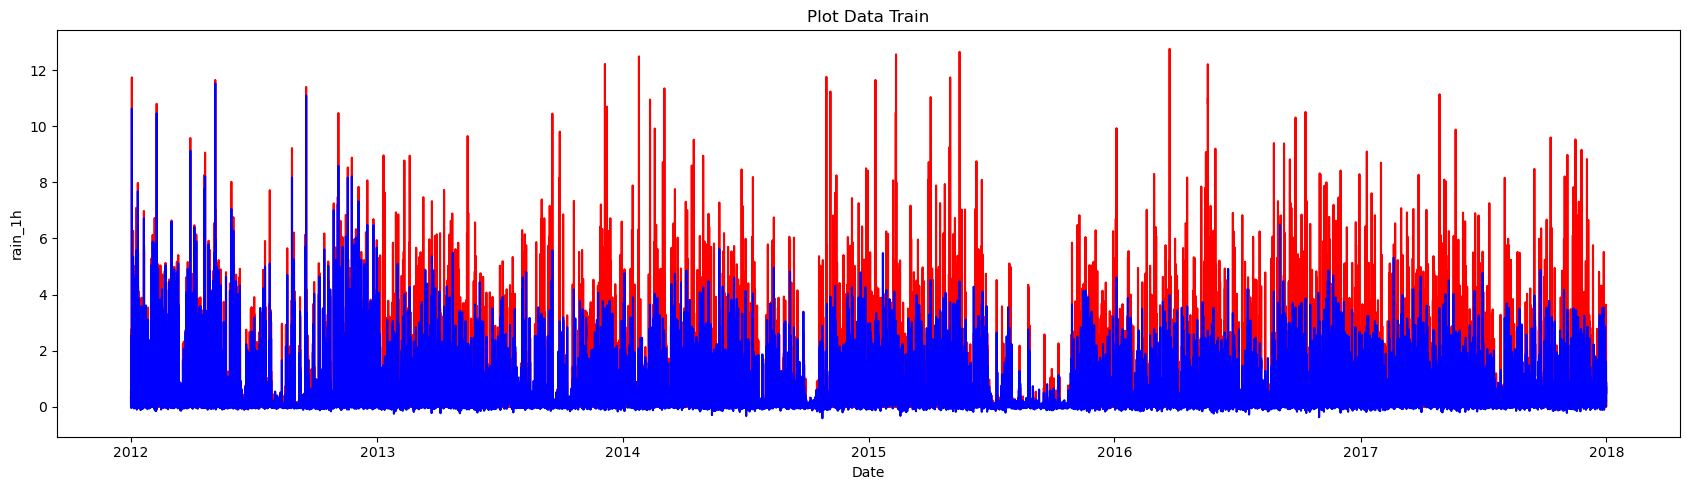

In [25]:
plt.figure(figsize=(17, 5))

# plt.plot(df_train.index, df_train['rain_1h'], 'b')
plt.plot(df_val.index, df_val['rain_1h'], 'r')
plt.plot(df_val.index, y_pred, 'b')
# plt.plot(data.index, data['rain_1h'], 'r')
# plt.plot(data.index, pred_all, 'w')
plt.xlabel('Date')
plt.ylabel('rain_1h')
plt.title('Plot Data Train')

# Tampilkan plot
plt.tight_layout()
# plt.savefig('Plot Data Train vs Data Validasi.png')
plt.show()

In [26]:
pred = modelXG.predict(X_test)
rmse2 = rmse(y_test, pred)
rmse2

0.7048899306434272

In [196]:
X = data.drop(['rain_1h'], axis = 1)
y = data['rain_1h']

In [198]:
model1 = xgb.XGBRegressor(max_depth = 8, learning_rate = 0.01, n_estimators = 10000,colsample_bytree=0.7,
                          reg_alpha = 0.45,num_parallel_tree=3,random_state = 2023,tree_method="gpu_hist")
model1.fit(X, y,
        eval_set=[(X, y)],
        early_stopping_rounds=50,
        verbose=True)

[0]	validation_0-rmse:0.94746
[1]	validation_0-rmse:0.94483
[2]	validation_0-rmse:0.94195
[3]	validation_0-rmse:0.93924
[4]	validation_0-rmse:0.93667
[5]	validation_0-rmse:0.93404
[6]	validation_0-rmse:0.93132
[7]	validation_0-rmse:0.92887
[8]	validation_0-rmse:0.92623
[9]	validation_0-rmse:0.92377
[10]	validation_0-rmse:0.92120
[11]	validation_0-rmse:0.91876
[12]	validation_0-rmse:0.91640
[13]	validation_0-rmse:0.91413
[14]	validation_0-rmse:0.91177
[15]	validation_0-rmse:0.90949
[16]	validation_0-rmse:0.90711
[17]	validation_0-rmse:0.90481
[18]	validation_0-rmse:0.90251
[19]	validation_0-rmse:0.90023
[20]	validation_0-rmse:0.89788
[21]	validation_0-rmse:0.89569
[22]	validation_0-rmse:0.89340
[23]	validation_0-rmse:0.89131
[24]	validation_0-rmse:0.88912
[25]	validation_0-rmse:0.88694
[26]	validation_0-rmse:0.88489
[27]	validation_0-rmse:0.88297
[28]	validation_0-rmse:0.88091
[29]	validation_0-rmse:0.87901
[30]	validation_0-rmse:0.87696
[31]	validation_0-rmse:0.87498
[32]	validation_0-

[260]	validation_0-rmse:0.70155
[261]	validation_0-rmse:0.70122
[262]	validation_0-rmse:0.70094
[263]	validation_0-rmse:0.70061
[264]	validation_0-rmse:0.70029
[265]	validation_0-rmse:0.69997
[266]	validation_0-rmse:0.69966
[267]	validation_0-rmse:0.69937
[268]	validation_0-rmse:0.69899
[269]	validation_0-rmse:0.69866
[270]	validation_0-rmse:0.69835
[271]	validation_0-rmse:0.69801
[272]	validation_0-rmse:0.69764
[273]	validation_0-rmse:0.69729
[274]	validation_0-rmse:0.69691
[275]	validation_0-rmse:0.69655
[276]	validation_0-rmse:0.69617
[277]	validation_0-rmse:0.69587
[278]	validation_0-rmse:0.69548
[279]	validation_0-rmse:0.69520
[280]	validation_0-rmse:0.69482
[281]	validation_0-rmse:0.69452
[282]	validation_0-rmse:0.69414
[283]	validation_0-rmse:0.69377
[284]	validation_0-rmse:0.69344
[285]	validation_0-rmse:0.69313
[286]	validation_0-rmse:0.69279
[287]	validation_0-rmse:0.69244
[288]	validation_0-rmse:0.69213
[289]	validation_0-rmse:0.69183
[290]	validation_0-rmse:0.69152
[291]	va

[517]	validation_0-rmse:0.64566
[518]	validation_0-rmse:0.64552
[519]	validation_0-rmse:0.64541
[520]	validation_0-rmse:0.64526
[521]	validation_0-rmse:0.64509
[522]	validation_0-rmse:0.64496
[523]	validation_0-rmse:0.64479
[524]	validation_0-rmse:0.64466
[525]	validation_0-rmse:0.64448
[526]	validation_0-rmse:0.64435
[527]	validation_0-rmse:0.64422
[528]	validation_0-rmse:0.64406
[529]	validation_0-rmse:0.64389
[530]	validation_0-rmse:0.64374
[531]	validation_0-rmse:0.64360
[532]	validation_0-rmse:0.64347
[533]	validation_0-rmse:0.64333
[534]	validation_0-rmse:0.64320
[535]	validation_0-rmse:0.64307
[536]	validation_0-rmse:0.64294
[537]	validation_0-rmse:0.64282
[538]	validation_0-rmse:0.64269
[539]	validation_0-rmse:0.64256
[540]	validation_0-rmse:0.64245
[541]	validation_0-rmse:0.64236
[542]	validation_0-rmse:0.64220
[543]	validation_0-rmse:0.64207
[544]	validation_0-rmse:0.64193
[545]	validation_0-rmse:0.64178
[546]	validation_0-rmse:0.64164
[547]	validation_0-rmse:0.64151
[548]	va

[774]	validation_0-rmse:0.61473
[775]	validation_0-rmse:0.61461
[776]	validation_0-rmse:0.61452
[777]	validation_0-rmse:0.61443
[778]	validation_0-rmse:0.61432
[779]	validation_0-rmse:0.61419
[780]	validation_0-rmse:0.61411
[781]	validation_0-rmse:0.61400
[782]	validation_0-rmse:0.61389
[783]	validation_0-rmse:0.61377
[784]	validation_0-rmse:0.61369
[785]	validation_0-rmse:0.61358
[786]	validation_0-rmse:0.61348
[787]	validation_0-rmse:0.61337
[788]	validation_0-rmse:0.61328
[789]	validation_0-rmse:0.61319
[790]	validation_0-rmse:0.61311
[791]	validation_0-rmse:0.61302
[792]	validation_0-rmse:0.61291
[793]	validation_0-rmse:0.61281
[794]	validation_0-rmse:0.61270
[795]	validation_0-rmse:0.61257
[796]	validation_0-rmse:0.61247
[797]	validation_0-rmse:0.61239
[798]	validation_0-rmse:0.61228
[799]	validation_0-rmse:0.61219
[800]	validation_0-rmse:0.61208
[801]	validation_0-rmse:0.61198
[802]	validation_0-rmse:0.61189
[803]	validation_0-rmse:0.61177
[804]	validation_0-rmse:0.61170
[805]	va

[1030]	validation_0-rmse:0.59257
[1031]	validation_0-rmse:0.59250
[1032]	validation_0-rmse:0.59241
[1033]	validation_0-rmse:0.59233
[1034]	validation_0-rmse:0.59225
[1035]	validation_0-rmse:0.59215
[1036]	validation_0-rmse:0.59210
[1037]	validation_0-rmse:0.59200
[1038]	validation_0-rmse:0.59195
[1039]	validation_0-rmse:0.59185
[1040]	validation_0-rmse:0.59178
[1041]	validation_0-rmse:0.59171
[1042]	validation_0-rmse:0.59163
[1043]	validation_0-rmse:0.59157
[1044]	validation_0-rmse:0.59152
[1045]	validation_0-rmse:0.59147
[1046]	validation_0-rmse:0.59140
[1047]	validation_0-rmse:0.59130
[1048]	validation_0-rmse:0.59125
[1049]	validation_0-rmse:0.59119
[1050]	validation_0-rmse:0.59111
[1051]	validation_0-rmse:0.59104
[1052]	validation_0-rmse:0.59095
[1053]	validation_0-rmse:0.59090
[1054]	validation_0-rmse:0.59084
[1055]	validation_0-rmse:0.59074
[1056]	validation_0-rmse:0.59070
[1057]	validation_0-rmse:0.59060
[1058]	validation_0-rmse:0.59052
[1059]	validation_0-rmse:0.59043
[1060]	val

[1279]	validation_0-rmse:0.57552
[1280]	validation_0-rmse:0.57548
[1281]	validation_0-rmse:0.57540
[1282]	validation_0-rmse:0.57534
[1283]	validation_0-rmse:0.57528
[1284]	validation_0-rmse:0.57524
[1285]	validation_0-rmse:0.57517
[1286]	validation_0-rmse:0.57510
[1287]	validation_0-rmse:0.57505
[1288]	validation_0-rmse:0.57498
[1289]	validation_0-rmse:0.57494
[1290]	validation_0-rmse:0.57488
[1291]	validation_0-rmse:0.57483
[1292]	validation_0-rmse:0.57474
[1293]	validation_0-rmse:0.57468
[1294]	validation_0-rmse:0.57460
[1295]	validation_0-rmse:0.57455
[1296]	validation_0-rmse:0.57447
[1297]	validation_0-rmse:0.57435
[1298]	validation_0-rmse:0.57430
[1299]	validation_0-rmse:0.57425
[1300]	validation_0-rmse:0.57418
[1301]	validation_0-rmse:0.57410
[1302]	validation_0-rmse:0.57403
[1303]	validation_0-rmse:0.57396
[1304]	validation_0-rmse:0.57390
[1305]	validation_0-rmse:0.57380
[1306]	validation_0-rmse:0.57373
[1307]	validation_0-rmse:0.57368
[1308]	validation_0-rmse:0.57360
[1309]	val

[1528]	validation_0-rmse:0.56016
[1529]	validation_0-rmse:0.56008
[1530]	validation_0-rmse:0.56002
[1531]	validation_0-rmse:0.55997
[1532]	validation_0-rmse:0.55993
[1533]	validation_0-rmse:0.55989
[1534]	validation_0-rmse:0.55980
[1535]	validation_0-rmse:0.55974
[1536]	validation_0-rmse:0.55969
[1537]	validation_0-rmse:0.55962
[1538]	validation_0-rmse:0.55956
[1539]	validation_0-rmse:0.55951
[1540]	validation_0-rmse:0.55946
[1541]	validation_0-rmse:0.55942
[1542]	validation_0-rmse:0.55937
[1543]	validation_0-rmse:0.55929
[1544]	validation_0-rmse:0.55924
[1545]	validation_0-rmse:0.55920
[1546]	validation_0-rmse:0.55916
[1547]	validation_0-rmse:0.55910
[1548]	validation_0-rmse:0.55903
[1549]	validation_0-rmse:0.55895
[1550]	validation_0-rmse:0.55892
[1551]	validation_0-rmse:0.55887
[1552]	validation_0-rmse:0.55880
[1553]	validation_0-rmse:0.55875
[1554]	validation_0-rmse:0.55867
[1555]	validation_0-rmse:0.55862
[1556]	validation_0-rmse:0.55859
[1557]	validation_0-rmse:0.55854
[1558]	val

[1777]	validation_0-rmse:0.54666
[1778]	validation_0-rmse:0.54661
[1779]	validation_0-rmse:0.54656
[1780]	validation_0-rmse:0.54652
[1781]	validation_0-rmse:0.54643
[1782]	validation_0-rmse:0.54638
[1783]	validation_0-rmse:0.54632
[1784]	validation_0-rmse:0.54626
[1785]	validation_0-rmse:0.54621
[1786]	validation_0-rmse:0.54614
[1787]	validation_0-rmse:0.54610
[1788]	validation_0-rmse:0.54601
[1789]	validation_0-rmse:0.54595
[1790]	validation_0-rmse:0.54589
[1791]	validation_0-rmse:0.54581
[1792]	validation_0-rmse:0.54575
[1793]	validation_0-rmse:0.54572
[1794]	validation_0-rmse:0.54567
[1795]	validation_0-rmse:0.54563
[1796]	validation_0-rmse:0.54556
[1797]	validation_0-rmse:0.54552
[1798]	validation_0-rmse:0.54549
[1799]	validation_0-rmse:0.54545
[1800]	validation_0-rmse:0.54537
[1801]	validation_0-rmse:0.54531
[1802]	validation_0-rmse:0.54527
[1803]	validation_0-rmse:0.54519
[1804]	validation_0-rmse:0.54514
[1805]	validation_0-rmse:0.54508
[1806]	validation_0-rmse:0.54502
[1807]	val

[2026]	validation_0-rmse:0.53426
[2027]	validation_0-rmse:0.53421
[2028]	validation_0-rmse:0.53416
[2029]	validation_0-rmse:0.53412
[2030]	validation_0-rmse:0.53406
[2031]	validation_0-rmse:0.53401
[2032]	validation_0-rmse:0.53396
[2033]	validation_0-rmse:0.53391
[2034]	validation_0-rmse:0.53385
[2035]	validation_0-rmse:0.53382
[2036]	validation_0-rmse:0.53379
[2037]	validation_0-rmse:0.53373
[2038]	validation_0-rmse:0.53369
[2039]	validation_0-rmse:0.53364
[2040]	validation_0-rmse:0.53358
[2041]	validation_0-rmse:0.53355
[2042]	validation_0-rmse:0.53348
[2043]	validation_0-rmse:0.53343
[2044]	validation_0-rmse:0.53339
[2045]	validation_0-rmse:0.53336
[2046]	validation_0-rmse:0.53329
[2047]	validation_0-rmse:0.53325
[2048]	validation_0-rmse:0.53320
[2049]	validation_0-rmse:0.53318
[2050]	validation_0-rmse:0.53314
[2051]	validation_0-rmse:0.53309
[2052]	validation_0-rmse:0.53303
[2053]	validation_0-rmse:0.53299
[2054]	validation_0-rmse:0.53295
[2055]	validation_0-rmse:0.53289
[2056]	val

[2275]	validation_0-rmse:0.52259
[2276]	validation_0-rmse:0.52254
[2277]	validation_0-rmse:0.52250
[2278]	validation_0-rmse:0.52247
[2279]	validation_0-rmse:0.52243
[2280]	validation_0-rmse:0.52236
[2281]	validation_0-rmse:0.52231
[2282]	validation_0-rmse:0.52227
[2283]	validation_0-rmse:0.52224
[2284]	validation_0-rmse:0.52221
[2285]	validation_0-rmse:0.52218
[2286]	validation_0-rmse:0.52214
[2287]	validation_0-rmse:0.52211
[2288]	validation_0-rmse:0.52206
[2289]	validation_0-rmse:0.52201
[2290]	validation_0-rmse:0.52197
[2291]	validation_0-rmse:0.52193
[2292]	validation_0-rmse:0.52188
[2293]	validation_0-rmse:0.52183
[2294]	validation_0-rmse:0.52180
[2295]	validation_0-rmse:0.52176
[2296]	validation_0-rmse:0.52171
[2297]	validation_0-rmse:0.52166
[2298]	validation_0-rmse:0.52162
[2299]	validation_0-rmse:0.52159
[2300]	validation_0-rmse:0.52152
[2301]	validation_0-rmse:0.52148
[2302]	validation_0-rmse:0.52144
[2303]	validation_0-rmse:0.52138
[2304]	validation_0-rmse:0.52133
[2305]	val

[2524]	validation_0-rmse:0.51144
[2525]	validation_0-rmse:0.51138
[2526]	validation_0-rmse:0.51134
[2527]	validation_0-rmse:0.51131
[2528]	validation_0-rmse:0.51125
[2529]	validation_0-rmse:0.51123
[2530]	validation_0-rmse:0.51117
[2531]	validation_0-rmse:0.51111
[2532]	validation_0-rmse:0.51104
[2533]	validation_0-rmse:0.51102
[2534]	validation_0-rmse:0.51097
[2535]	validation_0-rmse:0.51091
[2536]	validation_0-rmse:0.51087
[2537]	validation_0-rmse:0.51081
[2538]	validation_0-rmse:0.51075
[2539]	validation_0-rmse:0.51071
[2540]	validation_0-rmse:0.51066
[2541]	validation_0-rmse:0.51060
[2542]	validation_0-rmse:0.51054
[2543]	validation_0-rmse:0.51052
[2544]	validation_0-rmse:0.51049
[2545]	validation_0-rmse:0.51044
[2546]	validation_0-rmse:0.51039
[2547]	validation_0-rmse:0.51034
[2548]	validation_0-rmse:0.51031
[2549]	validation_0-rmse:0.51026
[2550]	validation_0-rmse:0.51024
[2551]	validation_0-rmse:0.51022
[2552]	validation_0-rmse:0.51017
[2553]	validation_0-rmse:0.51012
[2554]	val

[2773]	validation_0-rmse:0.50078
[2774]	validation_0-rmse:0.50073
[2775]	validation_0-rmse:0.50067
[2776]	validation_0-rmse:0.50064
[2777]	validation_0-rmse:0.50062
[2778]	validation_0-rmse:0.50059
[2779]	validation_0-rmse:0.50054
[2780]	validation_0-rmse:0.50050
[2781]	validation_0-rmse:0.50045
[2782]	validation_0-rmse:0.50042
[2783]	validation_0-rmse:0.50037
[2784]	validation_0-rmse:0.50031
[2785]	validation_0-rmse:0.50027
[2786]	validation_0-rmse:0.50024
[2787]	validation_0-rmse:0.50019
[2788]	validation_0-rmse:0.50016
[2789]	validation_0-rmse:0.50011
[2790]	validation_0-rmse:0.50007
[2791]	validation_0-rmse:0.50003
[2792]	validation_0-rmse:0.49999
[2793]	validation_0-rmse:0.49995
[2794]	validation_0-rmse:0.49992
[2795]	validation_0-rmse:0.49989
[2796]	validation_0-rmse:0.49983
[2797]	validation_0-rmse:0.49980
[2798]	validation_0-rmse:0.49977
[2799]	validation_0-rmse:0.49974
[2800]	validation_0-rmse:0.49969
[2801]	validation_0-rmse:0.49964
[2802]	validation_0-rmse:0.49959
[2803]	val

[3022]	validation_0-rmse:0.49088
[3023]	validation_0-rmse:0.49085
[3024]	validation_0-rmse:0.49082
[3025]	validation_0-rmse:0.49080
[3026]	validation_0-rmse:0.49076
[3027]	validation_0-rmse:0.49074
[3028]	validation_0-rmse:0.49071
[3029]	validation_0-rmse:0.49067
[3030]	validation_0-rmse:0.49064
[3031]	validation_0-rmse:0.49058
[3032]	validation_0-rmse:0.49055
[3033]	validation_0-rmse:0.49052
[3034]	validation_0-rmse:0.49047
[3035]	validation_0-rmse:0.49042
[3036]	validation_0-rmse:0.49038
[3037]	validation_0-rmse:0.49034
[3038]	validation_0-rmse:0.49031
[3039]	validation_0-rmse:0.49028
[3040]	validation_0-rmse:0.49023
[3041]	validation_0-rmse:0.49020
[3042]	validation_0-rmse:0.49017
[3043]	validation_0-rmse:0.49013
[3044]	validation_0-rmse:0.49008
[3045]	validation_0-rmse:0.49007
[3046]	validation_0-rmse:0.49002
[3047]	validation_0-rmse:0.48997
[3048]	validation_0-rmse:0.48995
[3049]	validation_0-rmse:0.48991
[3050]	validation_0-rmse:0.48985
[3051]	validation_0-rmse:0.48982
[3052]	val

[3271]	validation_0-rmse:0.48141
[3272]	validation_0-rmse:0.48138
[3273]	validation_0-rmse:0.48135
[3274]	validation_0-rmse:0.48129
[3275]	validation_0-rmse:0.48127
[3276]	validation_0-rmse:0.48124
[3277]	validation_0-rmse:0.48120
[3278]	validation_0-rmse:0.48115
[3279]	validation_0-rmse:0.48112
[3280]	validation_0-rmse:0.48107
[3281]	validation_0-rmse:0.48102
[3282]	validation_0-rmse:0.48097
[3283]	validation_0-rmse:0.48095
[3284]	validation_0-rmse:0.48091
[3285]	validation_0-rmse:0.48087
[3286]	validation_0-rmse:0.48081
[3287]	validation_0-rmse:0.48077
[3288]	validation_0-rmse:0.48072
[3289]	validation_0-rmse:0.48069
[3290]	validation_0-rmse:0.48066
[3291]	validation_0-rmse:0.48061
[3292]	validation_0-rmse:0.48057
[3293]	validation_0-rmse:0.48052
[3294]	validation_0-rmse:0.48047
[3295]	validation_0-rmse:0.48045
[3296]	validation_0-rmse:0.48042
[3297]	validation_0-rmse:0.48038
[3298]	validation_0-rmse:0.48035
[3299]	validation_0-rmse:0.48032
[3300]	validation_0-rmse:0.48028
[3301]	val

[3520]	validation_0-rmse:0.47243
[3521]	validation_0-rmse:0.47240
[3522]	validation_0-rmse:0.47235
[3523]	validation_0-rmse:0.47233
[3524]	validation_0-rmse:0.47229
[3525]	validation_0-rmse:0.47225
[3526]	validation_0-rmse:0.47222
[3527]	validation_0-rmse:0.47219
[3528]	validation_0-rmse:0.47216
[3529]	validation_0-rmse:0.47213
[3530]	validation_0-rmse:0.47212
[3531]	validation_0-rmse:0.47208
[3532]	validation_0-rmse:0.47205
[3533]	validation_0-rmse:0.47199
[3534]	validation_0-rmse:0.47196
[3535]	validation_0-rmse:0.47192
[3536]	validation_0-rmse:0.47189
[3537]	validation_0-rmse:0.47186
[3538]	validation_0-rmse:0.47181
[3539]	validation_0-rmse:0.47178
[3540]	validation_0-rmse:0.47173
[3541]	validation_0-rmse:0.47169
[3542]	validation_0-rmse:0.47165
[3543]	validation_0-rmse:0.47162
[3544]	validation_0-rmse:0.47160
[3545]	validation_0-rmse:0.47155
[3546]	validation_0-rmse:0.47152
[3547]	validation_0-rmse:0.47148
[3548]	validation_0-rmse:0.47145
[3549]	validation_0-rmse:0.47141
[3550]	val

[3769]	validation_0-rmse:0.46384
[3770]	validation_0-rmse:0.46381
[3771]	validation_0-rmse:0.46379
[3772]	validation_0-rmse:0.46375
[3773]	validation_0-rmse:0.46374
[3774]	validation_0-rmse:0.46371
[3775]	validation_0-rmse:0.46366
[3776]	validation_0-rmse:0.46363
[3777]	validation_0-rmse:0.46358
[3778]	validation_0-rmse:0.46355
[3779]	validation_0-rmse:0.46351
[3780]	validation_0-rmse:0.46347
[3781]	validation_0-rmse:0.46344
[3782]	validation_0-rmse:0.46341
[3783]	validation_0-rmse:0.46337
[3784]	validation_0-rmse:0.46334
[3785]	validation_0-rmse:0.46331
[3786]	validation_0-rmse:0.46326
[3787]	validation_0-rmse:0.46323
[3788]	validation_0-rmse:0.46318
[3789]	validation_0-rmse:0.46315
[3790]	validation_0-rmse:0.46311
[3791]	validation_0-rmse:0.46308
[3792]	validation_0-rmse:0.46306
[3793]	validation_0-rmse:0.46302
[3794]	validation_0-rmse:0.46299
[3795]	validation_0-rmse:0.46296
[3796]	validation_0-rmse:0.46293
[3797]	validation_0-rmse:0.46289
[3798]	validation_0-rmse:0.46287
[3799]	val

[4018]	validation_0-rmse:0.45527
[4019]	validation_0-rmse:0.45522
[4020]	validation_0-rmse:0.45519
[4021]	validation_0-rmse:0.45515
[4022]	validation_0-rmse:0.45511
[4023]	validation_0-rmse:0.45509
[4024]	validation_0-rmse:0.45506
[4025]	validation_0-rmse:0.45503
[4026]	validation_0-rmse:0.45498
[4027]	validation_0-rmse:0.45494
[4028]	validation_0-rmse:0.45493
[4029]	validation_0-rmse:0.45491
[4030]	validation_0-rmse:0.45485
[4031]	validation_0-rmse:0.45483
[4032]	validation_0-rmse:0.45481
[4033]	validation_0-rmse:0.45478
[4034]	validation_0-rmse:0.45475
[4035]	validation_0-rmse:0.45473
[4036]	validation_0-rmse:0.45470
[4037]	validation_0-rmse:0.45468
[4038]	validation_0-rmse:0.45464
[4039]	validation_0-rmse:0.45462
[4040]	validation_0-rmse:0.45459
[4041]	validation_0-rmse:0.45456
[4042]	validation_0-rmse:0.45453
[4043]	validation_0-rmse:0.45449
[4044]	validation_0-rmse:0.45446
[4045]	validation_0-rmse:0.45443
[4046]	validation_0-rmse:0.45440
[4047]	validation_0-rmse:0.45437
[4048]	val

[4267]	validation_0-rmse:0.44731
[4268]	validation_0-rmse:0.44728
[4269]	validation_0-rmse:0.44725
[4270]	validation_0-rmse:0.44721
[4271]	validation_0-rmse:0.44718
[4272]	validation_0-rmse:0.44714
[4273]	validation_0-rmse:0.44709
[4274]	validation_0-rmse:0.44707
[4275]	validation_0-rmse:0.44705
[4276]	validation_0-rmse:0.44702
[4277]	validation_0-rmse:0.44697
[4278]	validation_0-rmse:0.44693
[4279]	validation_0-rmse:0.44689
[4280]	validation_0-rmse:0.44685
[4281]	validation_0-rmse:0.44683
[4282]	validation_0-rmse:0.44678
[4283]	validation_0-rmse:0.44675
[4284]	validation_0-rmse:0.44669
[4285]	validation_0-rmse:0.44667
[4286]	validation_0-rmse:0.44663
[4287]	validation_0-rmse:0.44661
[4288]	validation_0-rmse:0.44659
[4289]	validation_0-rmse:0.44656
[4290]	validation_0-rmse:0.44654
[4291]	validation_0-rmse:0.44651
[4292]	validation_0-rmse:0.44648
[4293]	validation_0-rmse:0.44646
[4294]	validation_0-rmse:0.44642
[4295]	validation_0-rmse:0.44639
[4296]	validation_0-rmse:0.44637
[4297]	val

[4516]	validation_0-rmse:0.43977
[4517]	validation_0-rmse:0.43972
[4518]	validation_0-rmse:0.43969
[4519]	validation_0-rmse:0.43967
[4520]	validation_0-rmse:0.43964
[4521]	validation_0-rmse:0.43962
[4522]	validation_0-rmse:0.43957
[4523]	validation_0-rmse:0.43955
[4524]	validation_0-rmse:0.43952
[4525]	validation_0-rmse:0.43949
[4526]	validation_0-rmse:0.43946
[4527]	validation_0-rmse:0.43940
[4528]	validation_0-rmse:0.43938
[4529]	validation_0-rmse:0.43934
[4530]	validation_0-rmse:0.43932
[4531]	validation_0-rmse:0.43928
[4532]	validation_0-rmse:0.43924
[4533]	validation_0-rmse:0.43921
[4534]	validation_0-rmse:0.43918
[4535]	validation_0-rmse:0.43915
[4536]	validation_0-rmse:0.43912
[4537]	validation_0-rmse:0.43909
[4538]	validation_0-rmse:0.43905
[4539]	validation_0-rmse:0.43902
[4540]	validation_0-rmse:0.43898
[4541]	validation_0-rmse:0.43895
[4542]	validation_0-rmse:0.43892
[4543]	validation_0-rmse:0.43887
[4544]	validation_0-rmse:0.43883
[4545]	validation_0-rmse:0.43881
[4546]	val

[4765]	validation_0-rmse:0.43199
[4766]	validation_0-rmse:0.43193
[4767]	validation_0-rmse:0.43190
[4768]	validation_0-rmse:0.43186
[4769]	validation_0-rmse:0.43184
[4770]	validation_0-rmse:0.43180
[4771]	validation_0-rmse:0.43176
[4772]	validation_0-rmse:0.43173
[4773]	validation_0-rmse:0.43170
[4774]	validation_0-rmse:0.43168
[4775]	validation_0-rmse:0.43166
[4776]	validation_0-rmse:0.43162
[4777]	validation_0-rmse:0.43159
[4778]	validation_0-rmse:0.43156
[4779]	validation_0-rmse:0.43153
[4780]	validation_0-rmse:0.43149
[4781]	validation_0-rmse:0.43146
[4782]	validation_0-rmse:0.43143
[4783]	validation_0-rmse:0.43140
[4784]	validation_0-rmse:0.43137
[4785]	validation_0-rmse:0.43134
[4786]	validation_0-rmse:0.43131
[4787]	validation_0-rmse:0.43129
[4788]	validation_0-rmse:0.43126
[4789]	validation_0-rmse:0.43124
[4790]	validation_0-rmse:0.43120
[4791]	validation_0-rmse:0.43118
[4792]	validation_0-rmse:0.43114
[4793]	validation_0-rmse:0.43110
[4794]	validation_0-rmse:0.43107
[4795]	val

[5014]	validation_0-rmse:0.42475
[5015]	validation_0-rmse:0.42472
[5016]	validation_0-rmse:0.42468
[5017]	validation_0-rmse:0.42466
[5018]	validation_0-rmse:0.42465
[5019]	validation_0-rmse:0.42462
[5020]	validation_0-rmse:0.42459
[5021]	validation_0-rmse:0.42456
[5022]	validation_0-rmse:0.42453
[5023]	validation_0-rmse:0.42451
[5024]	validation_0-rmse:0.42448
[5025]	validation_0-rmse:0.42445
[5026]	validation_0-rmse:0.42442
[5027]	validation_0-rmse:0.42441
[5028]	validation_0-rmse:0.42438
[5029]	validation_0-rmse:0.42435
[5030]	validation_0-rmse:0.42432
[5031]	validation_0-rmse:0.42428
[5032]	validation_0-rmse:0.42427
[5033]	validation_0-rmse:0.42424
[5034]	validation_0-rmse:0.42420
[5035]	validation_0-rmse:0.42417
[5036]	validation_0-rmse:0.42415
[5037]	validation_0-rmse:0.42411
[5038]	validation_0-rmse:0.42407
[5039]	validation_0-rmse:0.42405
[5040]	validation_0-rmse:0.42402
[5041]	validation_0-rmse:0.42398
[5042]	validation_0-rmse:0.42396
[5043]	validation_0-rmse:0.42393
[5044]	val

[5263]	validation_0-rmse:0.41757
[5264]	validation_0-rmse:0.41754
[5265]	validation_0-rmse:0.41752
[5266]	validation_0-rmse:0.41747
[5267]	validation_0-rmse:0.41744
[5268]	validation_0-rmse:0.41742
[5269]	validation_0-rmse:0.41738
[5270]	validation_0-rmse:0.41736
[5271]	validation_0-rmse:0.41733
[5272]	validation_0-rmse:0.41732
[5273]	validation_0-rmse:0.41729
[5274]	validation_0-rmse:0.41727
[5275]	validation_0-rmse:0.41724
[5276]	validation_0-rmse:0.41720
[5277]	validation_0-rmse:0.41716
[5278]	validation_0-rmse:0.41714
[5279]	validation_0-rmse:0.41711
[5280]	validation_0-rmse:0.41709
[5281]	validation_0-rmse:0.41706
[5282]	validation_0-rmse:0.41704
[5283]	validation_0-rmse:0.41702
[5284]	validation_0-rmse:0.41699
[5285]	validation_0-rmse:0.41696
[5286]	validation_0-rmse:0.41694
[5287]	validation_0-rmse:0.41692
[5288]	validation_0-rmse:0.41688
[5289]	validation_0-rmse:0.41686
[5290]	validation_0-rmse:0.41682
[5291]	validation_0-rmse:0.41680
[5292]	validation_0-rmse:0.41678
[5293]	val

[5512]	validation_0-rmse:0.41074
[5513]	validation_0-rmse:0.41073
[5514]	validation_0-rmse:0.41071
[5515]	validation_0-rmse:0.41068
[5516]	validation_0-rmse:0.41065
[5517]	validation_0-rmse:0.41061
[5518]	validation_0-rmse:0.41058
[5519]	validation_0-rmse:0.41056
[5520]	validation_0-rmse:0.41054
[5521]	validation_0-rmse:0.41050
[5522]	validation_0-rmse:0.41048
[5523]	validation_0-rmse:0.41045
[5524]	validation_0-rmse:0.41042
[5525]	validation_0-rmse:0.41040
[5526]	validation_0-rmse:0.41039
[5527]	validation_0-rmse:0.41037
[5528]	validation_0-rmse:0.41035
[5529]	validation_0-rmse:0.41030
[5530]	validation_0-rmse:0.41027
[5531]	validation_0-rmse:0.41025
[5532]	validation_0-rmse:0.41023
[5533]	validation_0-rmse:0.41019
[5534]	validation_0-rmse:0.41015
[5535]	validation_0-rmse:0.41011
[5536]	validation_0-rmse:0.41010
[5537]	validation_0-rmse:0.41007
[5538]	validation_0-rmse:0.41003
[5539]	validation_0-rmse:0.40999
[5540]	validation_0-rmse:0.40996
[5541]	validation_0-rmse:0.40994
[5542]	val

[5761]	validation_0-rmse:0.40390
[5762]	validation_0-rmse:0.40387
[5763]	validation_0-rmse:0.40386
[5764]	validation_0-rmse:0.40383
[5765]	validation_0-rmse:0.40381
[5766]	validation_0-rmse:0.40379
[5767]	validation_0-rmse:0.40375
[5768]	validation_0-rmse:0.40373
[5769]	validation_0-rmse:0.40372
[5770]	validation_0-rmse:0.40368
[5771]	validation_0-rmse:0.40364
[5772]	validation_0-rmse:0.40359
[5773]	validation_0-rmse:0.40357
[5774]	validation_0-rmse:0.40355
[5775]	validation_0-rmse:0.40352
[5776]	validation_0-rmse:0.40348
[5777]	validation_0-rmse:0.40347
[5778]	validation_0-rmse:0.40344
[5779]	validation_0-rmse:0.40340
[5780]	validation_0-rmse:0.40337
[5781]	validation_0-rmse:0.40334
[5782]	validation_0-rmse:0.40332
[5783]	validation_0-rmse:0.40331
[5784]	validation_0-rmse:0.40328
[5785]	validation_0-rmse:0.40327
[5786]	validation_0-rmse:0.40324
[5787]	validation_0-rmse:0.40321
[5788]	validation_0-rmse:0.40318
[5789]	validation_0-rmse:0.40316
[5790]	validation_0-rmse:0.40313
[5791]	val

[6010]	validation_0-rmse:0.39720
[6011]	validation_0-rmse:0.39717
[6012]	validation_0-rmse:0.39714
[6013]	validation_0-rmse:0.39710
[6014]	validation_0-rmse:0.39707
[6015]	validation_0-rmse:0.39705
[6016]	validation_0-rmse:0.39704
[6017]	validation_0-rmse:0.39702
[6018]	validation_0-rmse:0.39700
[6019]	validation_0-rmse:0.39698
[6020]	validation_0-rmse:0.39698
[6021]	validation_0-rmse:0.39695
[6022]	validation_0-rmse:0.39692
[6023]	validation_0-rmse:0.39690
[6024]	validation_0-rmse:0.39686
[6025]	validation_0-rmse:0.39682
[6026]	validation_0-rmse:0.39681
[6027]	validation_0-rmse:0.39676
[6028]	validation_0-rmse:0.39674
[6029]	validation_0-rmse:0.39673
[6030]	validation_0-rmse:0.39670
[6031]	validation_0-rmse:0.39667
[6032]	validation_0-rmse:0.39663
[6033]	validation_0-rmse:0.39658
[6034]	validation_0-rmse:0.39656
[6035]	validation_0-rmse:0.39653
[6036]	validation_0-rmse:0.39650
[6037]	validation_0-rmse:0.39648
[6038]	validation_0-rmse:0.39645
[6039]	validation_0-rmse:0.39643
[6040]	val

[6259]	validation_0-rmse:0.39068
[6260]	validation_0-rmse:0.39066
[6261]	validation_0-rmse:0.39063
[6262]	validation_0-rmse:0.39062
[6263]	validation_0-rmse:0.39060
[6264]	validation_0-rmse:0.39058
[6265]	validation_0-rmse:0.39056
[6266]	validation_0-rmse:0.39051
[6267]	validation_0-rmse:0.39048
[6268]	validation_0-rmse:0.39045
[6269]	validation_0-rmse:0.39043
[6270]	validation_0-rmse:0.39041
[6271]	validation_0-rmse:0.39038
[6272]	validation_0-rmse:0.39036
[6273]	validation_0-rmse:0.39033
[6274]	validation_0-rmse:0.39029
[6275]	validation_0-rmse:0.39027
[6276]	validation_0-rmse:0.39024
[6277]	validation_0-rmse:0.39023
[6278]	validation_0-rmse:0.39020
[6279]	validation_0-rmse:0.39018
[6280]	validation_0-rmse:0.39016
[6281]	validation_0-rmse:0.39013
[6282]	validation_0-rmse:0.39010
[6283]	validation_0-rmse:0.39007
[6284]	validation_0-rmse:0.39004
[6285]	validation_0-rmse:0.39003
[6286]	validation_0-rmse:0.39000
[6287]	validation_0-rmse:0.38997
[6288]	validation_0-rmse:0.38995
[6289]	val

[6508]	validation_0-rmse:0.38502
[6509]	validation_0-rmse:0.38499
[6510]	validation_0-rmse:0.38498
[6511]	validation_0-rmse:0.38496
[6512]	validation_0-rmse:0.38494
[6513]	validation_0-rmse:0.38491
[6514]	validation_0-rmse:0.38488
[6515]	validation_0-rmse:0.38486
[6516]	validation_0-rmse:0.38483
[6517]	validation_0-rmse:0.38482
[6518]	validation_0-rmse:0.38479
[6519]	validation_0-rmse:0.38477
[6520]	validation_0-rmse:0.38476
[6521]	validation_0-rmse:0.38474
[6522]	validation_0-rmse:0.38472
[6523]	validation_0-rmse:0.38470
[6524]	validation_0-rmse:0.38468
[6525]	validation_0-rmse:0.38466
[6526]	validation_0-rmse:0.38465
[6527]	validation_0-rmse:0.38463
[6528]	validation_0-rmse:0.38461
[6529]	validation_0-rmse:0.38459
[6530]	validation_0-rmse:0.38457
[6531]	validation_0-rmse:0.38456
[6532]	validation_0-rmse:0.38453
[6533]	validation_0-rmse:0.38449
[6534]	validation_0-rmse:0.38447
[6535]	validation_0-rmse:0.38446
[6536]	validation_0-rmse:0.38445
[6537]	validation_0-rmse:0.38441
[6538]	val

[6757]	validation_0-rmse:0.37921
[6758]	validation_0-rmse:0.37920
[6759]	validation_0-rmse:0.37917
[6760]	validation_0-rmse:0.37916
[6761]	validation_0-rmse:0.37914
[6762]	validation_0-rmse:0.37912
[6763]	validation_0-rmse:0.37911
[6764]	validation_0-rmse:0.37908
[6765]	validation_0-rmse:0.37905
[6766]	validation_0-rmse:0.37904
[6767]	validation_0-rmse:0.37901
[6768]	validation_0-rmse:0.37898
[6769]	validation_0-rmse:0.37895
[6770]	validation_0-rmse:0.37893
[6771]	validation_0-rmse:0.37891
[6772]	validation_0-rmse:0.37890
[6773]	validation_0-rmse:0.37889
[6774]	validation_0-rmse:0.37888
[6775]	validation_0-rmse:0.37885
[6776]	validation_0-rmse:0.37882
[6777]	validation_0-rmse:0.37879
[6778]	validation_0-rmse:0.37878
[6779]	validation_0-rmse:0.37876
[6780]	validation_0-rmse:0.37873
[6781]	validation_0-rmse:0.37869
[6782]	validation_0-rmse:0.37867
[6783]	validation_0-rmse:0.37864
[6784]	validation_0-rmse:0.37862
[6785]	validation_0-rmse:0.37858
[6786]	validation_0-rmse:0.37855
[6787]	val

[7006]	validation_0-rmse:0.37356
[7007]	validation_0-rmse:0.37355
[7008]	validation_0-rmse:0.37353
[7009]	validation_0-rmse:0.37350
[7010]	validation_0-rmse:0.37349
[7011]	validation_0-rmse:0.37347
[7012]	validation_0-rmse:0.37345
[7013]	validation_0-rmse:0.37343
[7014]	validation_0-rmse:0.37340
[7015]	validation_0-rmse:0.37336
[7016]	validation_0-rmse:0.37333
[7017]	validation_0-rmse:0.37331
[7018]	validation_0-rmse:0.37329
[7019]	validation_0-rmse:0.37326
[7020]	validation_0-rmse:0.37324
[7021]	validation_0-rmse:0.37322
[7022]	validation_0-rmse:0.37320
[7023]	validation_0-rmse:0.37319
[7024]	validation_0-rmse:0.37317
[7025]	validation_0-rmse:0.37316
[7026]	validation_0-rmse:0.37313
[7027]	validation_0-rmse:0.37311
[7028]	validation_0-rmse:0.37307
[7029]	validation_0-rmse:0.37306
[7030]	validation_0-rmse:0.37305
[7031]	validation_0-rmse:0.37303
[7032]	validation_0-rmse:0.37300
[7033]	validation_0-rmse:0.37298
[7034]	validation_0-rmse:0.37296
[7035]	validation_0-rmse:0.37292
[7036]	val

[7255]	validation_0-rmse:0.36753
[7256]	validation_0-rmse:0.36751
[7257]	validation_0-rmse:0.36749
[7258]	validation_0-rmse:0.36747
[7259]	validation_0-rmse:0.36745
[7260]	validation_0-rmse:0.36743
[7261]	validation_0-rmse:0.36740
[7262]	validation_0-rmse:0.36738
[7263]	validation_0-rmse:0.36736
[7264]	validation_0-rmse:0.36735
[7265]	validation_0-rmse:0.36733
[7266]	validation_0-rmse:0.36731
[7267]	validation_0-rmse:0.36728
[7268]	validation_0-rmse:0.36725
[7269]	validation_0-rmse:0.36724
[7270]	validation_0-rmse:0.36721
[7271]	validation_0-rmse:0.36718
[7272]	validation_0-rmse:0.36715
[7273]	validation_0-rmse:0.36714
[7274]	validation_0-rmse:0.36713
[7275]	validation_0-rmse:0.36711
[7276]	validation_0-rmse:0.36709
[7277]	validation_0-rmse:0.36707
[7278]	validation_0-rmse:0.36705
[7279]	validation_0-rmse:0.36702
[7280]	validation_0-rmse:0.36700
[7281]	validation_0-rmse:0.36698
[7282]	validation_0-rmse:0.36695
[7283]	validation_0-rmse:0.36694
[7284]	validation_0-rmse:0.36693
[7285]	val

[7504]	validation_0-rmse:0.36177
[7505]	validation_0-rmse:0.36175
[7506]	validation_0-rmse:0.36172
[7507]	validation_0-rmse:0.36168
[7508]	validation_0-rmse:0.36165
[7509]	validation_0-rmse:0.36162
[7510]	validation_0-rmse:0.36161
[7511]	validation_0-rmse:0.36159
[7512]	validation_0-rmse:0.36156
[7513]	validation_0-rmse:0.36152
[7514]	validation_0-rmse:0.36148
[7515]	validation_0-rmse:0.36145
[7516]	validation_0-rmse:0.36142
[7517]	validation_0-rmse:0.36141
[7518]	validation_0-rmse:0.36139
[7519]	validation_0-rmse:0.36137
[7520]	validation_0-rmse:0.36136
[7521]	validation_0-rmse:0.36133
[7522]	validation_0-rmse:0.36131
[7523]	validation_0-rmse:0.36129
[7524]	validation_0-rmse:0.36126
[7525]	validation_0-rmse:0.36124
[7526]	validation_0-rmse:0.36123
[7527]	validation_0-rmse:0.36120
[7528]	validation_0-rmse:0.36117
[7529]	validation_0-rmse:0.36114
[7530]	validation_0-rmse:0.36112
[7531]	validation_0-rmse:0.36111
[7532]	validation_0-rmse:0.36110
[7533]	validation_0-rmse:0.36108
[7534]	val

[7753]	validation_0-rmse:0.35638
[7754]	validation_0-rmse:0.35637
[7755]	validation_0-rmse:0.35634
[7756]	validation_0-rmse:0.35632
[7757]	validation_0-rmse:0.35629
[7758]	validation_0-rmse:0.35628
[7759]	validation_0-rmse:0.35626
[7760]	validation_0-rmse:0.35624
[7761]	validation_0-rmse:0.35621
[7762]	validation_0-rmse:0.35618
[7763]	validation_0-rmse:0.35615
[7764]	validation_0-rmse:0.35613
[7765]	validation_0-rmse:0.35611
[7766]	validation_0-rmse:0.35609
[7767]	validation_0-rmse:0.35608
[7768]	validation_0-rmse:0.35606
[7769]	validation_0-rmse:0.35605
[7770]	validation_0-rmse:0.35603
[7771]	validation_0-rmse:0.35600
[7772]	validation_0-rmse:0.35598
[7773]	validation_0-rmse:0.35595
[7774]	validation_0-rmse:0.35594
[7775]	validation_0-rmse:0.35592
[7776]	validation_0-rmse:0.35590
[7777]	validation_0-rmse:0.35588
[7778]	validation_0-rmse:0.35585
[7779]	validation_0-rmse:0.35583
[7780]	validation_0-rmse:0.35581
[7781]	validation_0-rmse:0.35580
[7782]	validation_0-rmse:0.35577
[7783]	val

[8002]	validation_0-rmse:0.35083
[8003]	validation_0-rmse:0.35080
[8004]	validation_0-rmse:0.35077
[8005]	validation_0-rmse:0.35075
[8006]	validation_0-rmse:0.35074
[8007]	validation_0-rmse:0.35071
[8008]	validation_0-rmse:0.35068
[8009]	validation_0-rmse:0.35067
[8010]	validation_0-rmse:0.35064
[8011]	validation_0-rmse:0.35062
[8012]	validation_0-rmse:0.35060
[8013]	validation_0-rmse:0.35059
[8014]	validation_0-rmse:0.35058
[8015]	validation_0-rmse:0.35054
[8016]	validation_0-rmse:0.35051
[8017]	validation_0-rmse:0.35050
[8018]	validation_0-rmse:0.35048
[8019]	validation_0-rmse:0.35045
[8020]	validation_0-rmse:0.35044
[8021]	validation_0-rmse:0.35042
[8022]	validation_0-rmse:0.35040
[8023]	validation_0-rmse:0.35038
[8024]	validation_0-rmse:0.35037
[8025]	validation_0-rmse:0.35035
[8026]	validation_0-rmse:0.35033
[8027]	validation_0-rmse:0.35031
[8028]	validation_0-rmse:0.35029
[8029]	validation_0-rmse:0.35028
[8030]	validation_0-rmse:0.35025
[8031]	validation_0-rmse:0.35021
[8032]	val

[8251]	validation_0-rmse:0.34521
[8252]	validation_0-rmse:0.34518
[8253]	validation_0-rmse:0.34516
[8254]	validation_0-rmse:0.34513
[8255]	validation_0-rmse:0.34510
[8256]	validation_0-rmse:0.34509
[8257]	validation_0-rmse:0.34507
[8258]	validation_0-rmse:0.34505
[8259]	validation_0-rmse:0.34503
[8260]	validation_0-rmse:0.34500
[8261]	validation_0-rmse:0.34497
[8262]	validation_0-rmse:0.34495
[8263]	validation_0-rmse:0.34492
[8264]	validation_0-rmse:0.34490
[8265]	validation_0-rmse:0.34488
[8266]	validation_0-rmse:0.34485
[8267]	validation_0-rmse:0.34482
[8268]	validation_0-rmse:0.34481
[8269]	validation_0-rmse:0.34477
[8270]	validation_0-rmse:0.34474
[8271]	validation_0-rmse:0.34472
[8272]	validation_0-rmse:0.34470
[8273]	validation_0-rmse:0.34468
[8274]	validation_0-rmse:0.34466
[8275]	validation_0-rmse:0.34464
[8276]	validation_0-rmse:0.34461
[8277]	validation_0-rmse:0.34459
[8278]	validation_0-rmse:0.34458
[8279]	validation_0-rmse:0.34455
[8280]	validation_0-rmse:0.34454
[8281]	val

[8500]	validation_0-rmse:0.33961
[8501]	validation_0-rmse:0.33957
[8502]	validation_0-rmse:0.33955
[8503]	validation_0-rmse:0.33952
[8504]	validation_0-rmse:0.33951
[8505]	validation_0-rmse:0.33948
[8506]	validation_0-rmse:0.33945
[8507]	validation_0-rmse:0.33943
[8508]	validation_0-rmse:0.33941
[8509]	validation_0-rmse:0.33938
[8510]	validation_0-rmse:0.33936
[8511]	validation_0-rmse:0.33935
[8512]	validation_0-rmse:0.33932
[8513]	validation_0-rmse:0.33930
[8514]	validation_0-rmse:0.33928
[8515]	validation_0-rmse:0.33927
[8516]	validation_0-rmse:0.33925
[8517]	validation_0-rmse:0.33923
[8518]	validation_0-rmse:0.33920
[8519]	validation_0-rmse:0.33920
[8520]	validation_0-rmse:0.33918
[8521]	validation_0-rmse:0.33915
[8522]	validation_0-rmse:0.33911
[8523]	validation_0-rmse:0.33908
[8524]	validation_0-rmse:0.33905
[8525]	validation_0-rmse:0.33903
[8526]	validation_0-rmse:0.33900
[8527]	validation_0-rmse:0.33898
[8528]	validation_0-rmse:0.33895
[8529]	validation_0-rmse:0.33894
[8530]	val

[8749]	validation_0-rmse:0.33445
[8750]	validation_0-rmse:0.33443
[8751]	validation_0-rmse:0.33439
[8752]	validation_0-rmse:0.33438
[8753]	validation_0-rmse:0.33436
[8754]	validation_0-rmse:0.33433
[8755]	validation_0-rmse:0.33431
[8756]	validation_0-rmse:0.33430
[8757]	validation_0-rmse:0.33429
[8758]	validation_0-rmse:0.33425
[8759]	validation_0-rmse:0.33424
[8760]	validation_0-rmse:0.33422
[8761]	validation_0-rmse:0.33419
[8762]	validation_0-rmse:0.33416
[8763]	validation_0-rmse:0.33413
[8764]	validation_0-rmse:0.33411
[8765]	validation_0-rmse:0.33410
[8766]	validation_0-rmse:0.33408
[8767]	validation_0-rmse:0.33404
[8768]	validation_0-rmse:0.33403
[8769]	validation_0-rmse:0.33400
[8770]	validation_0-rmse:0.33398
[8771]	validation_0-rmse:0.33395
[8772]	validation_0-rmse:0.33393
[8773]	validation_0-rmse:0.33390
[8774]	validation_0-rmse:0.33388
[8775]	validation_0-rmse:0.33386
[8776]	validation_0-rmse:0.33384
[8777]	validation_0-rmse:0.33382
[8778]	validation_0-rmse:0.33381
[8779]	val

[8998]	validation_0-rmse:0.32948
[8999]	validation_0-rmse:0.32945
[9000]	validation_0-rmse:0.32944
[9001]	validation_0-rmse:0.32943
[9002]	validation_0-rmse:0.32941
[9003]	validation_0-rmse:0.32938
[9004]	validation_0-rmse:0.32936
[9005]	validation_0-rmse:0.32933
[9006]	validation_0-rmse:0.32930
[9007]	validation_0-rmse:0.32928
[9008]	validation_0-rmse:0.32926
[9009]	validation_0-rmse:0.32924
[9010]	validation_0-rmse:0.32922
[9011]	validation_0-rmse:0.32920
[9012]	validation_0-rmse:0.32919
[9013]	validation_0-rmse:0.32916
[9014]	validation_0-rmse:0.32914
[9015]	validation_0-rmse:0.32912
[9016]	validation_0-rmse:0.32910
[9017]	validation_0-rmse:0.32908
[9018]	validation_0-rmse:0.32905
[9019]	validation_0-rmse:0.32904
[9020]	validation_0-rmse:0.32903
[9021]	validation_0-rmse:0.32900
[9022]	validation_0-rmse:0.32898
[9023]	validation_0-rmse:0.32895
[9024]	validation_0-rmse:0.32892
[9025]	validation_0-rmse:0.32890
[9026]	validation_0-rmse:0.32887
[9027]	validation_0-rmse:0.32886
[9028]	val

[9247]	validation_0-rmse:0.32467
[9248]	validation_0-rmse:0.32465
[9249]	validation_0-rmse:0.32463
[9250]	validation_0-rmse:0.32462
[9251]	validation_0-rmse:0.32459
[9252]	validation_0-rmse:0.32456
[9253]	validation_0-rmse:0.32455
[9254]	validation_0-rmse:0.32453
[9255]	validation_0-rmse:0.32453
[9256]	validation_0-rmse:0.32451
[9257]	validation_0-rmse:0.32449
[9258]	validation_0-rmse:0.32448
[9259]	validation_0-rmse:0.32446
[9260]	validation_0-rmse:0.32445
[9261]	validation_0-rmse:0.32444
[9262]	validation_0-rmse:0.32442
[9263]	validation_0-rmse:0.32440
[9264]	validation_0-rmse:0.32439
[9265]	validation_0-rmse:0.32437
[9266]	validation_0-rmse:0.32436
[9267]	validation_0-rmse:0.32435
[9268]	validation_0-rmse:0.32432
[9269]	validation_0-rmse:0.32430
[9270]	validation_0-rmse:0.32426
[9271]	validation_0-rmse:0.32424
[9272]	validation_0-rmse:0.32421
[9273]	validation_0-rmse:0.32419
[9274]	validation_0-rmse:0.32417
[9275]	validation_0-rmse:0.32415
[9276]	validation_0-rmse:0.32413
[9277]	val

[9496]	validation_0-rmse:0.31999
[9497]	validation_0-rmse:0.31997
[9498]	validation_0-rmse:0.31995
[9499]	validation_0-rmse:0.31993
[9500]	validation_0-rmse:0.31992
[9501]	validation_0-rmse:0.31989
[9502]	validation_0-rmse:0.31988
[9503]	validation_0-rmse:0.31987
[9504]	validation_0-rmse:0.31986
[9505]	validation_0-rmse:0.31984
[9506]	validation_0-rmse:0.31982
[9507]	validation_0-rmse:0.31980
[9508]	validation_0-rmse:0.31977
[9509]	validation_0-rmse:0.31974
[9510]	validation_0-rmse:0.31973
[9511]	validation_0-rmse:0.31972
[9512]	validation_0-rmse:0.31970
[9513]	validation_0-rmse:0.31969
[9514]	validation_0-rmse:0.31967
[9515]	validation_0-rmse:0.31966
[9516]	validation_0-rmse:0.31964
[9517]	validation_0-rmse:0.31962
[9518]	validation_0-rmse:0.31960
[9519]	validation_0-rmse:0.31958
[9520]	validation_0-rmse:0.31955
[9521]	validation_0-rmse:0.31953
[9522]	validation_0-rmse:0.31952
[9523]	validation_0-rmse:0.31949
[9524]	validation_0-rmse:0.31948
[9525]	validation_0-rmse:0.31945
[9526]	val

[9745]	validation_0-rmse:0.31554
[9746]	validation_0-rmse:0.31552
[9747]	validation_0-rmse:0.31550
[9748]	validation_0-rmse:0.31549
[9749]	validation_0-rmse:0.31546
[9750]	validation_0-rmse:0.31544
[9751]	validation_0-rmse:0.31541
[9752]	validation_0-rmse:0.31541
[9753]	validation_0-rmse:0.31539
[9754]	validation_0-rmse:0.31537
[9755]	validation_0-rmse:0.31535
[9756]	validation_0-rmse:0.31532
[9757]	validation_0-rmse:0.31531
[9758]	validation_0-rmse:0.31530
[9759]	validation_0-rmse:0.31528
[9760]	validation_0-rmse:0.31527
[9761]	validation_0-rmse:0.31525
[9762]	validation_0-rmse:0.31522
[9763]	validation_0-rmse:0.31519
[9764]	validation_0-rmse:0.31518
[9765]	validation_0-rmse:0.31515
[9766]	validation_0-rmse:0.31514
[9767]	validation_0-rmse:0.31512
[9768]	validation_0-rmse:0.31510
[9769]	validation_0-rmse:0.31509
[9770]	validation_0-rmse:0.31508
[9771]	validation_0-rmse:0.31506
[9772]	validation_0-rmse:0.31505
[9773]	validation_0-rmse:0.31503
[9774]	validation_0-rmse:0.31501
[9775]	val

[9994]	validation_0-rmse:0.31094
[9995]	validation_0-rmse:0.31092
[9996]	validation_0-rmse:0.31091
[9997]	validation_0-rmse:0.31089
[9998]	validation_0-rmse:0.31087
[9999]	validation_0-rmse:0.31086


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=10000, n_jobs=None, num_parallel_tree=3,
             predictor=None, random_state=2023, ...)

In [199]:
pred = model1.predict(X)
rmse2 = rmse(y, pred)
rmse2

0.31085990666636554

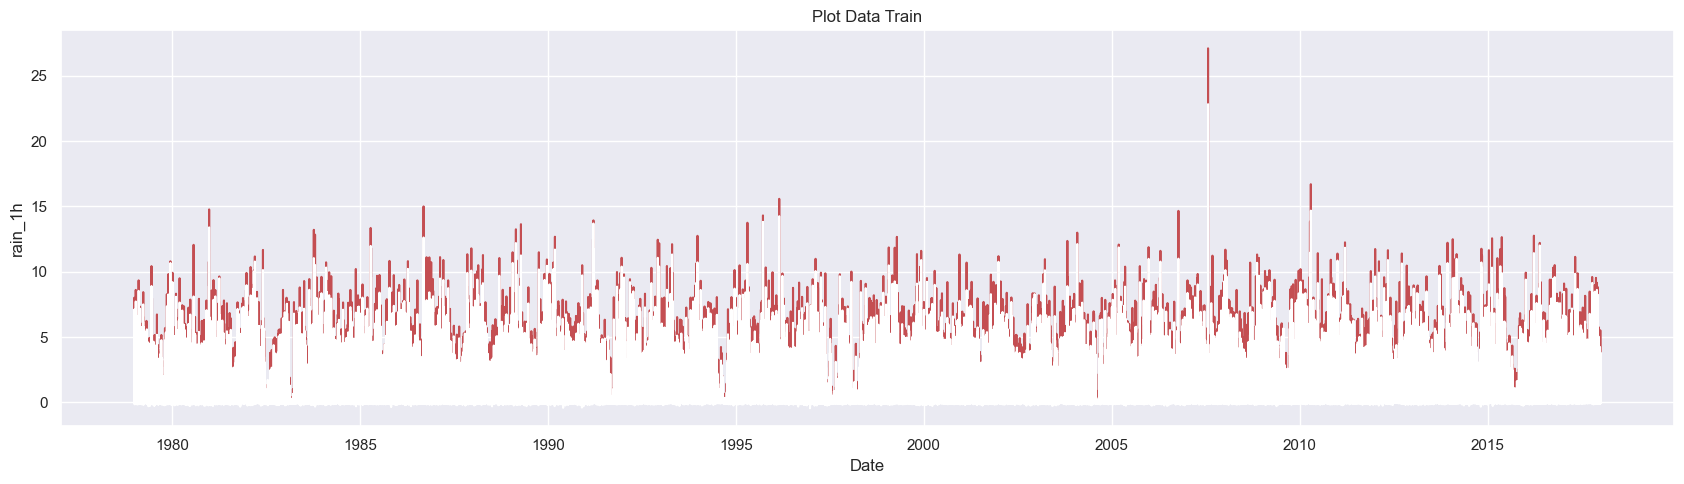

In [200]:
plt.figure(figsize=(17, 5))

# plt.plot(df_train.index, df_train['rain_1h'], 'b')
# plt.plot(df_val.index, df_val['rain_1h'], 'r')
plt.plot(data.index, data['rain_1h'], 'r')
plt.plot(data.index, pred, 'w')
plt.xlabel('Date')
plt.ylabel('rain_1h')
plt.title('Plot Data Train')

# Tampilkan plot
plt.tight_layout()
# plt.savefig('Plot Data Train vs Data Validasi.png')
plt.show()

# -------------------------------------------------------------------------------------------------------------

In [27]:
df1 = pd.read_csv('test.csv')
pd.set_option("display.max_columns", None)
df1

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_3h,snow_1h,snow_3h,clouds
0,1514764800,2018-01-01 00:00:00+00:00,28800,26.59 °C,NaN,23.66,26.59,26.02,27.16,1009,NaN,undetermined,84,1.45 m/s,355,0,NaN,no_snow,97
1,1514768400,2018-01-01 01:00:00+00:00,28800,26.51 C,NaN,24.92,26.51 °C,26.06,28.04,1009,NaN,undetermined,91,1.67 m/s,351,0mm,no-snow,0 milimeter,95
2,1514772000,2018-01-01 02:00:00+00:00,28800,28.68 C,NaN,25.71,34.68,28.03 C,29.3 C,1009.0 hPa.,NaN,NaN,84,1.72 m/s,345.0°,0 mm,volume:zero,0,90
3,1514775600,2018-01-01 03:00:00+00:00,28800,28.84 C,NaN,25.25,34.51,28.52,29.08 °C,1008,NaN,NaN,81,1.49,339.0°,0 milimeter,0,NaN,91
4,1514779200,2018-01-01 04:00:00+00:00,28800,29.75 Celcius,,24.62,35.38,29.31 C,30.57,1007,undetermined,undetermined,74,1.39 m/s,339.0°,NaN,0,volume:0,96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49363,1692471600,2023-08-19 19:00:00+00:00,28800,24.37 C,NaN,23.34,25.32,22.7°C,28.2 °C,1011.0 hPa,NaN,not-recorded,94,1.57,239.0°,NaN,no_snow,0,84
49364,1692475200,2023-08-19 20:00:00+00:00,28800,23.87 C,NaN,23.02,24.79 C,21.91,28.01 °C,1011,undetermined,undetermined,95,1.53,235.0°,0,NaN,0,70
49365,1692478800,2023-08-19 21:00:00+00:00,28800,23.87 Celcius,NaN,23.02,24.79,21.91,28.01,1011,NaN,unknown,95.00%,1.53 m/s,235,NaN,NaN,NaN,70
49366,1692482400,2023-08-19 22:00:00+00:00,28800,23.87°C,undefined,23.02,24.79,21.91,28.01 °C,1011.0hPa,undetermined,NaN,95.00%,1.53,235,NaN,0,NaN,70.00%


In [28]:
df1[['d_point','temp','feels','min_temp','max_temp','wind_deg']] = df1[['d_point','temp','feels','min_temp','max_temp','wind_deg']].astype(str)

df1[['d_point','temp','feels','min_temp','max_temp','wind_deg']] = df1[['d_point','temp','feels','min_temp','max_temp','wind_deg']].applymap(lambda x: x.strip('°Celcius'))
df1[['d_point','temp','feels','min_temp','max_temp','wind_deg']] = df1[['d_point','temp','feels','min_temp','max_temp','wind_deg']].applymap(lambda x: float(x.replace(' ', '')))

df1[['hum','clouds']] = df1[['hum','clouds']].applymap(lambda x: float(x.strip('%')))

df1[['prssr']] = df1[['prssr']].applymap(lambda x: x.strip('hPa.'))
df1[['prssr']] = df1[['prssr']].applymap(lambda x: float(x.replace(' ', '')))

df1[['wind_spd']] = df1[['wind_spd']].applymap(lambda x: x.strip('m/s'))
df1[['wind_spd']] = df1[['wind_spd']].applymap(lambda x: float(x.replace(' ', '')))

df1

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_3h,snow_1h,snow_3h,clouds
0,1514764800,2018-01-01 00:00:00+00:00,28800,26.59,NaN,23.66,26.59,26.02,27.16,1009.0,NaN,undetermined,84.0,1.45,355.0,0,NaN,no_snow,97.0
1,1514768400,2018-01-01 01:00:00+00:00,28800,26.51,NaN,24.92,26.51,26.06,28.04,1009.0,NaN,undetermined,91.0,1.67,351.0,0mm,no-snow,0 milimeter,95.0
2,1514772000,2018-01-01 02:00:00+00:00,28800,28.68,NaN,25.71,34.68,28.03,29.30,1009.0,NaN,NaN,84.0,1.72,345.0,0 mm,volume:zero,0,90.0
3,1514775600,2018-01-01 03:00:00+00:00,28800,28.84,NaN,25.25,34.51,28.52,29.08,1008.0,NaN,NaN,81.0,1.49,339.0,0 milimeter,0,NaN,91.0
4,1514779200,2018-01-01 04:00:00+00:00,28800,29.75,,24.62,35.38,29.31,30.57,1007.0,undetermined,undetermined,74.0,1.39,339.0,NaN,0,volume:0,96.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49363,1692471600,2023-08-19 19:00:00+00:00,28800,24.37,NaN,23.34,25.32,22.70,28.20,1011.0,NaN,not-recorded,94.0,1.57,239.0,NaN,no_snow,0,84.0
49364,1692475200,2023-08-19 20:00:00+00:00,28800,23.87,NaN,23.02,24.79,21.91,28.01,1011.0,undetermined,undetermined,95.0,1.53,235.0,0,NaN,0,70.0
49365,1692478800,2023-08-19 21:00:00+00:00,28800,23.87,NaN,23.02,24.79,21.91,28.01,1011.0,NaN,unknown,95.0,1.53,235.0,NaN,NaN,NaN,70.0
49366,1692482400,2023-08-19 22:00:00+00:00,28800,23.87,undefined,23.02,24.79,21.91,28.01,1011.0,undetermined,NaN,95.0,1.53,235.0,NaN,0,NaN,70.0


In [29]:
df1['datetime_iso'] = pd.to_datetime(df1['datetime_iso'])
df1['hour'] = df1.datetime_iso.dt.hour
df1['day'] = df1.datetime_iso.dt.day
df1['weeks'] = df1.datetime_iso.dt.isocalendar().week.astype(int)
# df1['month'] = df1.datetime_iso.dt.month
df1['year'] = df1.datetime_iso.dt.year
df1

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_3h,snow_1h,snow_3h,clouds,hour,day,weeks,year
0,1514764800,2018-01-01 00:00:00+00:00,28800,26.59,NaN,23.66,26.59,26.02,27.16,1009.0,NaN,undetermined,84.0,1.45,355.0,0,NaN,no_snow,97.0,0,1,1,2018
1,1514768400,2018-01-01 01:00:00+00:00,28800,26.51,NaN,24.92,26.51,26.06,28.04,1009.0,NaN,undetermined,91.0,1.67,351.0,0mm,no-snow,0 milimeter,95.0,1,1,1,2018
2,1514772000,2018-01-01 02:00:00+00:00,28800,28.68,NaN,25.71,34.68,28.03,29.30,1009.0,NaN,NaN,84.0,1.72,345.0,0 mm,volume:zero,0,90.0,2,1,1,2018
3,1514775600,2018-01-01 03:00:00+00:00,28800,28.84,NaN,25.25,34.51,28.52,29.08,1008.0,NaN,NaN,81.0,1.49,339.0,0 milimeter,0,NaN,91.0,3,1,1,2018
4,1514779200,2018-01-01 04:00:00+00:00,28800,29.75,,24.62,35.38,29.31,30.57,1007.0,undetermined,undetermined,74.0,1.39,339.0,NaN,0,volume:0,96.0,4,1,1,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49363,1692471600,2023-08-19 19:00:00+00:00,28800,24.37,NaN,23.34,25.32,22.70,28.20,1011.0,NaN,not-recorded,94.0,1.57,239.0,NaN,no_snow,0,84.0,19,19,33,2023
49364,1692475200,2023-08-19 20:00:00+00:00,28800,23.87,NaN,23.02,24.79,21.91,28.01,1011.0,undetermined,undetermined,95.0,1.53,235.0,0,NaN,0,70.0,20,19,33,2023
49365,1692478800,2023-08-19 21:00:00+00:00,28800,23.87,NaN,23.02,24.79,21.91,28.01,1011.0,NaN,unknown,95.0,1.53,235.0,NaN,NaN,NaN,70.0,21,19,33,2023
49366,1692482400,2023-08-19 22:00:00+00:00,28800,23.87,undefined,23.02,24.79,21.91,28.01,1011.0,undetermined,NaN,95.0,1.53,235.0,NaN,0,NaN,70.0,22,19,33,2023


In [30]:
df1['min_temp']=np.where(df1['min_temp']<0,22,df1['min_temp'])
df1['max_temp']=np.where(df1['max_temp']<0,24,df1['max_temp'])
df1['feels']=np.where(df1['feels']<0,26,df1['feels'])
df1['prssr'] = np.where(df1['prssr'] < 0, 1006, df1['prssr'])

df1['temp'] = np.where(df1['temp'] < 0, df1['d_point']+ (100-df1['hum'])/5, df1['temp'])

e1 = 6.112 * np.exp((17.67 * df1['d_point']) / (df1['d_point'] + 243.5))
es1 = 6.112 * np.exp((17.67 * df1['temp']) / (df1['temp'] + 243.5))
df1['true_hum'] = round((e1/es1)*100)
df1['true_hum'] = np.where(df1['true_hum']>100,100,df1['true_hum'])




df1['wind_spd'] = np.where(df1['wind_spd'] >1000 , 5, df1['wind_spd'])
north1 = df1['wind_spd'] *np.sin(df1['wind_deg'])
east1 = df1['wind_spd'] *np.cos(df1['wind_deg'])


# Menghitung Kecepatan Angin Sebenarnya (True Wind Speed) dalam m/s
df1['true_spd'] = round(np.sqrt(north1**2 + east1**2),3)
df1

,datetime,datetime_iso,time-zone,temp,visibility,d_point,feels,min_temp,max_temp,prssr,sea_level,grnd_level,hum,wind_spd,wind_deg,rain_3h,snow_1h,snow_3h,clouds,hour,day,weeks,year,true_hum,true_spd
0,1514764800,2018-01-01 00:00:00+00:00,28800,26.59,NaN,23.66,26.59,26.02,27.16,1009.0,NaN,undetermined,84.0,1.45,355.0,0,NaN,no_snow,97.0,0,1,1,2018,84.0,1.45
1,1514768400,2018-01-01 01:00:00+00:00,28800,26.51,NaN,24.92,26.51,26.06,28.04,1009.0,NaN,undetermined,91.0,1.67,351.0,0mm,no-snow,0 milimeter,95.0,1,1,1,2018,91.0,1.67
2,1514772000,2018-01-01 02:00:00+00:00,28800,28.68,NaN,25.71,34.68,28.03,29.30,1009.0,NaN,NaN,84.0,1.72,345.0,0 mm,volume:zero,0,90.0,2,1,1,2018,84.0,1.72
3,1514775600,2018-01-01 03:00:00+00:00,28800,28.84,NaN,25.25,34.51,28.52,29.08,1008.0,NaN,NaN,81.0,1.49,339.0,0 milimeter,0,NaN,91.0,3,1,1,2018,81.0,1.49
4,1514779200,2018-01-01 04:00:00+00:00,28800,29.75,,24.62,35.38,29.31,30.57,1007.0,undetermined,undetermined,74.0,1.39,339.0,NaN,0,volume:0,96.0,4,1,1,2018,74.0,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49363,1692471600,2023-08-19 19:00:00+00:00,28800,24.37,NaN,23.34,25.32,22.70,28.20,1011.0,NaN,not-recorded,94.0,1.57,239.0,NaN,no_snow,0,84.0,19,19,33,2023,94.0,1.57
49364,1692475200,2023-08-19 20:00:00+00:00,28800,23.87,NaN,23.02,24.79,21.91,28.01,1011.0,undetermined,undetermined,95.0,1.53,235.0,0,NaN,0,70.0,20,19,33,2023,95.0,1.53
49365,1692478800,2023-08-19 21:00:00+00:00,28800,23.87,NaN,23.02,24.79,21.91,28.01,1011.0,NaN,unknown,95.0,1.53,235.0,NaN,NaN,NaN,70.0,21,19,33,2023,95.0,1.53
49366,1692482400,2023-08-19 22:00:00+00:00,28800,23.87,undefined,23.02,24.79,21.91,28.01,1011.0,undetermined,NaN,95.0,1.53,235.0,NaN,0,NaN,70.0,22,19,33,2023,95.0,1.53


In [31]:
df1.set_index('datetime_iso', inplace = True)
df1 = df1.drop(['visibility','sea_level','grnd_level', 'rain_3h', 'snow_1h','snow_3h', 'time-zone', 'datetime',
                'hum','wind_spd'],axis = 1)
df1

,temp,d_point,feels,min_temp,max_temp,prssr,wind_deg,clouds,hour,day,weeks,year,true_hum,true_spd
datetime_iso,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,26.59,23.66,26.59,26.02,27.16,1009.0,355.0,97.0,0,1,1,2018,84.0,1.45
2018-01-01 01:00:00+00:00,26.51,24.92,26.51,26.06,28.04,1009.0,351.0,95.0,1,1,1,2018,91.0,1.67
2018-01-01 02:00:00+00:00,28.68,25.71,34.68,28.03,29.30,1009.0,345.0,90.0,2,1,1,2018,84.0,1.72
2018-01-01 03:00:00+00:00,28.84,25.25,34.51,28.52,29.08,1008.0,339.0,91.0,3,1,1,2018,81.0,1.49
2018-01-01 04:00:00+00:00,29.75,24.62,35.38,29.31,30.57,1007.0,339.0,96.0,4,1,1,2018,74.0,1.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-19 19:00:00+00:00,24.37,23.34,25.32,22.70,28.20,1011.0,239.0,84.0,19,19,33,2023,94.0,1.57
2023-08-19 20:00:00+00:00,23.87,23.02,24.79,21.91,28.01,1011.0,235.0,70.0,20,19,33,2023,95.0,1.53
2023-08-19 21:00:00+00:00,23.87,23.02,24.79,21.91,28.01,1011.0,235.0,70.0,21,19,33,2023,95.0,1.53


In [32]:
independent_columns = ['temp','d_point','min_temp','max_temp','feels', 'true_hum', 'true_spd', 'wind_deg', 'clouds','prssr']


# Jumlah lags yang ingin dihitung
n_lags = 5  # Anda dapat mengubah jumlah lags sesuai kebutuhan

# Menambahkan kolom-kolom lags hanya untuk kolom independen
for column in independent_columns:
    for lag in range(1, n_lags + 1):
        lagged_column_name = f'{column}_lag{lag}'
        df1[lagged_column_name] = df1[column].shift(lag)
        df1[lagged_column_name].fillna(df1[column], inplace = True)
        
for column in independent_columns:
    for lag in range(1, n_lags + 1):
        lagged_column_name = f'{column}_lag{-lag}'
        df1[lagged_column_name] = df1[column].shift(-lag)
        df1[lagged_column_name].fillna(df1[column], inplace = True)
df1

,temp,d_point,feels,min_temp,max_temp,prssr,wind_deg,clouds,hour,day,weeks,year,true_hum,true_spd,temp_lag1,temp_lag2,temp_lag3,temp_lag4,temp_lag5,d_point_lag1,d_point_lag2,d_point_lag3,d_point_lag4,d_point_lag5,min_temp_lag1,min_temp_lag2,min_temp_lag3,min_temp_lag4,min_temp_lag5,max_temp_lag1,max_temp_lag2,max_temp_lag3,max_temp_lag4,max_temp_lag5,feels_lag1,feels_lag2,feels_lag3,feels_lag4,feels_lag5,true_hum_lag1,true_hum_lag2,true_hum_lag3,true_hum_lag4,true_hum_lag5,true_spd_lag1,true_spd_lag2,true_spd_lag3,true_spd_lag4,true_spd_lag5,wind_deg_lag1,wind_deg_lag2,wind_deg_lag3,wind_deg_lag4,wind_deg_lag5,clouds_lag1,clouds_lag2,clouds_lag3,clouds_lag4,clouds_lag5,prssr_lag1,prssr_lag2,prssr_lag3,prssr_lag4,prssr_lag5,temp_lag-1,temp_lag-2,temp_lag-3,temp_lag-4,temp_lag-5,d_point_lag-1,d_point_lag-2,d_point_lag-3,d_point_lag-4,d_point_lag-5,min_temp_lag-1,min_temp_lag-2,min_temp_lag-3,min_temp_lag-4,min_temp_lag-5,max_temp_lag-1,max_temp_lag-2,max_temp_lag-3,max_temp_lag-4,max_temp_lag-5,feels_lag-1,feels_lag-2,feels_lag-3,feels_lag-4,feels_lag-5,true_hum_lag-1,true_hum_lag-2,true_hum_lag-3,true_hum_lag-4,true_hum_lag-5,true_spd_lag-1,true_spd_lag-2,true_spd_lag-3,true_spd_lag-4,true_spd_lag-5,wind_deg_lag-1,wind_deg_lag-2,wind_deg_lag-3,wind_deg_lag-4,wind_deg_lag-5,clouds_lag-1,clouds_lag-2,clouds_lag-3,clouds_lag-4,clouds_lag-5,prssr_lag-1,prssr_lag-2,prssr_lag-3,prssr_lag-4,prssr_lag-5
datetime_iso,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,26.59,23.66,26.59,26.02,27.16,1009.0,355.0,97.0,0,1,1,2018,84.0,1.45,26.59,26.59,26.59,26.59,26.59,23.66,23.66,23.66,23.66,23.66,26.02,26.02,26.02,26.02,26.02,27.16,27.16,27.16,27.16,27.16,26.59,26.59,26.59,26.59,26.59,84.0,84.0,84.0,84.0,84.0,1.45,1.45,1.45,1.45,1.45,355.0,355.0,355.0,355.0,355.0,97.0,97.0,97.0,97.0,97.0,1009.0,1009.0,1009.0,1009.0,1009.0,26.51,28.68,28.84,29.75,30.09,24.92,25.71,25.25,24.62,26.88,26.06,28.03,28.52,29.31,28.02,28.04,29.30,29.08,30.57,30.82,26.51,34.68,34.51,35.38,37.09,91.0,84.0,81.0,74.0,83.0,1.67,1.72,1.49,1.39,0.52,351.0,345.0,339.0,339.0,330.0,95.0,90.0,91.0,96.0,69.0,1009.0,1009.0,1008.0,1007.0,1006.0
2018-01-01 01:00:00+00:00,26.51,24.92,26.51,26.06,28.04,1009.0,351.0,95.0,1,1,1,2018,91.0,1.67,26.59,26.51,26.51,26.51,26.51,23.66,24.92,24.92,24.92,24.92,26.02,26.06,26.06,26.06,26.06,27.16,28.04,28.04,28.04,28.04,26.59,26.51,26.51,26.51,26.51,84.0,91.0,91.0,91.0,91.0,1.45,1.67,1.67,1.67,1.67,355.0,351.0,351.0,351.0,351.0,97.0,95.0,95.0,95.0,95.0,1009.0,1009.0,1009.0,1009.0,1009.0,28.68,28.84,29.75,30.09,30.38,25.71,25.25,24.62,26.88,26.75,28.03,28.52,29.31,28.02,29.02,29.30,29.08,30.57,30.82,31.34,34.68,34.51,35.38,37.09,37.38,84.0,81.0,74.0,83.0,81.0,1.72,1.49,1.39,0.52,1.16,345.0,339.0,339.0,330.0,304.0,90.0,91.0,96.0,69.0,96.0,1009.0,1008.0,1007.0,1006.0,1006.0
2018-01-01 02:00:00+00:00,28.68,25.71,34.68,28.03,29.30,1009.0,345.0,90.0,2,1,1,2018,84.0,1.72,26.51,26.59,28.68,28.68,28.68,24.92,23.66,25.71,25.71,25.71,26.06,26.02,28.03,28.03,28.03,28.04,27.16,29.30,29.30,29.30,26.51,26.59,34.68,34.68,34.68,91.0,84.0,84.0,84.0,84.0,1.67,1.45,1.72,1.72,1.72,351.0,355.0,345.0,345.0,345.0,95.0,97.0,90.0,90.0,90.0,1009.0,1009.0,1009.0,1009.0,1009.0,28.84,29.75,30.09,30.38,30.55,25.25,24.62,26.88,26.75,25.83,28.52,29.31,28.02,29.02,26.02,29.08,30.57,30.82,31.34,31.66,34.51,35.38,37.09,37.38,37.55,81.0,74.0,83.0,81.0,76.0,1.49,1.39,0.52,1.16,1.17,339.0,339.0,330.0,304.0,318.0,91.0,96.0,69.0,96.0,99.0,1008.0,1007.0,1006.0,1006.0,1005.0
2018-01-01 03:00:00+00:00,28.84,25.25,34.51,28.52,29.08,1008.0,339.0,91.0,3,1,1,2018,81.0,1.49,28.68,26.51,26.59,28.84,28.84,25.71,24.92,23.66,25.25,25.25,28.03,26.06,26.02,28.52,28.52,29.30,28.04,27.16,29.08,29.08,34.68,26.51,26.59,34.51,34.51,84.0,91.0,84.0,81.0,81.0,1.72,1.67,1.45,1.49,1.49,345.0,351.0,355.0,339.0,339.0,90.0,95.0,97.0,91.0,91.0,1009.0,1009.0,1009.0,1008.0,1008.0,29.75,30.09,30.38,30.55,29.66,24.62,26.88,26.

In [33]:
yhat = modelXG.predict(df1)
yhat

array([0.56080353, 0.5782737 , 0.91995436, ..., 0.22904941, 0.5115679 ,
       0.01101024], dtype=float32)

In [34]:
submission = pd.read_csv('sample_submission.csv')
submission

,datetime_iso,rain_1h
0,2018-01-01 00:00:00+00:00,0
1,2018-01-01 01:00:00+00:00,0
2,2018-01-01 02:00:00+00:00,0
3,2018-01-01 03:00:00+00:00,0
4,2018-01-01 04:00:00+00:00,0
...,...,...
49363,2023-08-19 19:00:00+00:00,0
49364,2023-08-19 20:00:00+00:00,0
49365,2023-08-19 21:00:00+00:00,0
49366,2023-08-19 22:00:00+00:00,0


In [35]:
submission['rain_1h'] = (yhat)
submission

,datetime_iso,rain_1h
0,2018-01-01 00:00:00+00:00,0.560804
1,2018-01-01 01:00:00+00:00,0.578274
2,2018-01-01 02:00:00+00:00,0.919954
3,2018-01-01 03:00:00+00:00,0.328024
4,2018-01-01 04:00:00+00:00,0.612670
...,...,...
49363,2023-08-19 19:00:00+00:00,0.188020
49364,2023-08-19 20:00:00+00:00,0.152193
49365,2023-08-19 21:00:00+00:00,0.229049
49366,2023-08-19 22:00:00+00:00,0.511568


In [36]:
len(submission[submission['rain_1h'] < 0])

5935

In [38]:
submission2 = pd.read_csv('submission56.csv')
submission2

,datetime_iso,rain_1h
0,2018-01-01 00:00:00+00:00,0.497469
1,2018-01-01 01:00:00+00:00,0.545034
2,2018-01-01 02:00:00+00:00,0.692793
3,2018-01-01 03:00:00+00:00,0.141969
4,2018-01-01 04:00:00+00:00,0.688256
...,...,...
49363,2023-08-19 19:00:00+00:00,0.081814
49364,2023-08-19 20:00:00+00:00,0.290945
49365,2023-08-19 21:00:00+00:00,0.182828
49366,2023-08-19 22:00:00+00:00,0.268850


In [39]:
submission2['rain_1h'].corr(submission['rain_1h'])

0.969258684784074

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


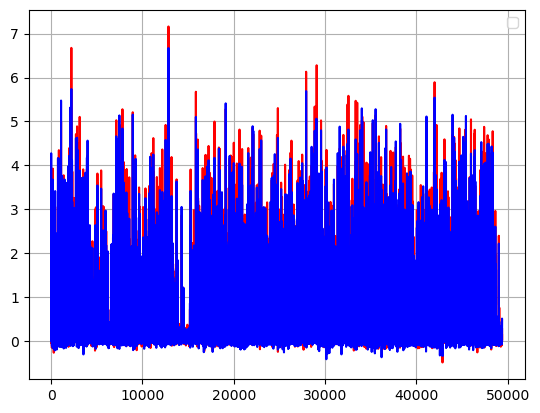

In [41]:
plt.plot(submission2.index, submission2['rain_1h'], color = 'r')
plt.plot(submission.index, submission['rain_1h'], color = 'b')
plt.legend()
plt.grid()
plt.show()

In [42]:
submission.to_csv('submission61.csv', index = False)